# Final Project CS3300
Will Gaty, \[Groupmate 1\], \[Groupmate 2\] | 2/22/2023 | CS3300

Video Presentation: \[Link Removed\]

# Research Question
Strokes are a leading cause of death around the world. There are several health factors that can cause strokes or increase the likelihood that an individual will have a stroke. In this notebook we will try to see what health factors and other personal individual factors play a role in determining if someone will have a stroke or not.

# Hypothesis
BMI and Hypertension are predictive in determining if a person will suffer a stroke.

# Dataset
The Stroke Prediction Dataset is a from a confidential source and is supposed to be used only for educational purposes. It is from a reliable author on Kaggle with other datasets which contain cited sources. This specific dataset has 5,510 observations of patients and various health attribute and personal lifestyle information regarding them. These include gender, age, hypertension (abnormally high blood pressure), if the patient has any heart diseases, if they were ever married, what type of work they do, their residence type, their average glucose level (sugar level in the blood), their BMI (body max index), smoking status, and if the patient had a stroke.

# Data Preprocessing
This section will involve loading in the dataset, understanding what information the datset contains and then it will be cleaned.

Imports:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC as SVMClassifier
from sklearn.ensemble import RandomForestClassifier as RFClassifier
from sklearn.neighbors import KNeighborsClassifier as KNClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import log_loss
from sklearn.metrics import roc_curve
from sklearn.metrics import fbeta_score as f2
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

Setting a seed to get consistent results for later analysis.

In [2]:
np.random.seed(0)

Reading in the dataset into a Pandas dataframe.

In [3]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

Previewing the data.

In [4]:
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


We can see from the datset that all columns except for bmi contain the proper amount of non-null values, meaning the bmi column contains some null values. Another thing to note is that id column does not contain useful information for analysis, so this could probably be dropped. Lastly, the gender, ever_married, work_type, residence_type, and smoking_status are all of object Dtype. These could be converted to catgories.

Now we will start to clean the dataset. First we will drop rows with missing values.

In [6]:
df = df.dropna()

Resetting the index after dropping rows.

In [7]:
df = df.reset_index()

Converting the columns of 0 or 1, or "Yes" and "No" to True or False.

In [8]:
df['hypertension'] = df['hypertension'] == 1
df['heart_disease'] = df['heart_disease'] == 1
df['ever_married'] = df['ever_married'] == "Yes"
df['stroke'] = df['stroke'] == 1

Converting columns of object dtype to categorical.

In [9]:
for col in ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']:
    df[col] = df[col].astype('category')

Let's check to see if the dataset is balanced.

In [10]:
df['stroke'].value_counts()

False    4700
True      209
Name: stroke, dtype: int64

Here we can see that the dataset is imbalanced and favors patients who did not have a stroke. We will try and balance this later in the notebook when predictive models are made.

Now we will preview the cleaned dataset.

In [11]:
df.head()

,index,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,9046,Male,67.0,False,True,True,Private,Urban,228.69,36.6,formerly smoked,True
1,2,31112,Male,80.0,False,True,True,Private,Rural,105.92,32.5,never smoked,True
2,3,60182,Female,49.0,False,False,True,Private,Urban,171.23,34.4,smokes,True
3,4,1665,Female,79.0,True,False,True,Self-employed,Rural,174.12,24.0,never smoked,True
4,5,56669,Male,81.0,False,False,True,Private,Urban,186.21,29.0,formerly smoked,True


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4909 entries, 0 to 4908
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   index              4909 non-null   int64   
 1   id                 4909 non-null   int64   
 2   gender             4909 non-null   category
 3   age                4909 non-null   float64 
 4   hypertension       4909 non-null   category
 5   heart_disease      4909 non-null   category
 6   ever_married       4909 non-null   category
 7   work_type          4909 non-null   category
 8   Residence_type     4909 non-null   category
 9   avg_glucose_level  4909 non-null   float64 
 10  bmi                4909 non-null   float64 
 11  smoking_status     4909 non-null   category
 12  stroke             4909 non-null   category
dtypes: category(8), float64(3), int64(2)
memory usage: 231.4 KB


# Data Analysis and Visualization
This section will involve variable characterization and EDA.

Arrays will be made of the continuous columns and categorical columns.

In [13]:
continuous_cols = ['age', 'avg_glucose_level', 'bmi']
categorical_cols = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']
all_cols = continuous_cols + categorical_cols

## Variable Characterization
Here we will look at range of values for each variable and the count for if they had a stroke or not.

First, the continous columns will be examined to see roughly what values are present.

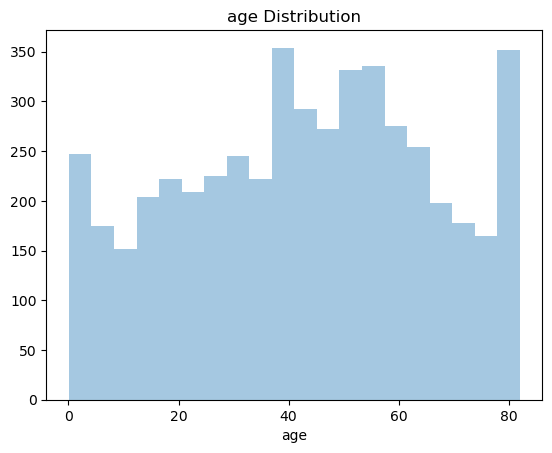

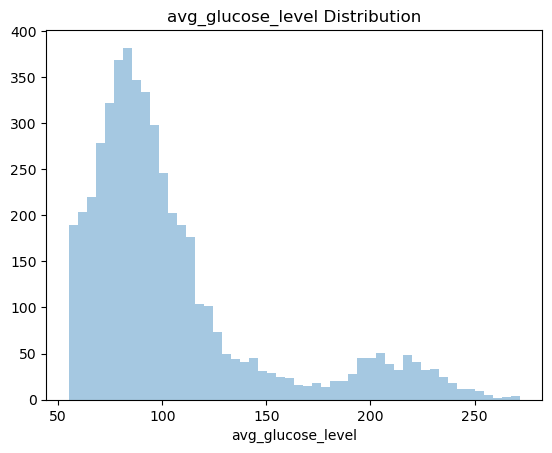

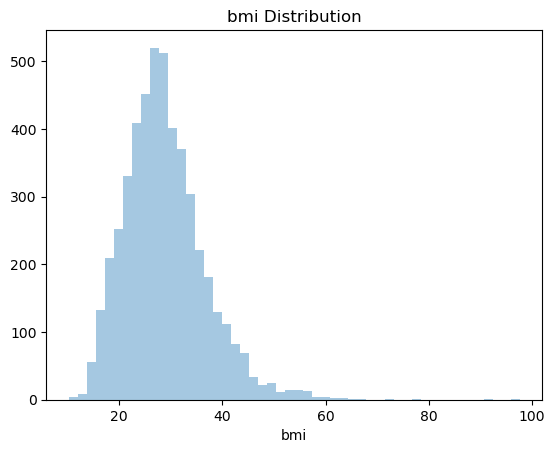

In [14]:
for col in continuous_cols:
    sns.distplot(df[col], kde=False)
    plt.xlabel(col)
    plt.title(col + ' Distribution')
    plt.show()

In [15]:
print('Mean of age column:', df['age'].mean())
print('Mean of avg_glucose_level column:', df['avg_glucose_level'].mean())
print('Mean of bmi column:', df['bmi'].mean())

Mean of age column: 42.865373803218596
Mean of avg_glucose_level column: 105.30514972499458
Mean of bmi column: 28.893236911794673


Based on the three continuous values above, age appears to be fairly well distributed between the ages. avg_glucose_level and bmi however have a right skewed distribution in the histogram. For avg_glucose_level, the mean value is approximately 105 mg/dL, with a few larger values appearing between 150 - 250+ mg/dL. For bmi, the average score is approximatly 28.9 with very few partients with a score of 50 or higher.

Let's create bins to help seperate and visualize each of these variables to see if there is a stroke or not.

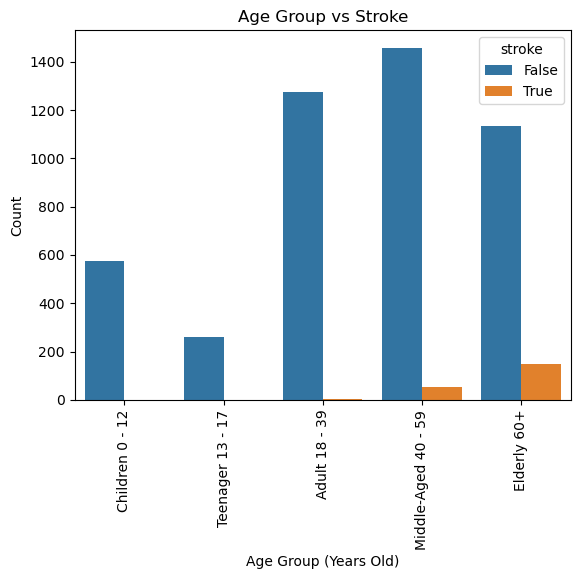

In [16]:
df_continuous = df.copy()
bins= [0, 13, 18, 40, 60, 110]
labels = ['Children 0 - 12','Teenager 13 - 17','Adult 18 - 39','Middle-Aged 40 - 59','Elderly 60+']
df_continuous['age'] = pd.cut(df_continuous['age'], bins=bins, labels=labels, right=False)

sns.countplot(data=df_continuous, x='age', hue='stroke')
plt.xlabel('Age Group (Years Old)')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Age Group vs Stroke')
plt.show()

Indiviudals who are considered in the middle-aged and elderly age range are more likely to have a stroke compared to adults and ages below.

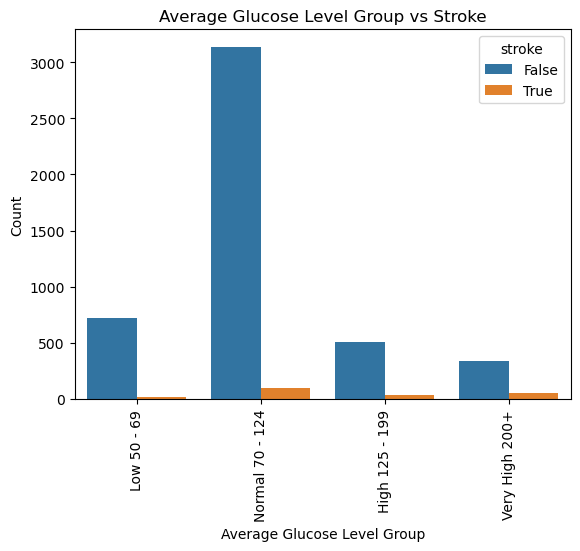

In [17]:
df_continuous = df.copy()
bins= [50, 70, 125, 200, 280]
labels = ['Low 50 - 69','Normal 70 - 124','High 125 - 199','Very High 200+']
df_continuous['avg_glucose_level'] = pd.cut(df_continuous['avg_glucose_level'], bins=bins, labels=labels, right=False)

sns.countplot(data=df_continuous, x='avg_glucose_level', hue='stroke')
plt.xlabel('Average Glucose Level Group')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Average Glucose Level Group vs Stroke')
plt.show()

Individuals who have a normal average glucose level appear to have the highest chance for a stroke and those with high and very high average glucose level are still somewhat high for having a stroke as well. Those who have a low average glucose level appear to be less likely to have a stroke.

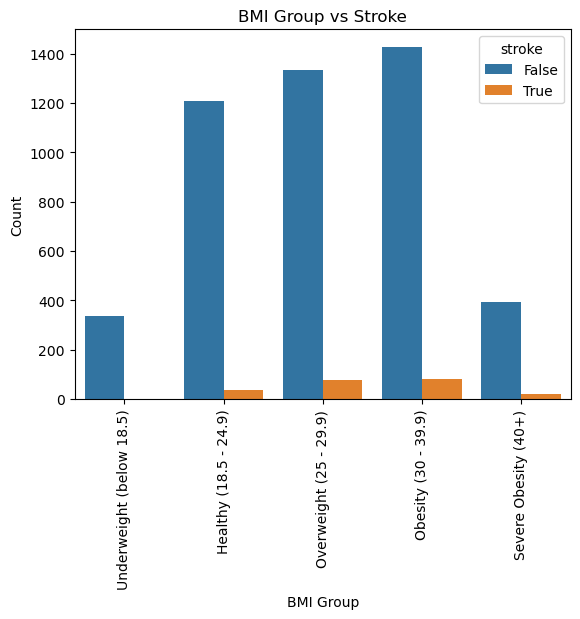

In [18]:
# https://www.nhsinform.scot/healthy-living/food-and-nutrition/healthy-eating-and-weight-loss/body-mass-index-bmi

df_continuous = df.copy()
bins= [0, 18.5, 25, 30, 40, 200]
labels = ['Underweight (below 18.5)', 'Healthy (18.5 - 24.9)','Overweight (25 - 29.9)','Obesity (30 - 39.9)', 'Severe Obesity (40+)']
df_continuous['bmi'] = pd.cut(df_continuous['bmi'], bins=bins, labels=labels, right=False)

sns.countplot(data=df_continuous, x='bmi', hue='stroke')
plt.xlabel('BMI Group')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('BMI Group vs Stroke')
plt.show()

From the graph, we can see that indiviuals who are overweight and are in the obesity/severe obesity range have more of a change to have a stroke.

We will now look at the categorical columns and get an exact count of the distribution of each category based on if the patient had a stroke or not.

Female    2897
Male      2011
Other        1
Name: gender, dtype: int64


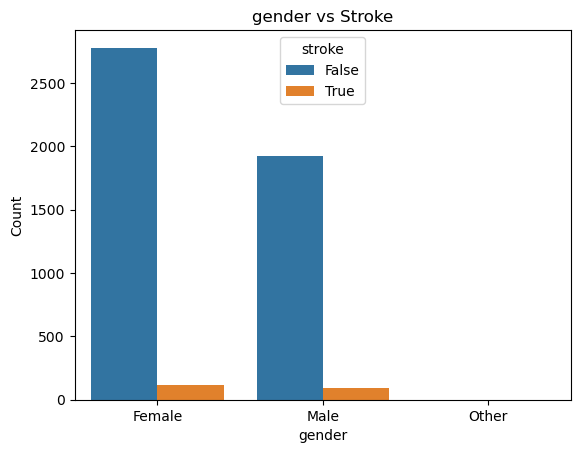

False    4458
True      451
Name: hypertension, dtype: int64


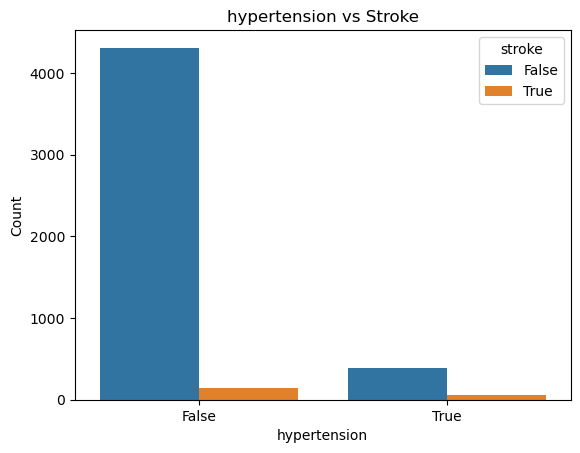

False    4666
True      243
Name: heart_disease, dtype: int64


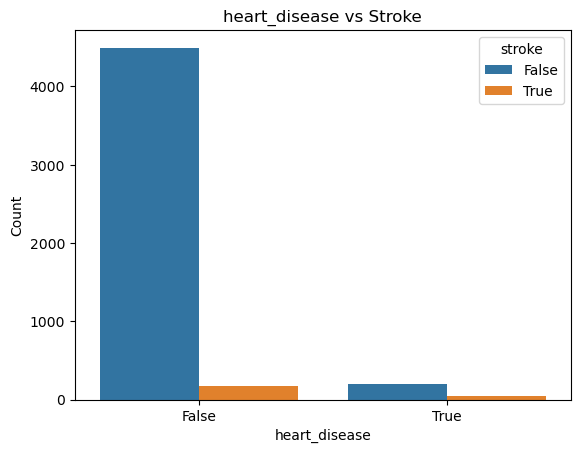

True     3204
False    1705
Name: ever_married, dtype: int64


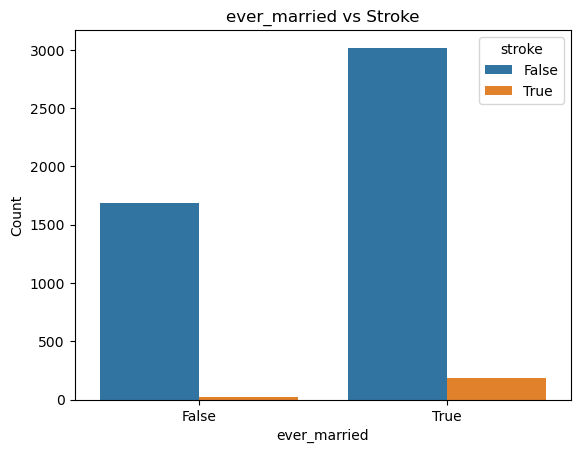

Private          2811
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: work_type, dtype: int64


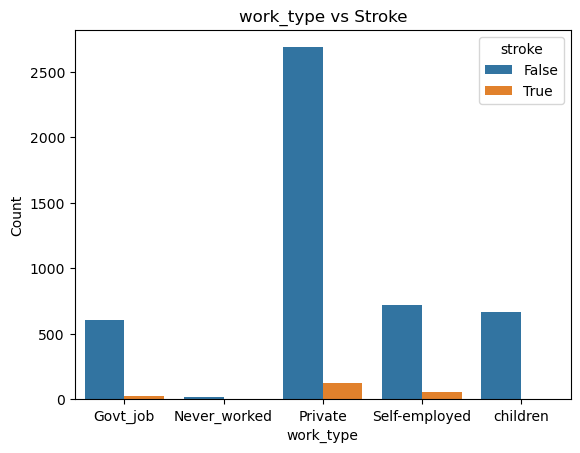

Urban    2490
Rural    2419
Name: Residence_type, dtype: int64


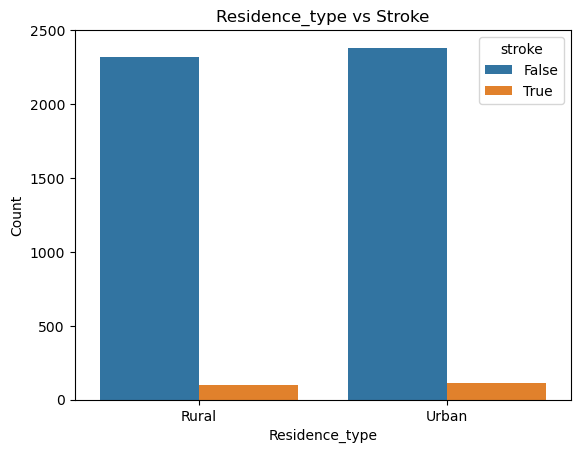

never smoked       1852
Unknown            1483
formerly smoked     837
smokes              737
Name: smoking_status, dtype: int64


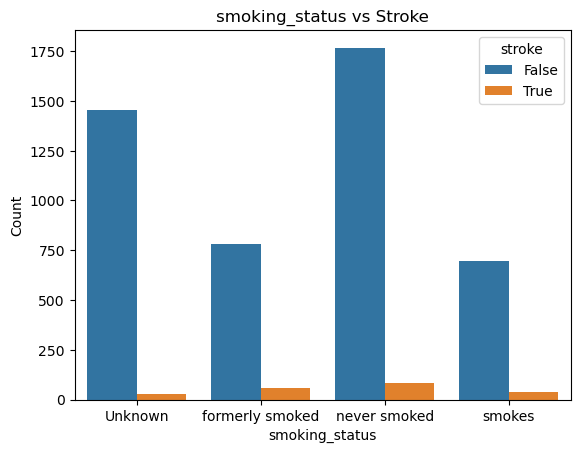

In [19]:
categorical_cols.remove('stroke')
columns = categorical_cols
for col in columns:
    sns.countplot(data=df, x=col, hue='stroke')
    print(df[col].value_counts())
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(col + ' vs Stroke')
    plt.show()

categorical_cols.append('stroke')

Let's look at a table to see desciptions for each categorical variable.

| Variable | Description |
| -------- | ----------- |
| gender | Female and male are fairly split with approximately 800 more women then men. There is 1 in the other category. Female have slightly higher count of those who did have a stroke compared to men. |
| hypertension | Around 90% of the patients do not have hypertension while 10% do. Based on ratio seen in the graph, those who do have hyptension have a higher chance of having a stroke compared to those who do not have hypertension. |
| heart_disease | Around 95% of the patients do not have heart disease and the other 5% do. Based on ratio seen in the graph, those who do have heart disease have a higher chance of having a stroke compared to those who do not have heart disease.|
| ever_married | 3204 patients have been married with 1705 patients have not been in a marriage. Those who are married have a higher change to have a stroke. This could relate to the age factor as many older people are married or have been married. |
| work_type | Most patients (2811) work for a private company with the rest either beeing self-employed, children, government job. 22 patients have never worked. No seen visual relationship between work_type and if you had a stroke. |
| residence_type | This is almost 50-50 between rural and urban. Urban has 2490 and Rural has 2419 patients. No seen visual relationship between residence_type and if you had a stroke. |
| smoking_status | This is mixed with patients who never smoke at a count of 1852, unknown smoking status with 1483 patients, formerly smoke patient cout of 837 and patients who smoke at 737. No seen visual relationship between smoking_status and if you had a stroke. |

## EDA (Statisical Tests and Visuals)
Statistical tests (Linear Regression, Kruskal-Wallis, Chi-Squared) will be conducted on the various column types. Plots (Scatter, Box Plot, Heatmap) will be constructed also for each set of features.

Continuous variables will be compared against the other continuous variables to see if there are any statistically significant relationships.

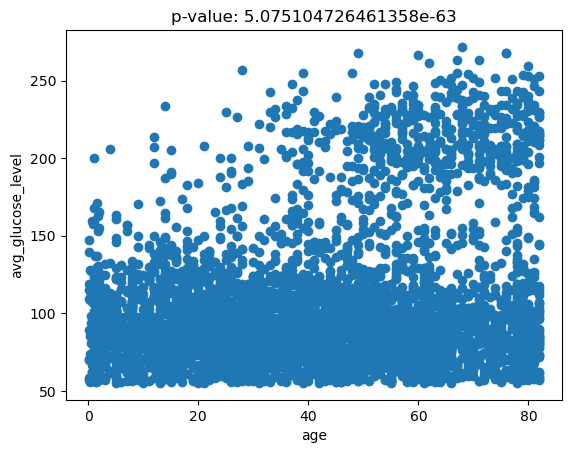

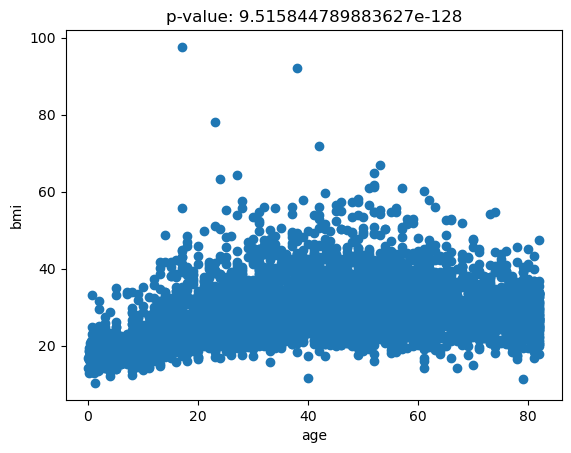

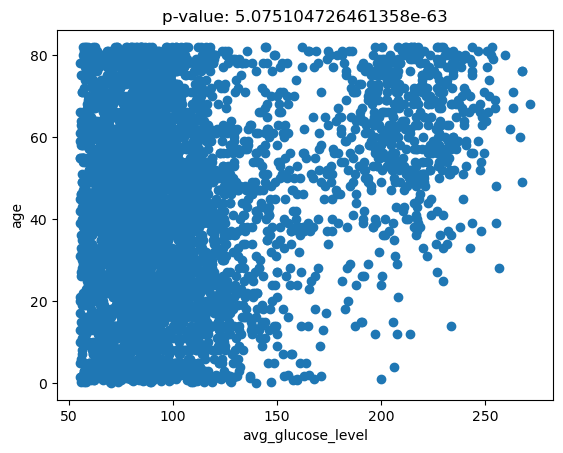

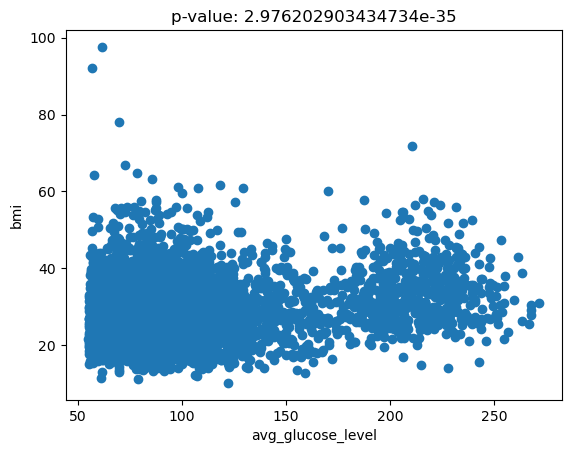

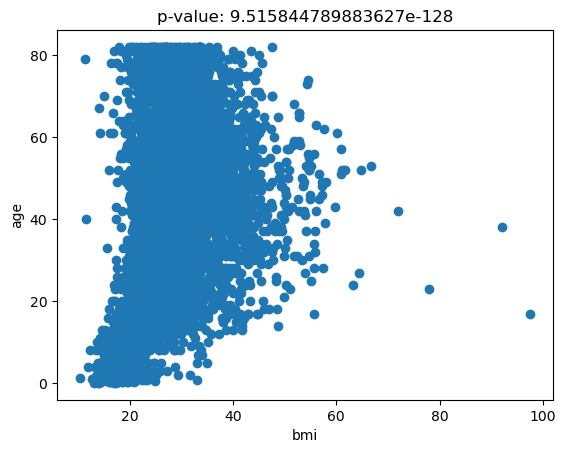

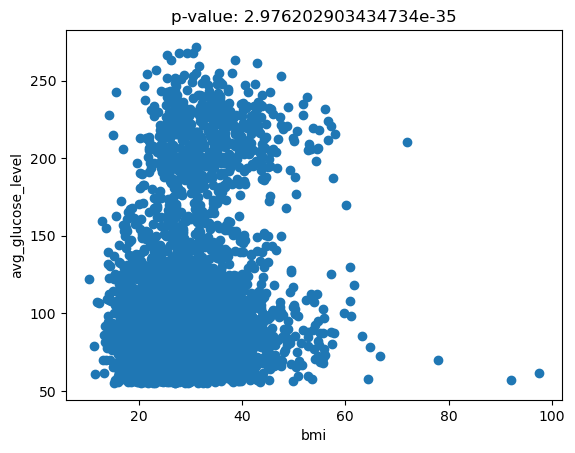

In [20]:
for col1 in continuous_cols:
    for col2 in continuous_cols:
        if not col1 == col2:
            slope, intercept, r, p, stderr = stats.linregress(df[col1], df[col2])
            plt.title('p-value: ' + str(p))
            plt.scatter(df[col1], df[col2])
            plt.xlabel(col1)
            plt.ylabel(col2)
            plt.show()

Based on the p-values and scatter plots above, it appears that all continuous variables (age, ave_glucose_level, and bmi) have a statistically siginificant relationship between each other at a threshold of alpha = 0.01.

Continuous variables will be compared against the categorical variables to see if there are any statistically significant relationships.

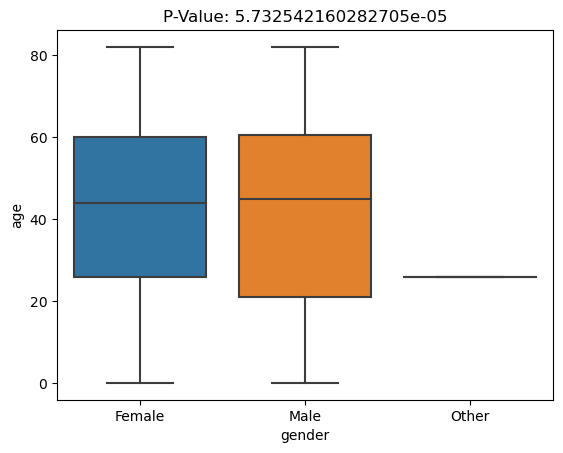

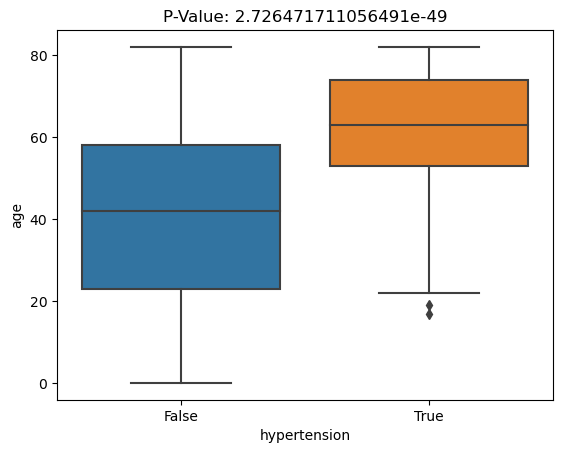

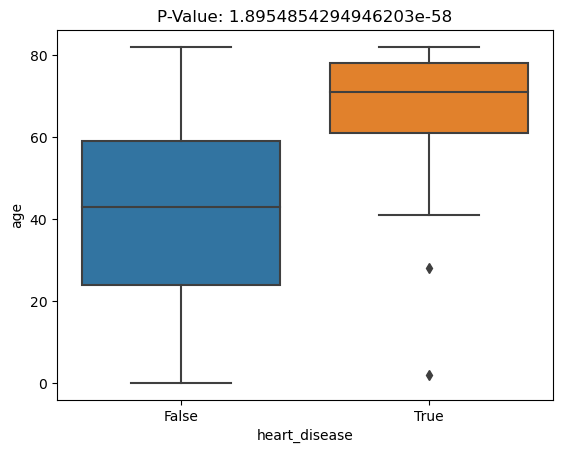

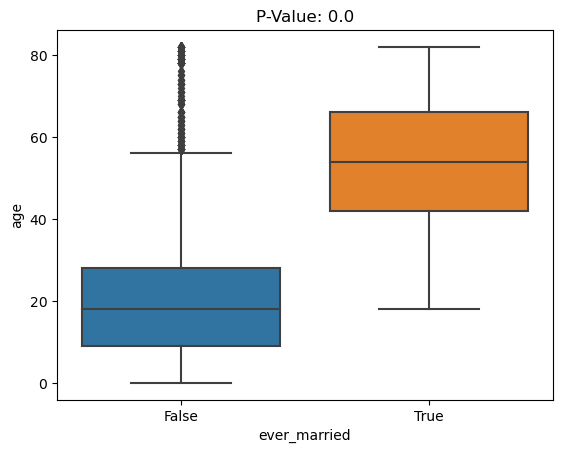

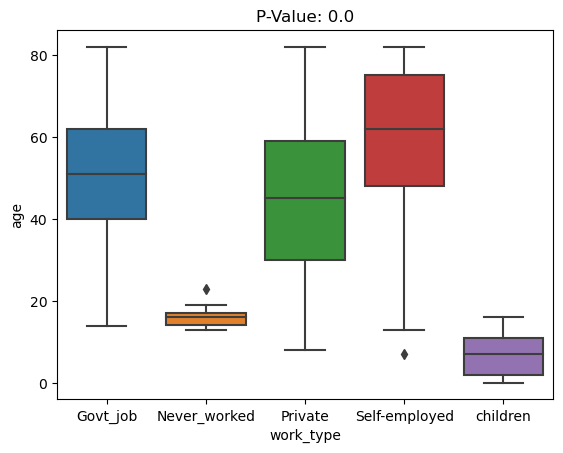

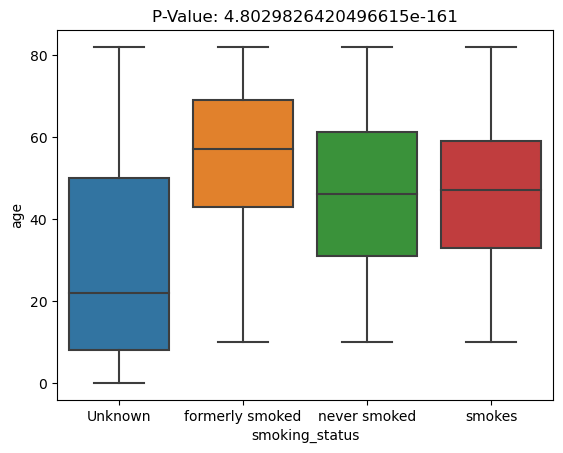

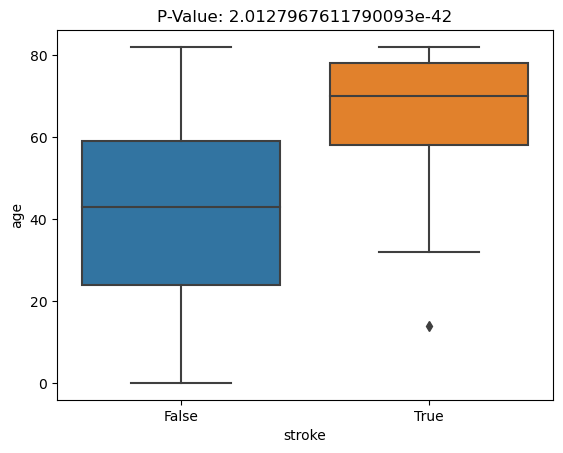

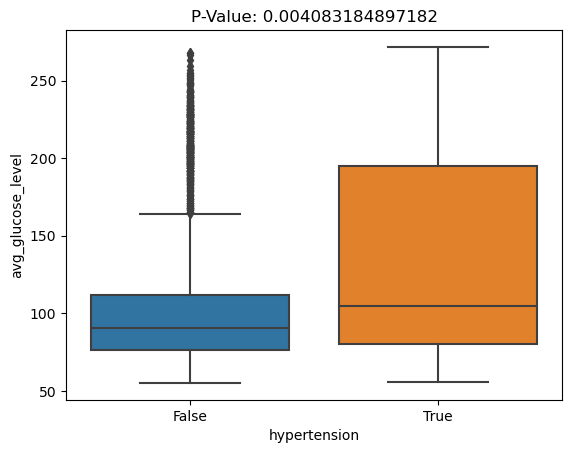

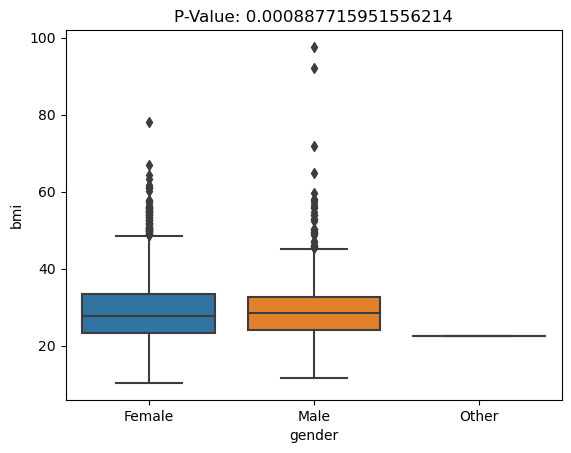

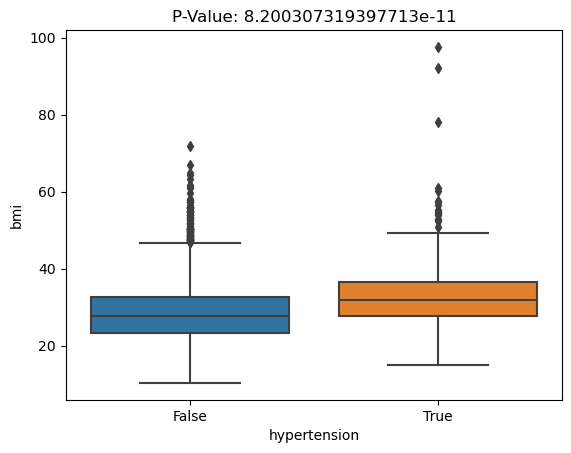

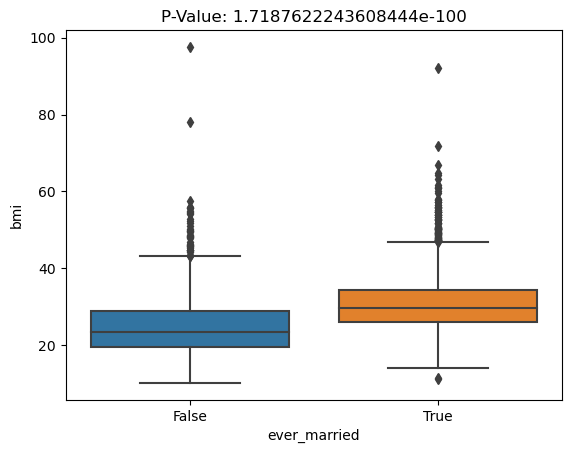

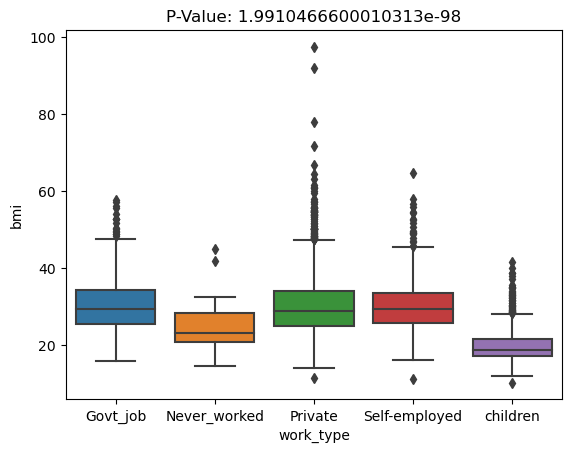

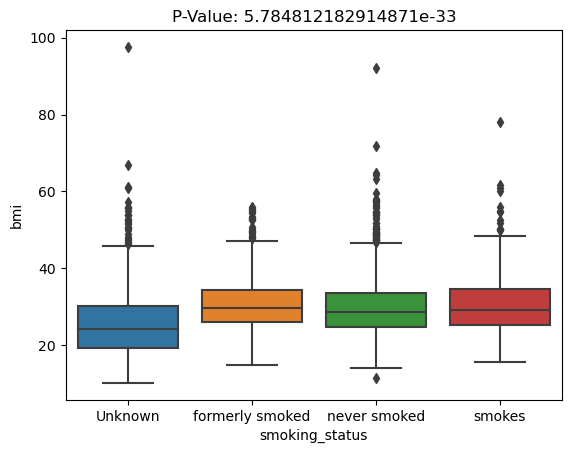

In [21]:
continuous_vs_categorical = []
for col1 in continuous_cols:
    for col2 in categorical_cols:
        if not col1 == col2:
            samples_by_group = [] 
            for value in set(df[col1]): 
                mask = df[col1] == value
                samples_by_group.append(df[col2][mask])
            stat, p = stats.kruskal(*samples_by_group)
            if p < 0.01:
                continuous_vs_categorical.append((p, col1, col2))

for entry in continuous_vs_categorical:
    p = entry[0]
    col1 = entry[1]
    col2 = entry[2]
    plt.title('P-Value: ' +  str(p))
    plt.xlabel(col2)
    plt.ylabel(col1)
    sns.boxplot(x=df[col2], y=df[col1])
    plt.show()

The variables that have a statistically siginficant relationship between each other at a threshold of alpha = 0.01 are:

| Variables with Relationship | p-value |
| --------------------------- | ------- |
| age & gender | 5.7325e-5 |
| age & hypertension | 2.7264e-49 |
| age & heart_disease | 1.8955e-58 |
| age & ever_married | 0.0 |
| age & work_type | 0.0 |
| age & smoking_status | 4.8030e-161 |
| age & stroke | 2.0128e-42 |
| avg_glucose_level & hypertension | 0.0041 |
| bmi & gender | 0.0009 |
| bmi & hypertension | 8.2003e-11 |
| bmi & ever_married | 1.7188e-100 |
| bmi & work_type | 1.9910e-98 |
| bmi & smoking_status | 5.7848e-33 |

We saw that BMI & Stroke was not plotted. Let's look at it's graph and p-value

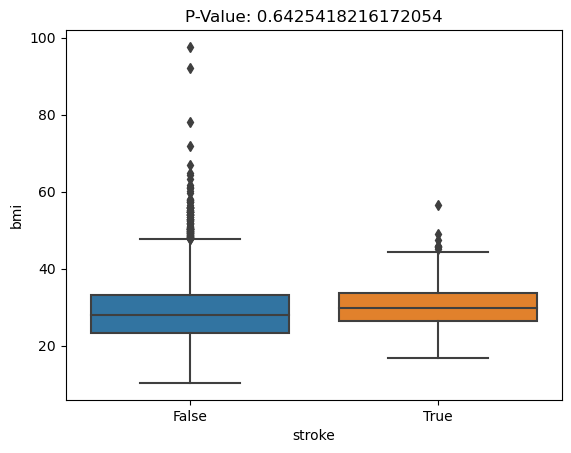

In [22]:
samples_by_group = [] 
for value in set(df["bmi"]): 
    mask = df["bmi"] == value
    samples_by_group.append(df['stroke'][mask])
stat, p = stats.kruskal(*samples_by_group)

plt.title('P-Value: ' +  str(p))
plt.xlabel('Stroke')
plt.ylabel('BMI')
sns.boxplot(x=df['stroke'], y=df['bmi'])
plt.show()

Here we can see that the p-value is 0.6425. This does not mean there is a statistically significant relationship between BMI and Stroke.

Categorical variables will be compared against the other categorical variables to see if there are any statistically significant relationships.

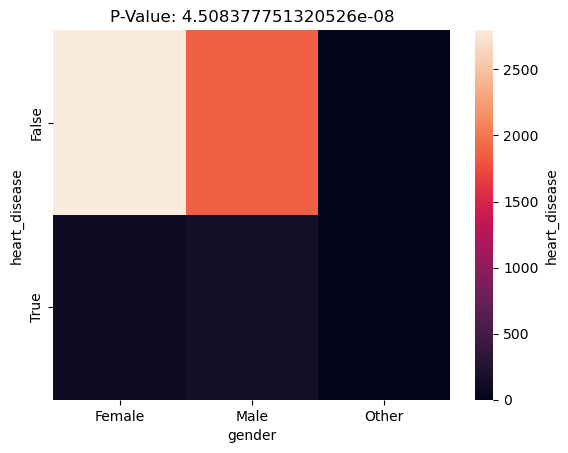

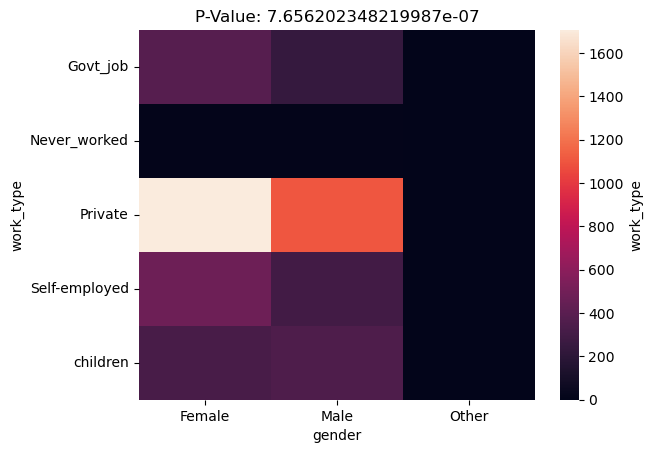

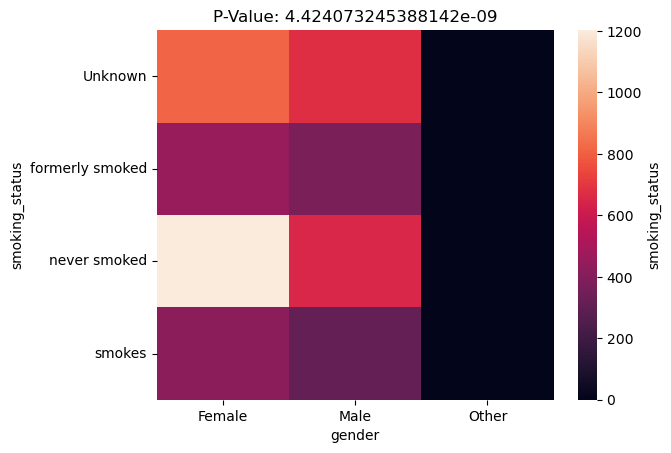

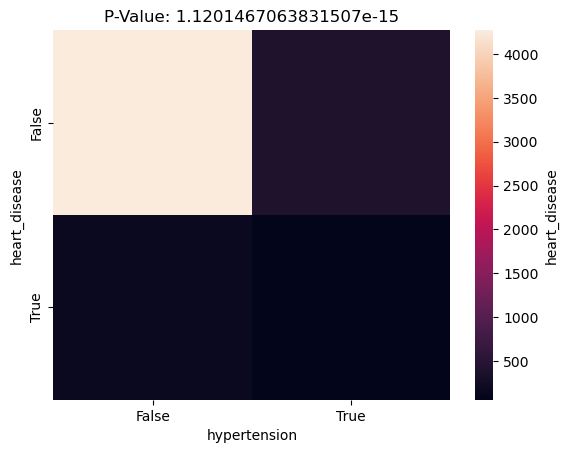

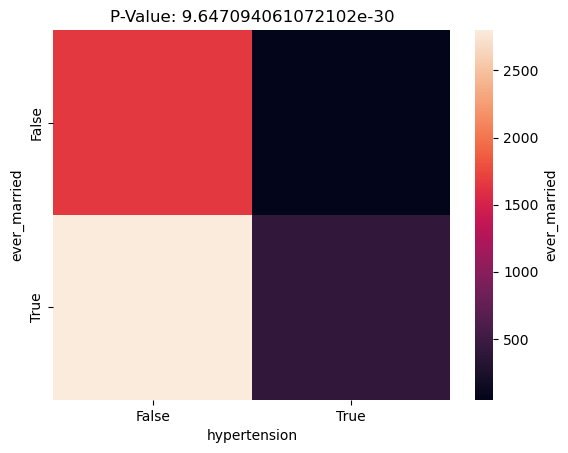

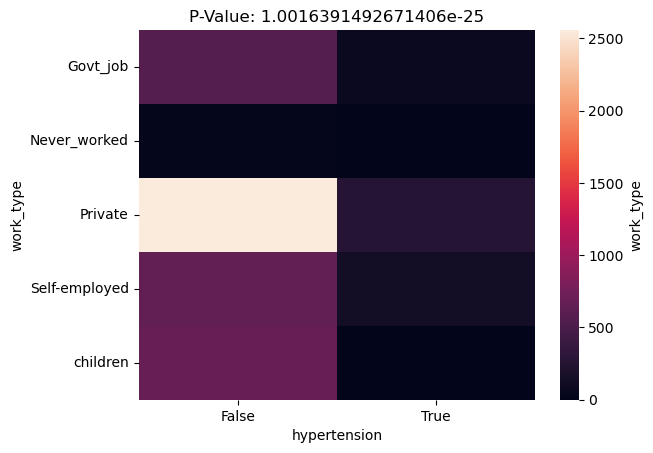

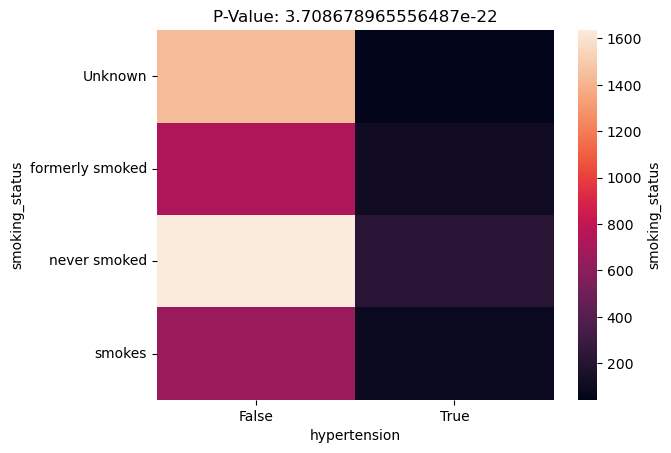

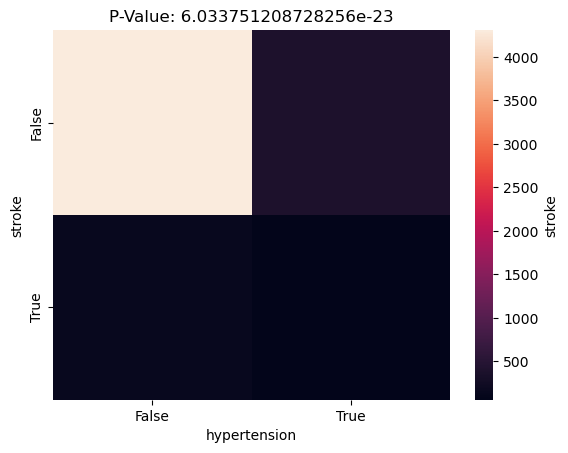

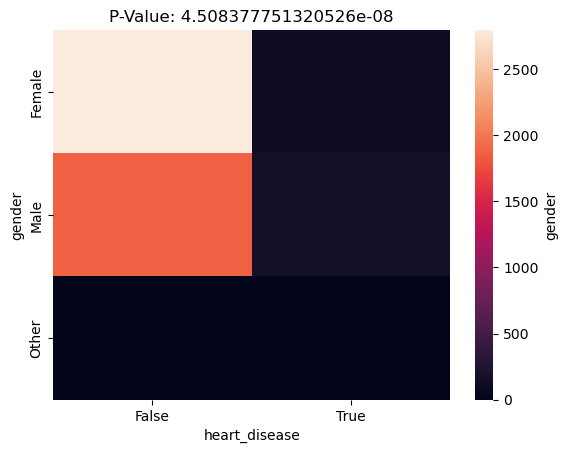

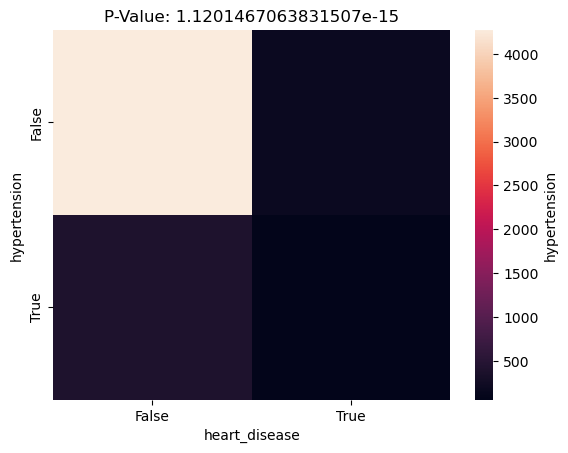

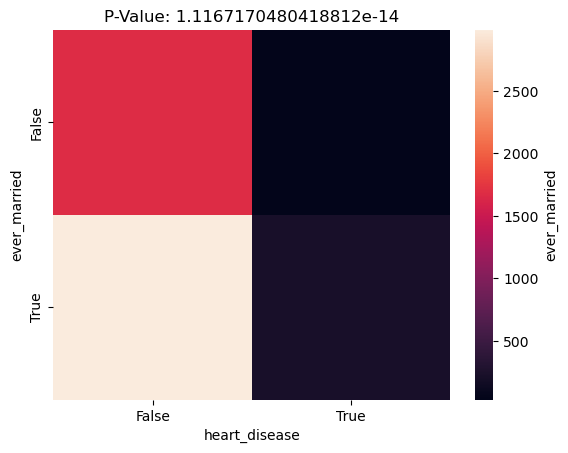

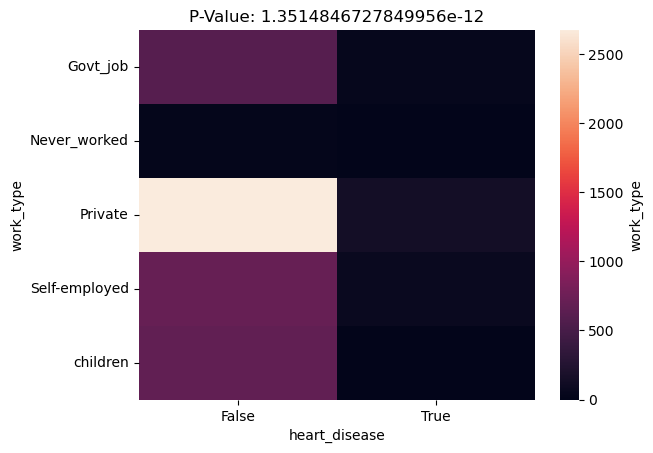

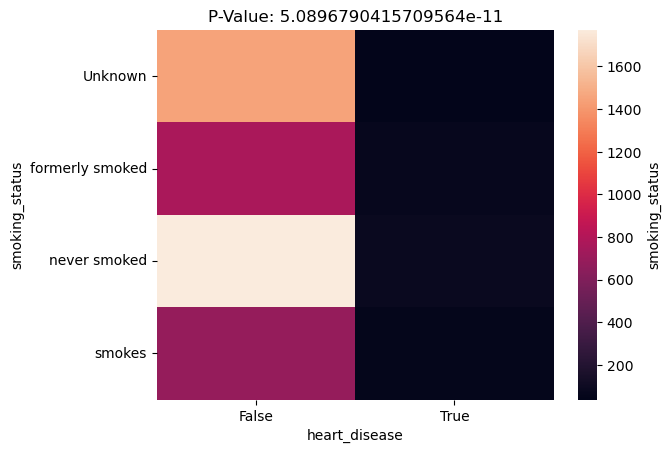

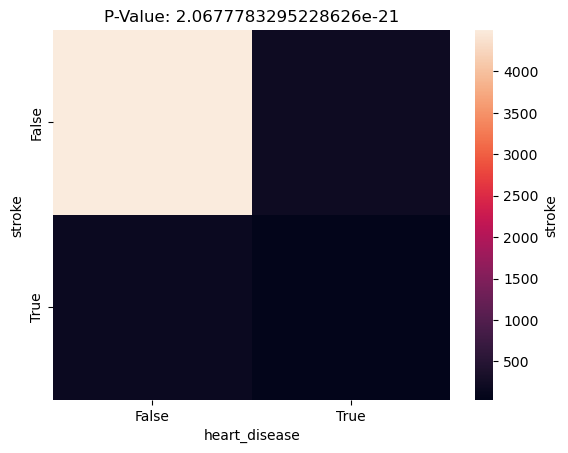

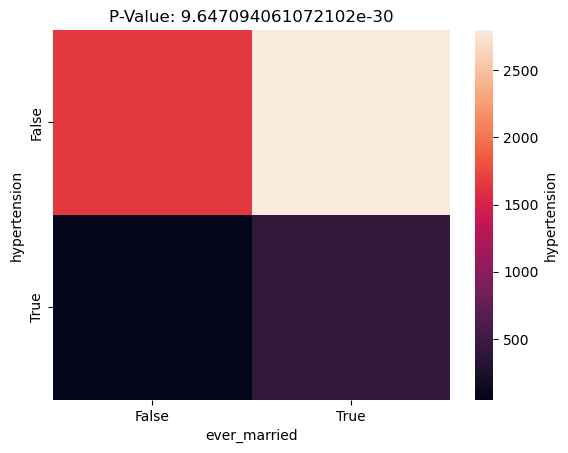

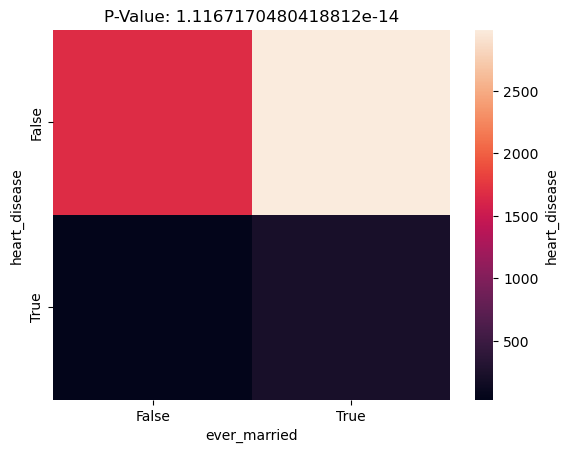

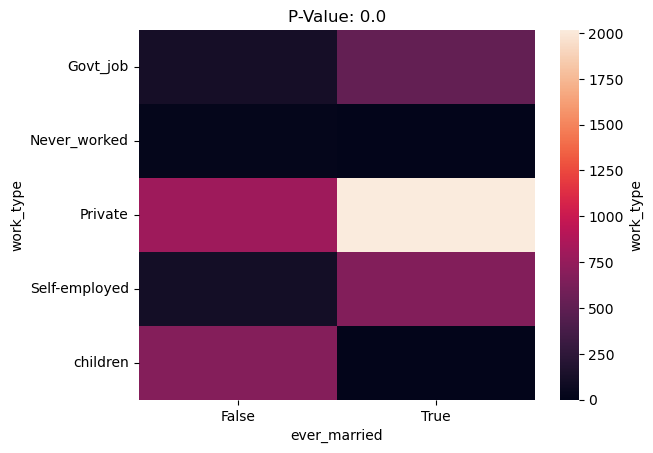

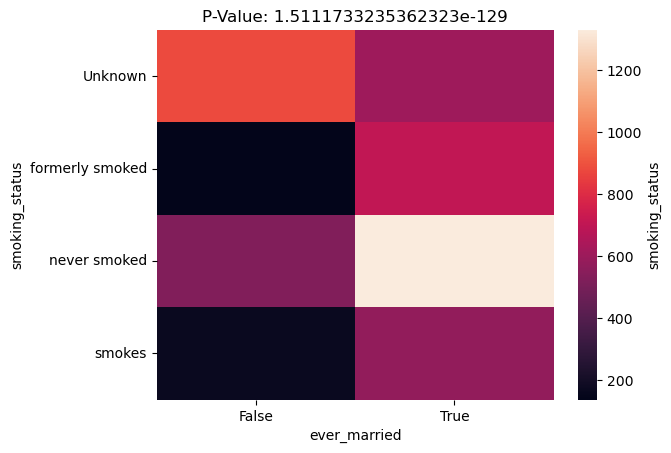

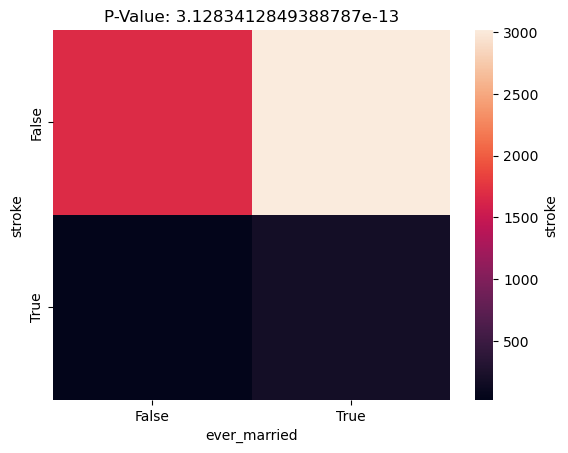

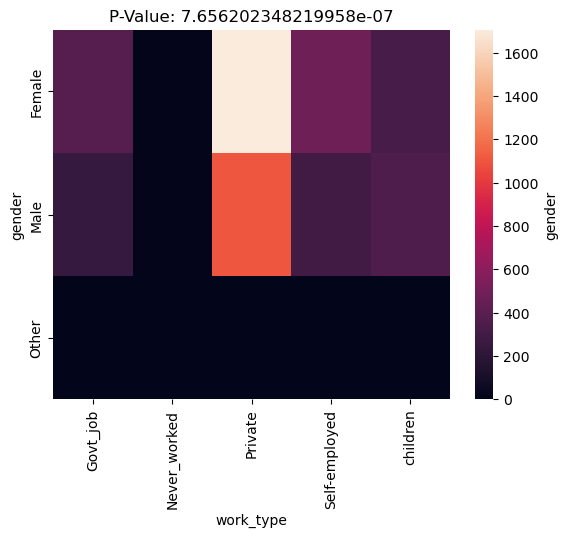

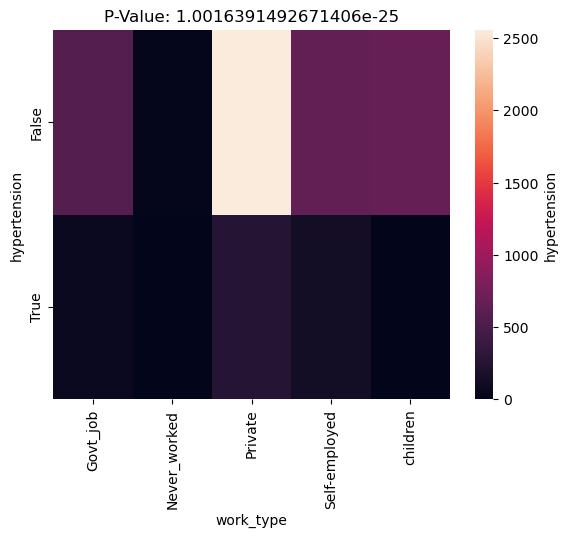

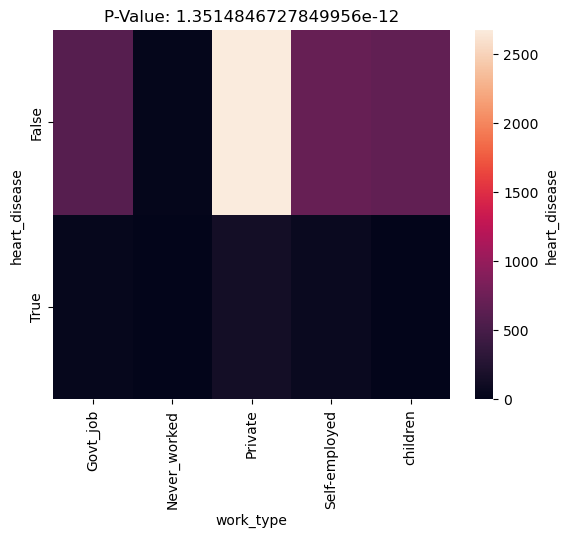

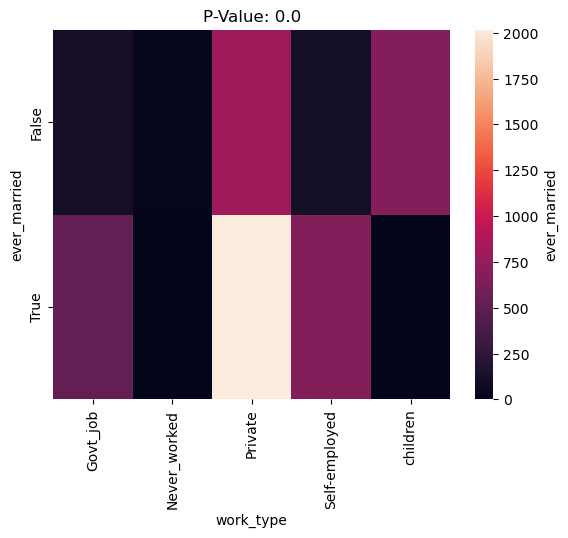

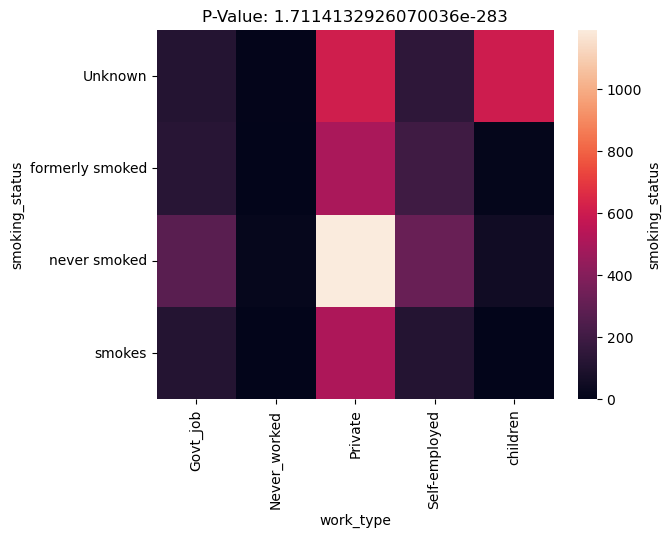

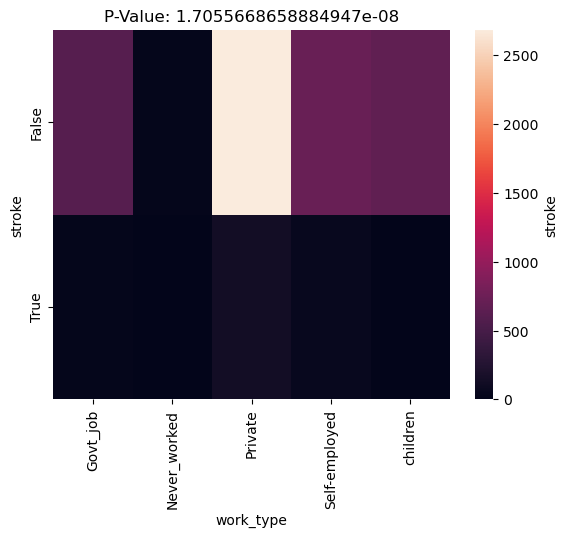

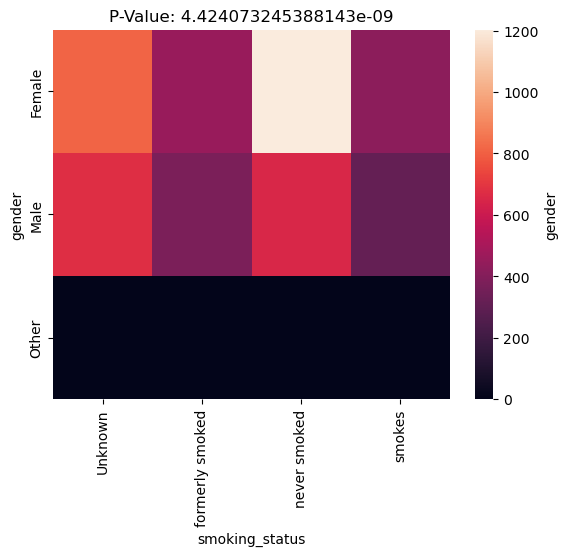

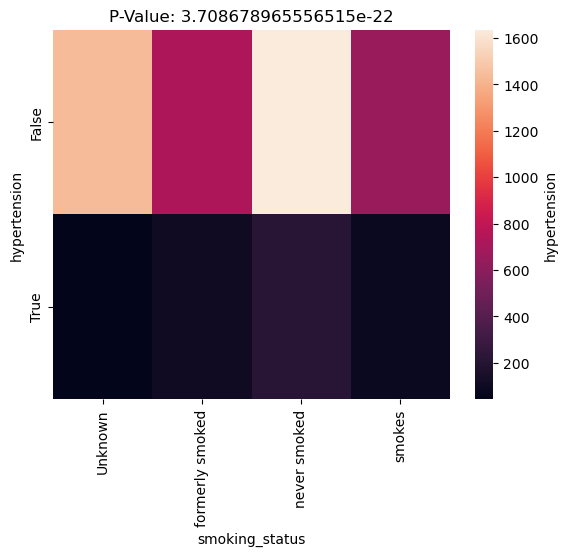

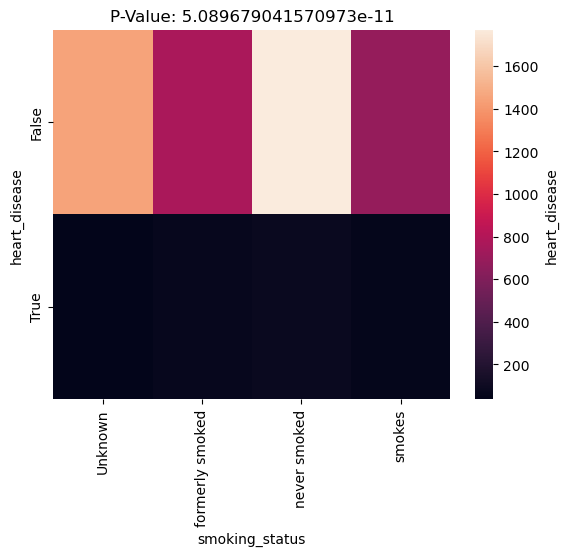

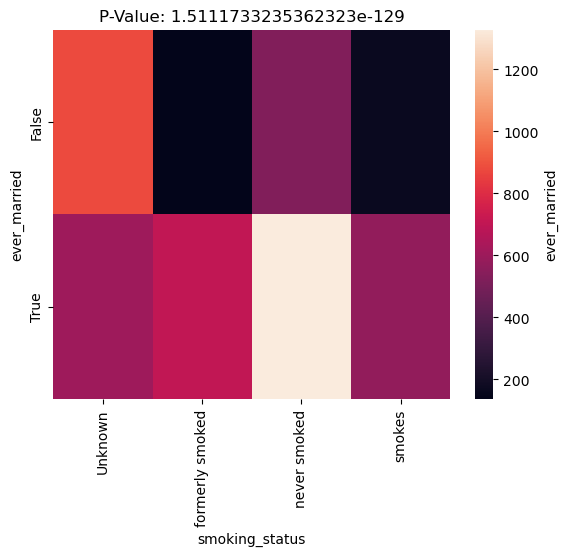

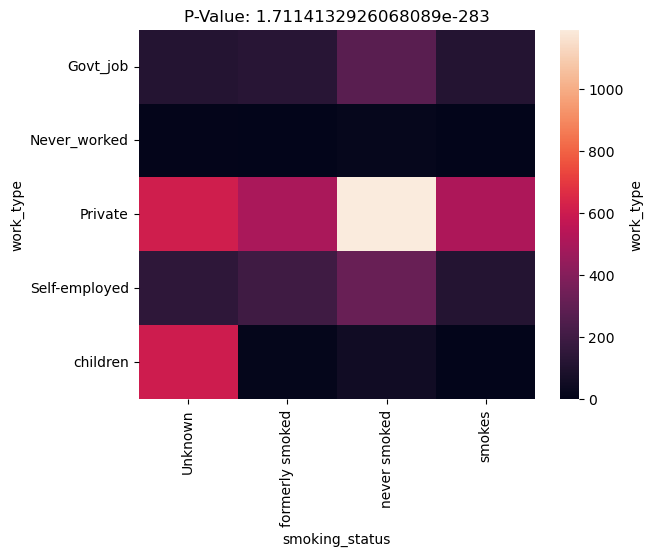

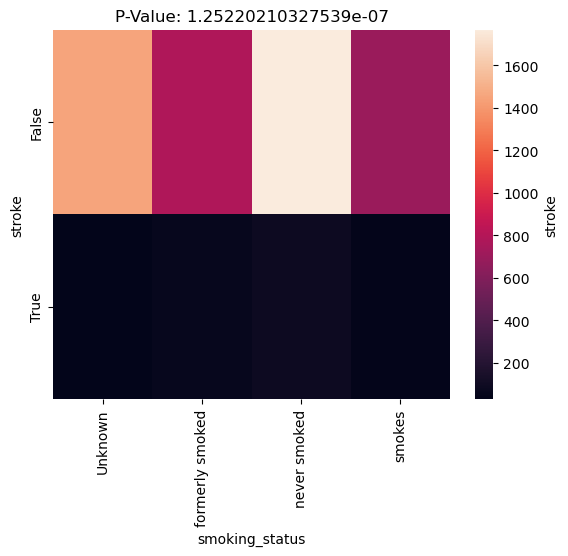

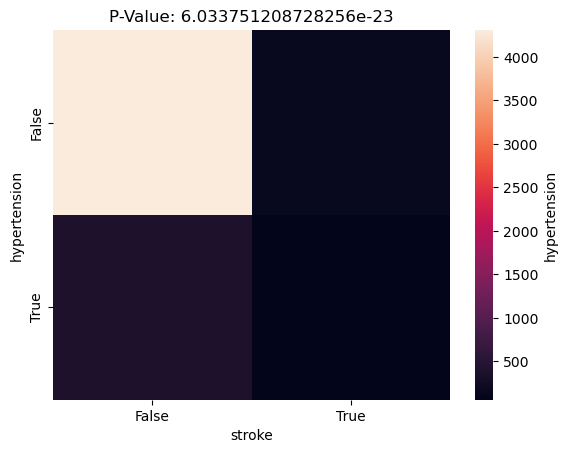

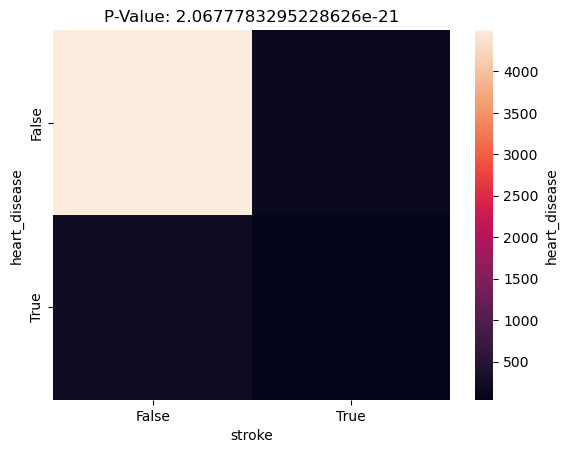

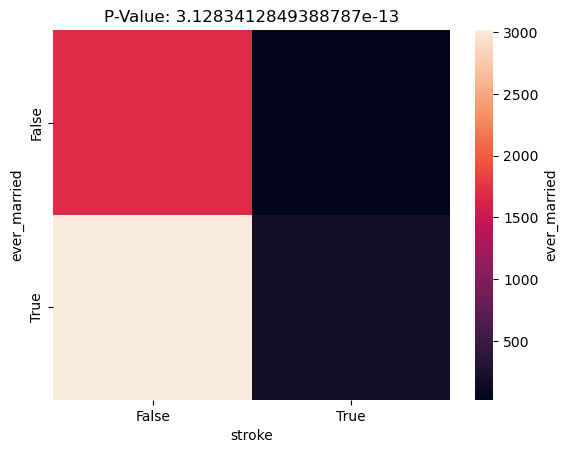

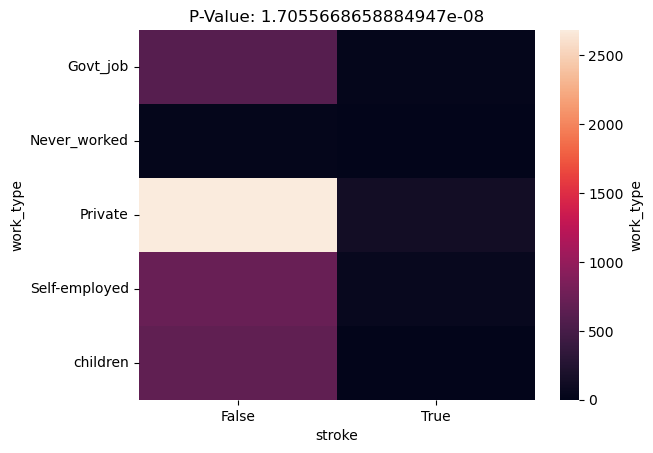

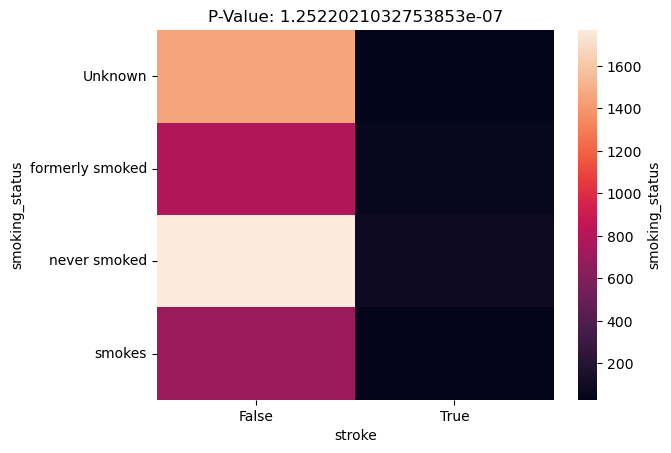

In [23]:
categorical_vs_categorical = []
for col1 in categorical_cols:
    for col2 in categorical_cols:
        if not col1 == col2:
            combination_counts = df[[col1,col2]].groupby(by=[col1,col2]).size().unstack(level=0)
            chi2, p, _, _ = stats.chi2_contingency(combination_counts)
            if p < 0.01:
                categorical_vs_categorical.append((p, col1, col2))

for entry in categorical_vs_categorical:
    p = entry[0]
    col1 = entry[1]
    col2 = entry[2]
    sns.heatmap(df.value_counts(subset=[col1,col2]).unstack(level=0).fillna(0), cbar_kws={'label': col2})
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title('P-Value: ' + str(p))
    plt.show()

The variables that have a statistically siginficant relationship between each other at a threshold of alpha = 0.01 are:

| Variables with Relationship | p-value |
| --------------------------- | ------- |
| heart_disease & gender | 4.50843e-08 |
| work_type & gender | 7.6562e-07 |
| smoking_status & gender | 4.4241e-09 |
| heart_disease & hypertension | 1.1201e-15 |
| ever_married & hypertension | 9.6471e-30 |
| work_type & hypertension | 1.0016e-25 |
| smoking_status & hypertension | 3.7087e-22 |
| stroke & hypertension | 6.0338e-23 |
| ever_married & heart_disease | 1.1167e-14 |
| work_type & heart_disease | 1.3515e-12 |
| smoking_status & heart_disease | 5.0897e-11 |
| stroke & heart_disease | 2.0678e-21 |
| work_type & ever_married | 0.0 |
| smoking_status & ever_married | 1.5111e-129 |
| stroke & ever_married | 3.1283e-13 |
| smoking_status & work_type | 1.7114e-283 |
| stroke & work_type | 1.7056e-08 |
| stroke & smoking_status | 1.2522e-07 |

From the table, we see that there is a statistically significant relationship between Hypertension and Strokes.

# Data Modeling and Prediction

We will now make Linear Regression, KNN, Random Forests, and SVMs models using four ways: Null, Greedy Approach, All Variables, and our Hypothesis with contains BMI and Hypertension as features only.

This will be done by undersampling and oversampling the data due to an imbalanced dataset.

## Undersampling Method
The next cells saves a copy of the original dataframe and does some testing with removing a fraction amount of rows of patients that did not have a stroke. This is one way that we will approach creating models due to the imbalanced dataset based on strokes.

In [24]:
df_1 = df.copy()

In [25]:
sample_df = df_1[df_1['stroke'] == 0].sample(frac=0.85)
df_1 = df_1.drop(sample_df.index)

## Feature Extraction
Dummy variables will be created for each categorical variable

In [26]:
continuous_cols = ['age', 'avg_glucose_level', 'bmi']
categorical_cols = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
all_cols = continuous_cols + categorical_cols

dummy_columns = {}
for col_name in categorical_cols:
    dummies = pd.get_dummies(df_1[col_name], prefix=col_name)
    dummy_columns[col_name] = dummies.columns.values
    df_1 = df_1.merge(dummies, left_index=True, right_index=True)

## Experiment Setup
The data will be split into training and testing. Also, the stroke column will be transfomred into a 0 or 1.

In [27]:
df_train, df_test = train_test_split(df_1, stratify=df_1["stroke"])

encoder = LabelEncoder()
y_train = encoder.fit_transform(df_train["stroke"].astype("str"))
y_test = encoder.transform(df_test["stroke"].astype("str"))

## Scaling the Data
The data for the features will now be scaled. We will also remove stroke from the training and testing sets.

In [28]:
df_train = df_train.drop(columns=['stroke', 'id', 'index'])
df_test = df_test.drop(columns=['stroke', 'id', 'index'])
X_train = df_train.values
X_test = df_test.values

## Simple Logisitc Regression

Null Model

Accuracy: 0.7729257641921398
Null Model MSE: 0.17586416396527052
Null Model RMSE: 0.4193616147971468
Null Model F2 Score: 0.0
Null Model Recall Score: 0.0


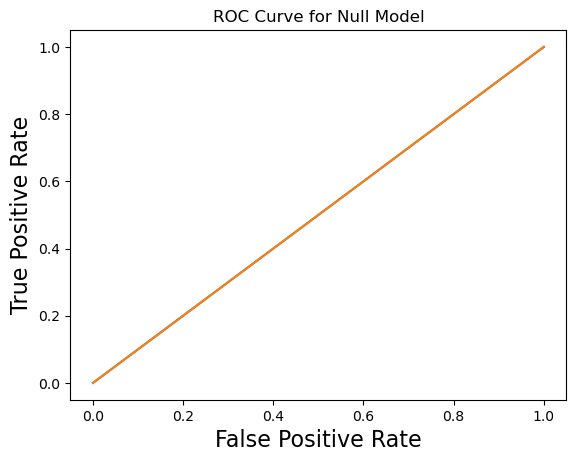

In [29]:
zeros_train = np.zeros(X_train.shape)
zeros_test = np.zeros(X_test.shape)

null_lr = SGDClassifier(max_iter=10000, loss="log")
null_lr.fit(zeros_train, y_train)

pred_null_labels = null_lr.predict(zeros_test)
pred_null_prob = null_lr.predict_proba(zeros_test)

null_accuracy = accuracy_score(y_test, pred_null_labels)

print("Accuracy:", null_accuracy)

# turn multiclass problem into binary problem
pred_null_prob_1 = 1.0 - pred_null_prob[:, 0]
y_test_1 = [0 if y == 0 else 1 for y in y_test]

fpr, tpr, _ = roc_curve(y_test_1, pred_null_prob_1)

plt.plot(fpr, tpr)
plt.plot([0.0, 1.0], [0.0, 1.0])
plt.xlabel("False Positive Rate", fontsize=16)
plt.ylabel("True Positive Rate", fontsize=16)
plt.title('ROC Curve for Null Model')
plt.plot()

# RMSE
null_mse = mean_squared_error(y_test_1, pred_null_prob_1)
null_rmse = np.sqrt(null_mse)
print("Null Model MSE:", null_mse)
print("Null Model RMSE:", null_rmse)

#F2-Score, recall
null_f2 = f2(y_test_1, pred_null_labels, beta=2.0)
null_recall = recall_score(y_test_1, pred_null_labels)
print("Null Model F2 Score:", null_f2)
print("Null Model Recall Score:", null_recall)

In [30]:
def create_feature_matrices(df_train, df_test, selected_columns, dummy_columns):
    """
    Creates feature matrices for the training and testing sets from the given dataframes.
    The feature matrices are built from the columns given in selected columns.
    """
    
    # keep track of numerical features
    numerical_trial_columns = []
    
    # keep track of dummy features for categorical variables
    categorical_trial_columns = []
    
    # build feature lists
    for col_name in selected_columns:
        if col_name in dummy_columns:
            categorical_trial_columns.extend(dummy_columns[col_name])
        else:
            numerical_trial_columns.append(col_name)

    # transform numerical features
    if len(numerical_trial_columns) > 0:
        X_train_numerical = df_train[numerical_trial_columns].astype("float64").values
        X_test_numerical = df_test[numerical_trial_columns].astype("float64").values
    
        imputer = SimpleImputer()
        X_train_numerical = imputer.fit_transform(X_train_numerical)
        X_test_numerical = imputer.transform(X_test_numerical)
    
        scaler = StandardScaler()
        X_train_numerical = scaler.fit_transform(X_train_numerical)
        X_test_numerical = scaler.transform(X_test_numerical)
    
    # select categorical features
    if len(categorical_trial_columns) > 0:
        X_train_categorical = df_train[categorical_trial_columns].astype("float64").values
        X_test_categorical = df_test[categorical_trial_columns].astype("float64").values
    
    # concatenate feature matrices
    if len(numerical_trial_columns) > 0 and len(categorical_trial_columns) > 0:
        X_train = np.hstack([X_train_numerical, X_train_categorical])
        X_test = np.hstack([X_test_numerical, X_test_categorical])
    elif len(numerical_trial_columns) > 0:
        X_train = X_train_numerical
        X_test = X_test_numerical
    else:
        X_train = X_train_categorical
        X_test = X_test_categorical
        
    return X_train, X_test

Greedy Approach

In [31]:
pred_null_labels = null_lr.predict(zeros_test)
pred_prob = null_lr.predict_proba(zeros_test)

null_accuracy = accuracy_score(y_test, pred_null_labels)
null_loss = log_loss(y_test, pred_prob)

In [32]:
print("Null Model Accuracy:", null_accuracy)

column_accuracies = []

for col_name in df_train.columns:
    X_train, X_test = create_feature_matrices(df_train, df_test, [col_name], dummy_columns)
    
    simple_lr = SGDClassifier(max_iter=10000, loss="log")
    simple_lr.fit(X_train, y_train)
    pred_labels = simple_lr.predict(X_test)
    pred_probs = simple_lr.predict_proba(X_test)
    simple_accuracy = accuracy_score(y_test, pred_labels)
    simple_loss = log_loss(y_test, pred_probs)
    print()
    print(col_name + " Accuracy:", simple_accuracy)
    print(col_name + " Loss:", simple_loss)
    column_accuracies.append((simple_accuracy, col_name))
    
column_accuracies.sort(key=lambda p: p[0], reverse=True)
sorted_columns = [col_name for _, col_name in column_accuracies]
print()
print("Sorted columns:" + str(sorted_columns))

Null Model Accuracy: 0.7729257641921398

gender Accuracy: 0.7729257641921398
gender Loss: 0.5393128246291927

age Accuracy: 0.7729257641921398
age Loss: 0.4689638861223122

hypertension Accuracy: 0.7860262008733624
hypertension Loss: 0.5135358202487845

heart_disease Accuracy: 0.7729257641921398
heart_disease Loss: 0.5712591407976019

ever_married Accuracy: 0.7729257641921398
ever_married Loss: 0.4896543544134571

work_type Accuracy: 0.7729257641921398
work_type Loss: 0.5025318201179069

Residence_type Accuracy: 0.7729257641921398
Residence_type Loss: 0.5522375133238029

avg_glucose_level Accuracy: 0.7729257641921398
avg_glucose_level Loss: 0.5151984774527011

bmi Accuracy: 0.7074235807860262
bmi Loss: 0.603553433532552

smoking_status Accuracy: 0.7729257641921398
smoking_status Loss: 0.530685749752414

gender_Female Accuracy: 0.7729257641921398
gender_Female Loss: 0.5491941805130178

gender_Male Accuracy: 0.7729257641921398
gender_Male Loss: 0.7005204678957704

gender_Other Accuracy: 

In [33]:
base_model_columns = []
base_loss = null_loss
base_accuracy = null_accuracy

print("Base Model Accuracy:", base_accuracy)
print("Base Model Loss:", base_loss)
print()

for col_name in sorted_columns:
    # track all column names
    trial_columns = base_model_columns[:]
    trial_columns.append(col_name)

    X_train, X_test = create_feature_matrices(df_train, df_test, trial_columns, dummy_columns)
    
    trial_lr = SGDClassifier(max_iter=50000, loss="log", penalty="l2")
    trial_lr.fit(X_train, y_train)
    pred_labels = trial_lr.predict(X_test)
    pred_prob = trial_lr.predict_proba(X_test)
    trial_accuracy = accuracy_score(y_test, pred_labels)
    trial_loss = log_loss(y_test, pred_prob)
    print()
    print(str(trial_columns) + " Model Accuracy:", trial_accuracy)
    print(str(trial_columns) + " Model Loss:", trial_loss)

    if trial_accuracy > base_accuracy:
        print("Updating base model")
        base_loss = trial_loss
        base_model_columns = trial_columns
        base_accuracy = trial_accuracy
    print()
    print("Base Model Loss:", base_loss)
    print("Base Model Accuracy:", base_accuracy)
    print()
    
print("Our chosen columns are: " + str(base_model_columns))

Base Model Accuracy: 0.7729257641921398
Base Model Loss: 0.5367634890911729


['hypertension'] Model Accuracy: 0.7860262008733624
['hypertension'] Model Loss: 0.5609881796660524
Updating base model

Base Model Loss: 0.5609881796660524
Base Model Accuracy: 0.7860262008733624


['hypertension', 'hypertension_True'] Model Accuracy: 0.7860262008733624
['hypertension', 'hypertension_True'] Model Loss: 0.5305880810157291

Base Model Loss: 0.5609881796660524
Base Model Accuracy: 0.7860262008733624


['hypertension', 'gender'] Model Accuracy: 0.7860262008733624
['hypertension', 'gender'] Model Loss: 0.5712070501379367

Base Model Loss: 0.5609881796660524
Base Model Accuracy: 0.7860262008733624


['hypertension', 'age'] Model Accuracy: 0.777292576419214
['hypertension', 'age'] Model Loss: 0.45487189075291584

Base Model Loss: 0.5609881796660524
Base Model Accuracy: 0.7860262008733624


['hypertension', 'heart_disease'] Model Accuracy: 0.7467248908296943
['hypertension', 'heart_disease'] Model L

In [34]:
greedy_X_train, greedy_X_test = create_feature_matrices(df_train, df_test, base_model_columns, dummy_columns)
    
greedy_lr = SGDClassifier(max_iter=10000, loss="log")
greedy_lr.fit(greedy_X_train, y_train)

SGDClassifier(loss='log', max_iter=10000)

Accuracy: 0.7729257641921398
Greedy Approach Model MSE: 0.1625332943435338
Greedy Approach RMSE: 0.40315418185048485
Greedy Model F2 Score: 0.0
Greedy Model Recall Score: 0.0


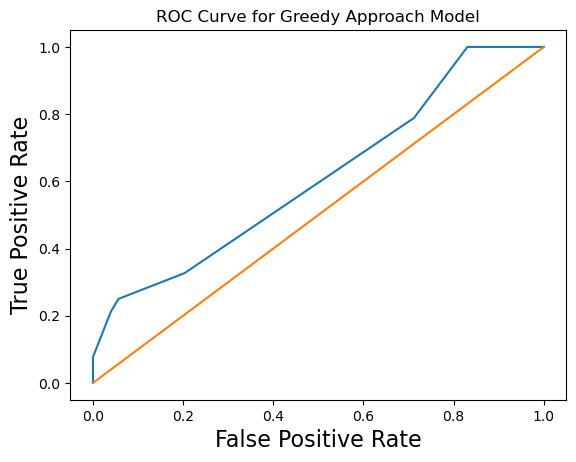

In [35]:
pred_greedy_labels = greedy_lr.predict(greedy_X_test)
pred_greedy_prob = greedy_lr.predict_proba(greedy_X_test)

greedy_accuracy = accuracy_score(y_test, pred_greedy_labels)

print("Accuracy:", greedy_accuracy)

# turn multiclass problem into binary problem
pred_greedy_prob_1 = 1.0 - pred_greedy_prob[:, 0]
y_test_1 = [0 if y == 0 else 1 for y in y_test]

fpr, tpr, _ = roc_curve(y_test_1, pred_greedy_prob_1)

plt.plot(fpr, tpr)
plt.plot([0.0, 1.0], [0.0, 1.0])
plt.xlabel("False Positive Rate", fontsize=16)
plt.ylabel("True Positive Rate", fontsize=16)
plt.title('ROC Curve for Greedy Approach Model')
plt.plot()

# RMSE
greedy_mse = mean_squared_error(y_test_1, pred_greedy_prob_1)
greedy_rmse = np.sqrt(greedy_mse)
print("Greedy Approach Model MSE:", greedy_mse)
print("Greedy Approach RMSE:", greedy_rmse)

# F2, recall
greedy_f2 = f2(y_test_1, pred_greedy_labels, beta=2.0)
greedy_recall = recall_score(y_test_1, pred_greedy_labels)
print("Greedy Model F2 Score:", greedy_f2)
print("Greedy Model Recall Score:", greedy_recall)

All Variables Model

In [36]:
all_X_train, all_X_test = create_feature_matrices(df_train, df_test, df_train.columns, dummy_columns)
    
all_lr = SGDClassifier(max_iter=10000, loss="log")
all_lr.fit(all_X_train, y_train)

SGDClassifier(loss='log', max_iter=10000)

Accuracy: 0.7205240174672489
All Variables Model MSE: 0.20395057355732235
All Variables Model RMSE: 0.45160887231909247
All Variables Model F2 Score: 0.5215827338129496
All Variables Model Recall Score: 0.5576923076923077


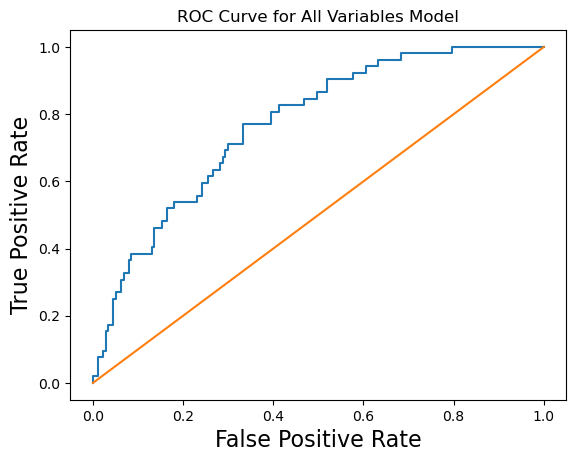

In [37]:
pred_all_labels = all_lr.predict(all_X_test)
pred_all_prob = all_lr.predict_proba(all_X_test)

all_accuracy = accuracy_score(y_test, pred_all_labels)

print("Accuracy:", all_accuracy)

# turn multiclass problem into binary problem
pred_all_prob_1 = 1.0 - pred_all_prob[:, 0]
y_test_1 = [0 if y == 0 else 1 for y in y_test]

fpr, tpr, _ = roc_curve(y_test_1, pred_all_prob_1)

plt.plot(fpr, tpr)
plt.plot([0.0, 1.0], [0.0, 1.0])
plt.xlabel("False Positive Rate", fontsize=16)
plt.ylabel("True Positive Rate", fontsize=16)
plt.title('ROC Curve for All Variables Model')
plt.plot()

# RMSE
all_mse = mean_squared_error(y_test_1, pred_all_prob_1)
all_rmse = np.sqrt(all_mse)
print("All Variables Model MSE:", all_mse)
print("All Variables Model RMSE:", all_rmse)

# F2, recall
all_f2 = f2(y_test_1, pred_all_labels, beta=2.0)
all_recall = recall_score(y_test_1, pred_all_labels)
print("All Variables Model F2 Score:", all_f2)
print("All Variables Model Recall Score:", all_recall)

BMI and Hypertension Model

In [38]:
bmi_hyp_X_train, bmi_hyp_X_test = create_feature_matrices(df_train, df_test, df_train[['bmi', 'hypertension']], dummy_columns)
    
bmi_hyp_lr = SGDClassifier(max_iter=10000, loss="log")
bmi_hyp_lr.fit(bmi_hyp_X_train, y_train)

SGDClassifier(loss='log', max_iter=10000)

Accuracy: 0.7729257641921398
BMI and Hypertension Variables Model MSE: 0.17440908561604285
BMI and Hypertension Variables Model RMSE: 0.41762313826707786
BMI and Hypertension Variables Model F2 Score: 0.1146788990825688
BMI and Hypertension Variables Model Recall Score: 0.09615384615384616


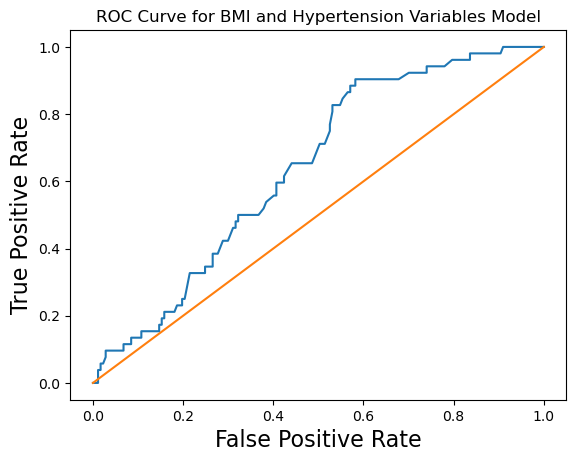

In [39]:
pred_bmi_hyp_labels = bmi_hyp_lr.predict(bmi_hyp_X_test)
pred_bmi_hyp_prob = bmi_hyp_lr.predict_proba(bmi_hyp_X_test)

bmi_hyp_accuracy = accuracy_score(y_test, pred_bmi_hyp_labels)

print("Accuracy:", bmi_hyp_accuracy)

# turn multiclass problem into binary problem
pred_bmi_hyp_prob_1 = 1.0 - pred_bmi_hyp_prob[:, 0]
y_test_1 = [0 if y == 0 else 1 for y in y_test]

fpr, tpr, _ = roc_curve(y_test_1, pred_bmi_hyp_prob_1)

plt.plot(fpr, tpr)
plt.plot([0.0, 1.0], [0.0, 1.0])
plt.xlabel("False Positive Rate", fontsize=16)
plt.ylabel("True Positive Rate", fontsize=16)
plt.title('ROC Curve for BMI and Hypertension Variables Model')
plt.plot()

# RMSE
bmi_hyp_mse = mean_squared_error(y_test_1, pred_bmi_hyp_prob_1)
bmi_hyp_rmse = np.sqrt(bmi_hyp_mse)
print("BMI and Hypertension Variables Model MSE:", bmi_hyp_mse)
print("BMI and Hypertension Variables Model RMSE:", bmi_hyp_rmse)

# F2, recall
bmi_hyp_f2 = f2(y_test_1, pred_bmi_hyp_labels, beta=2.0)
bmi_hyp_recall = recall_score(y_test_1, pred_bmi_hyp_labels)
print("BMI and Hypertension Variables Model F2 Score:", bmi_hyp_f2)
print("BMI and Hypertension Variables Model Recall Score:", bmi_hyp_recall)

## KNN Model (undersampling)

In [40]:
knn_verbose = True

Accuracy: 0.7729257641921398
Null KNN Model MSE: 0.22707423580786026
Null KNN Model RMSE: 0.47652306954423546
Null KNN Model F2 Score: 0.0
Null KNN Model Recall Score: 0.0
Null KNN Model Accuracy: 0.7729257641921398

gender Accuracy: 0.7729257641921398
gender Loss: 0.5379352839702548
F2 Score: 0.0
Recall Score: 0.0

age Accuracy: 0.7685589519650655
age Loss: 1.5506484270452792
F2 Score: 0.2953586497890295
Recall Score: 0.2692307692307692

hypertension Accuracy: 0.7860262008733624
hypertension Loss: 0.5197742224708675
F2 Score: 0.28138528138528135
Recall Score: 0.25

heart_disease Accuracy: 0.7729257641921398
heart_disease Loss: 7.277880725418644
F2 Score: 0.0
Recall Score: 0.0

ever_married Accuracy: 0.7729257641921398
ever_married Loss: 7.549621863383412
F2 Score: 0.0
Recall Score: 0.0

work_type Accuracy: 0.7685589519650655
work_type Loss: 5.991703775625059
F2 Score: 0.0
Recall Score: 0.0

Residence_type Accuracy: 0.7729257641921398
Residence_type Loss: 3.9125050196304714
F2 Score: 0


['hypertension', 'Residence_type', 'gender_Female'] Model Accuracy: 0.7685589519650655
['hypertension', 'Residence_type', 'gender_Female'] Model Loss: 3.622662113451174
['hypertension', 'Residence_type', 'gender_Female'] Model F2: 0.06976744186046512
['hypertension', 'Residence_type', 'gender_Female'] Model Recall: 0.057692307692307696

Base Model Accuracy: 0.7947598253275109
Base Model Loss: 3.040559017322035
Base Model F2 Score: 0.16129032258064513
Base Model Recall: 0.1346153846153846


['hypertension', 'Residence_type', 'gender_Male'] Model Accuracy: 0.759825327510917
['hypertension', 'Residence_type', 'gender_Male'] Model Loss: 3.033246902719823
['hypertension', 'Residence_type', 'gender_Male'] Model F2: 0.0
['hypertension', 'Residence_type', 'gender_Male'] Model Recall: 0.0

Base Model Accuracy: 0.7947598253275109
Base Model Loss: 3.040559017322035
Base Model F2 Score: 0.16129032258064513
Base Model Recall: 0.1346153846153846


['hypertension', 'Residence_type', 'gender_Other'] 


['hypertension', 'Residence_type', 'smoking_status_formerly smoked', 'work_type_Govt_job'] Model Accuracy: 0.777292576419214
['hypertension', 'Residence_type', 'smoking_status_formerly smoked', 'work_type_Govt_job'] Model Loss: 2.1683311486644348
['hypertension', 'Residence_type', 'smoking_status_formerly smoked', 'work_type_Govt_job'] Model F2: 0.02392344497607656
['hypertension', 'Residence_type', 'smoking_status_formerly smoked', 'work_type_Govt_job'] Model Recall: 0.019230769230769232

Base Model Accuracy: 0.8034934497816594
Base Model Loss: 2.4377914322465646
Base Model F2 Score: 0.2054794520547945
Base Model Recall: 0.17307692307692307

Our chosen columns are: ['hypertension', 'Residence_type', 'smoking_status_formerly smoked']
Accuracy: 0.8034934497816594
Greedy KNN Approach Model MSE: 0.16803493449781662
Greedy KNN Approach RMSE: 0.40992064414690876
Greedy KNN Model F2 Score: 0.2054794520547945
Greedy KNN Model Recall Score: 0.17307692307692307
Accuracy: 0.7685589519650655
All

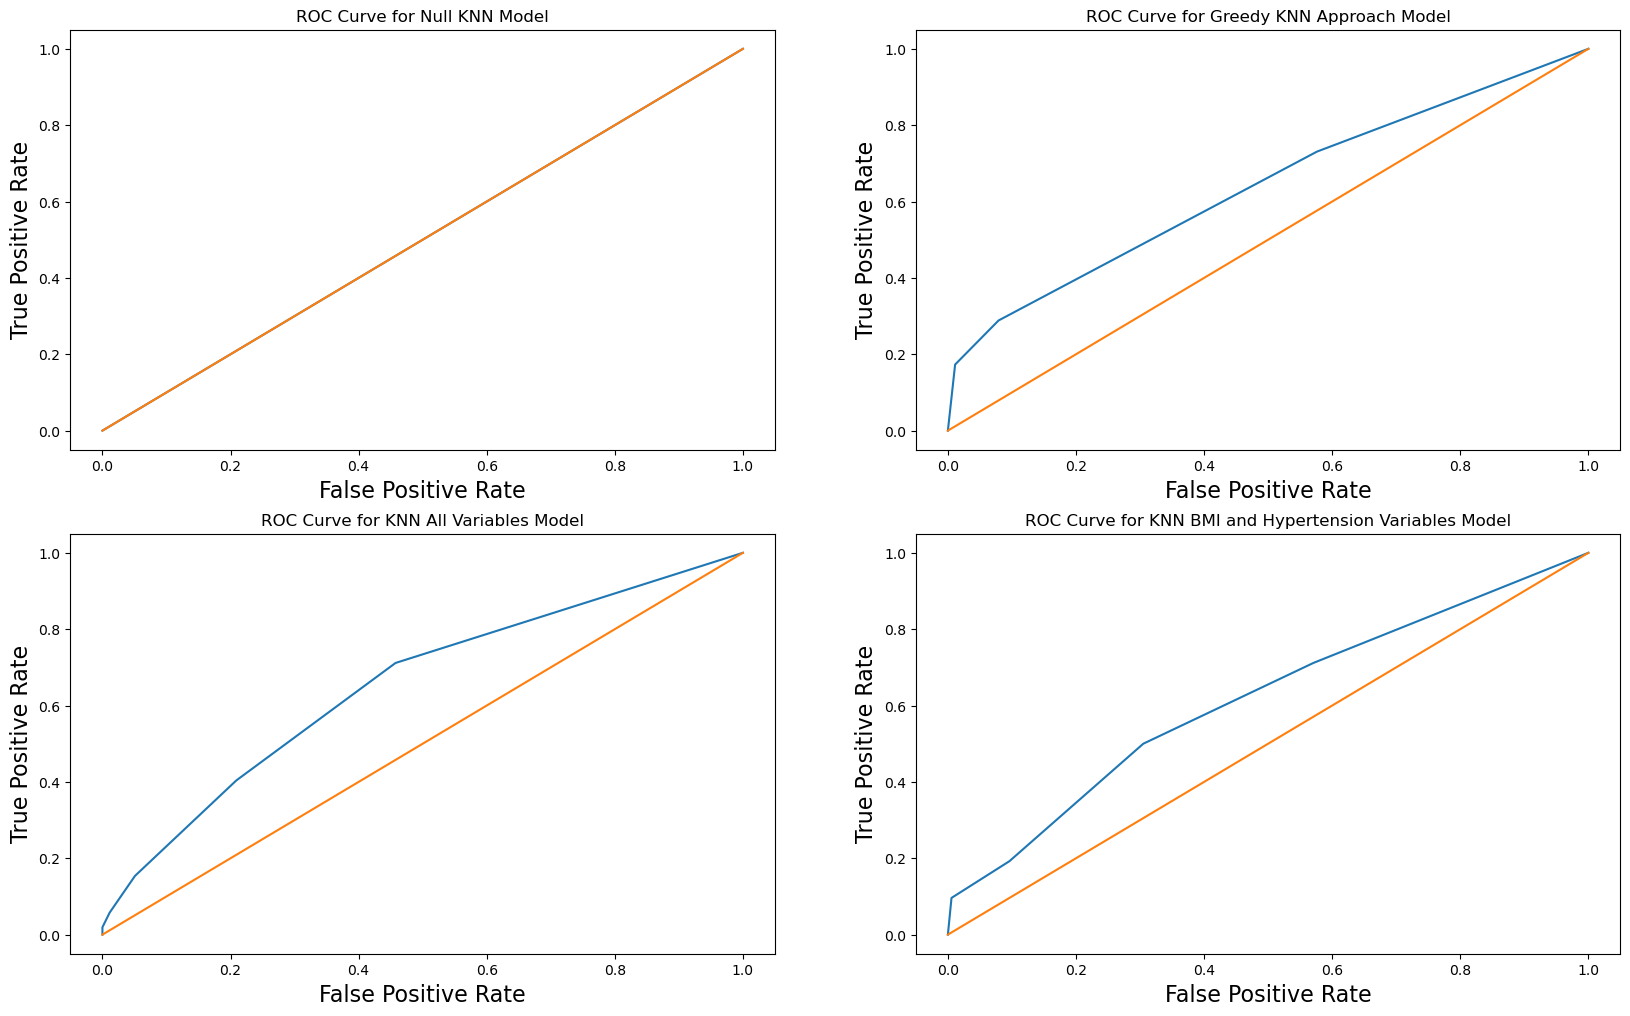

In [41]:
knn_fig, knn_ax = plt.subplots(2,2, figsize=[20, 12])

zeros_train = np.zeros(X_train.shape)
zeros_test = np.zeros(X_test.shape)

null_knn = KNClassifier()
null_knn.fit(zeros_train, y_train)

pred_null_knn_labels = null_knn.predict(zeros_test)
pred_null_knn_prob = null_knn.predict_proba(zeros_test)

null_knn_accuracy = accuracy_score(y_test, pred_null_knn_labels)

# turn multiclass problem into binary problem
pred_null_knn_prob_1 = 1.0 - pred_null_knn_prob[:, 0]
y_test_1 = [0 if y == 0 else 1 for y in y_test]

fpr, tpr, _ = roc_curve(y_test_1, pred_null_knn_prob_1)

knn_ax[0,0].plot(fpr, tpr)
knn_ax[0,0].plot([0.0, 1.0], [0.0, 1.0])
knn_ax[0,0].set_xlabel("False Positive Rate", fontsize=16)
knn_ax[0,0].set_ylabel("True Positive Rate", fontsize=16)
knn_ax[0,0].set_title('ROC Curve for Null KNN Model')
#knn_ax[0].plot()

# RMSE
null_knn_mse = mean_squared_error(y_test_1, pred_null_knn_prob_1)
null_knn_rmse = np.sqrt(null_knn_mse)

#F2-Score, recall
null_knn_f2 = f2(y_test_1, pred_null_knn_labels, beta=2.0)
null_knn_recall = recall_score(y_test_1, pred_null_knn_labels)

if knn_verbose:
    print("Accuracy:", null_knn_accuracy)
    print("Null KNN Model MSE:", null_knn_mse)
    print("Null KNN Model RMSE:", null_knn_rmse)
    print("Null KNN Model F2 Score:", null_knn_f2)
    print("Null KNN Model Recall Score:", null_knn_recall)

##########

pred_null_knn_labels = null_knn.predict(zeros_test)
pred_prob = null_knn.predict_proba(zeros_test)

null_knn_accuracy = accuracy_score(y_test, pred_null_knn_labels)
null_knn_loss = log_loss(y_test, pred_prob)

##########

if knn_verbose:
    print("Null KNN Model Accuracy:", null_accuracy)

column_accuracies_knn = []

for col_name in df_train.columns:
    X_train, X_test = create_feature_matrices(df_train, df_test, [col_name], dummy_columns)
    
    simple_knn = KNClassifier()
    simple_knn.fit(X_train, y_train)
    pred_labels = simple_knn.predict(X_test)
    pred_probs = simple_knn.predict_proba(X_test)
    simple_accuracy = accuracy_score(y_test, pred_labels)
    simple_loss = log_loss(y_test, pred_probs)
    simple_f2 = f2(y_test, pred_labels, beta=2.0)
    simple_recall = recall_score(y_test, pred_labels)
    if knn_verbose:
        print()
        print(col_name + " Accuracy:", simple_accuracy)
        print(col_name + " Loss:", simple_loss)
        print("F2 Score:", simple_f2)
        print("Recall Score:", simple_recall)
    column_accuracies_knn.append((simple_accuracy, col_name))
    
column_accuracies_knn.sort(key=lambda p: p[0], reverse=True)
sorted_columns_knn = [col_name for _, col_name in column_accuracies]

if knn_verbose:
    print()
    print("Sorted columns:" + str(sorted_columns_knn))
    
###############

base_knn_model_columns = []
base_knn_loss = null_knn_loss
base_knn_accuracy = null_knn_accuracy
base_knn_f2 = null_knn_f2
base_knn_recall = null_knn_recall

if knn_verbose:
    print("Base KNN Model Accuracy:", base_knn_accuracy)
    print("Base KNN Model Loss:", base_knn_loss)
    print("Base KNN Model F-beta Score:", base_knn_f2)
    print("Base KNN Model Recall:", base_knn_recall)
    print()

for col_name in sorted_columns_knn:
    # track all column names
    trial_columns = base_knn_model_columns[:]
    trial_columns.append(col_name)

    X_train, X_test = create_feature_matrices(df_train, df_test, trial_columns, dummy_columns)
    
    trial_knn = KNClassifier()
    trial_knn.fit(X_train, y_train)
    pred_labels = trial_knn.predict(X_test)
    pred_prob = trial_knn.predict_proba(X_test)
    trial_accuracy = accuracy_score(y_test, pred_labels)
    trial_loss = log_loss(y_test, pred_prob)
    trial_f2 = f2(y_test, pred_labels, beta=2.0)
    trial_recall = recall_score(y_test, pred_labels)
    if knn_verbose:
        print()
        print(str(trial_columns) + " Model Accuracy:", trial_accuracy)
        print(str(trial_columns) + " Model Loss:", trial_loss)
        print(str(trial_columns) + " Model F2:", trial_f2)
        print(str(trial_columns) + " Model Recall:", trial_recall)
    

    if trial_accuracy > base_knn_accuracy:
        if knn_verbose:
            print("Updating base model with column \'" + str(col_name) + "\'")
        base_knn_loss = trial_loss
        base_knn_model_columns = trial_columns
        base_knn_accuracy = trial_accuracy
        base_knn_f2 = trial_f2
        base_knn_recall = trial_recall
    if knn_verbose:
        print()
        print("Base Model Accuracy:", base_knn_accuracy)
        print("Base Model Loss:", base_knn_loss)
        print("Base Model F2 Score:", base_knn_f2)
        print("Base Model Recall:", base_knn_recall)
        print()
    
print("Our chosen columns are: " + str(base_knn_model_columns))


############

greedy_knn_X_train, greedy_knn_X_test = create_feature_matrices(df_train, df_test, base_knn_model_columns, dummy_columns)
    
greedy_knn = KNClassifier()
greedy_knn.fit(greedy_knn_X_train, y_train)

#############

pred_greedy_knn_labels = greedy_knn.predict(greedy_knn_X_test)
pred_greedy_knn_prob = greedy_knn.predict_proba(greedy_knn_X_test)

greedy_knn_accuracy = accuracy_score(y_test, pred_greedy_knn_labels)

# turn multiclass problem into binary problem
pred_greedy_knn_prob_1 = 1.0 - pred_greedy_knn_prob[:, 0]
y_test_1 = [0 if y == 0 else 1 for y in y_test]

fpr, tpr, _ = roc_curve(y_test_1, pred_greedy_knn_prob_1)

knn_ax[0,1].plot(fpr, tpr)
knn_ax[0,1].plot([0.0, 1.0], [0.0, 1.0])
knn_ax[0,1].set_xlabel("False Positive Rate", fontsize=16)
knn_ax[0,1].set_ylabel("True Positive Rate", fontsize=16)
knn_ax[0,1].set_title('ROC Curve for Greedy KNN Approach Model')
# plt.plot()

# RMSE
greedy_knn_mse = mean_squared_error(y_test_1, pred_greedy_knn_prob_1)
greedy_knn_rmse = np.sqrt(greedy_knn_mse)

# F2, recall
greedy_knn_f2 = f2(y_test_1, pred_greedy_knn_labels, beta=2.0)
greedy_knn_recall = recall_score(y_test_1, pred_greedy_knn_labels)

if knn_verbose:
    print("Accuracy:", greedy_knn_accuracy)
    print("Greedy KNN Approach Model MSE:", greedy_knn_mse)
    print("Greedy KNN Approach RMSE:", greedy_knn_rmse)
    print("Greedy KNN Model F2 Score:", greedy_knn_f2)
    print("Greedy KNN Model Recall Score:", greedy_knn_recall)

#####################

all_knn_X_train, all_knn_X_test = create_feature_matrices(df_train, df_test, df_train.columns, dummy_columns)
    
all_knn = KNClassifier()
all_knn.fit(all_knn_X_train, y_train)

#####################

pred_all_knn_labels = all_knn.predict(all_knn_X_test)
pred_all_knn_prob = all_knn.predict_proba(all_knn_X_test)

all_knn_accuracy = accuracy_score(y_test, pred_all_knn_labels)

# turn multiclass problem into binary problem
pred_all_knn_prob_1 = 1.0 - pred_all_knn_prob[:, 0]
y_test_1 = [0 if y == 0 else 1 for y in y_test]

fpr, tpr, _ = roc_curve(y_test_1, pred_all_knn_prob_1)

knn_ax[1,0].plot(fpr, tpr)
knn_ax[1,0].plot([0.0, 1.0], [0.0, 1.0])
knn_ax[1,0].set_xlabel("False Positive Rate", fontsize=16)
knn_ax[1,0].set_ylabel("True Positive Rate", fontsize=16)
knn_ax[1,0].set_title('ROC Curve for KNN All Variables Model')
# plt.plot()

# RMSE
all_knn_mse = mean_squared_error(y_test_1, pred_all_knn_prob_1)
all_knn_rmse = np.sqrt(all_knn_mse)

# F2, recall
all_knn_f2 = f2(y_test_1, pred_all_knn_labels, beta=2.0)
all_knn_recall = recall_score(y_test_1, pred_all_knn_labels)

if knn_verbose:
    print("Accuracy:", all_knn_accuracy)
    print("All Variables KNN Model MSE:", all_knn_mse)
    print("All Variables KNN Model RMSE:", all_knn_rmse)
    print("All Variables KNN Model F2 Score:", all_knn_f2)
    print("All Variables KNN Model Recall Score:", all_knn_recall)
    
#########
    
bmi_hyp_knn_X_train, bmi_hyp_knn_X_test = create_feature_matrices(df_train, df_test, df_train[['bmi', 'hypertension']], dummy_columns)
  
    
bmi_hyp_knn = KNClassifier()
bmi_hyp_knn.fit(bmi_hyp_knn_X_train, y_train)

pred_bmi_hyp_knn_labels = bmi_hyp_knn.predict(bmi_hyp_knn_X_test)
pred_bmi_hyp_knn_prob = bmi_hyp_knn.predict_proba(bmi_hyp_knn_X_test)

bmi_hyp_knn_accuracy = accuracy_score(y_test, pred_bmi_hyp_knn_labels)

# turn multiclass problem into binary problem
pred_bmi_hyp_knn_prob_1 = 1.0 - pred_bmi_hyp_knn_prob[:, 0]
y_test_1 = [0 if y == 0 else 1 for y in y_test]

fpr, tpr, _ = roc_curve(y_test_1, pred_bmi_hyp_knn_prob_1)

knn_ax[1,1].plot(fpr, tpr)
knn_ax[1,1].plot([0.0, 1.0], [0.0, 1.0])
knn_ax[1,1].set_xlabel("False Positive Rate", fontsize=16)
knn_ax[1,1].set_ylabel("True Positive Rate", fontsize=16)
knn_ax[1,1].set_title('ROC Curve for KNN BMI and Hypertension Variables Model')
plt.plot()

# RMSE
bmi_hyp_knn_mse = mean_squared_error(y_test_1, pred_bmi_hyp_knn_prob_1)
bmi_hyp_knn_rmse = np.sqrt(bmi_hyp_knn_mse)

# F2, recall
bmi_hyp_knn_f2 = f2(y_test_1, pred_bmi_hyp_knn_labels, beta=2.0)
bmi_hyp_knn_recall = recall_score(y_test_1, pred_bmi_hyp_knn_labels)

if knn_verbose:
    print("Accuracy:", bmi_hyp_knn_accuracy)
    print("KNN BMI and Hypertension Variables Model MSE:", bmi_hyp_knn_mse)
    print("KNN BMI and Hypertension Variables Model RMSE:", bmi_hyp_knn_rmse)
    print("KNN BMI and Hypertension Variables Model F2 Score:", bmi_hyp_knn_f2)
    print("KNN BMI and Hypertension Variables Model Recall Score:", bmi_hyp_knn_recall)
    
plt.show()

## Random Forests Model (undersampling)

In [42]:
rfc_verbose = True

Accuracy: 0.7729257641921398
Null RFC Model MSE: 0.1755122055149472
Null RFC Model RMSE: 0.41894176864445876
Null RFC Model F2 Score: 0.0
Null RFC Model Recall Score: 0.0
Null RFC Model Accuracy: 0.7729257641921398

gender Accuracy: 0.7729257641921398
gender Loss: 0.5355182402986578
F2 Score: 0.0
Recall Score: 0.0

age Accuracy: 0.7816593886462883
age Loss: 0.9962593478282323
F2 Score: 0.4233870967741936
Recall Score: 0.40384615384615385

hypertension Accuracy: 0.7860262008733624
hypertension Loss: 0.5060704329754908
F2 Score: 0.28138528138528135
Recall Score: 0.25

heart_disease Accuracy: 0.7467248908296943
heart_disease Loss: 0.5464193102064252
F2 Score: 0.0900900900900901
Recall Score: 0.07692307692307693

ever_married Accuracy: 0.7729257641921398
ever_married Loss: 0.49141356625199584
F2 Score: 0.0
Recall Score: 0.0

work_type Accuracy: 0.7729257641921398
work_type Loss: 0.4983556490818872
F2 Score: 0.0
Recall Score: 0.0

Residence_type Accuracy: 0.7729257641921398
Residence_type L


['hypertension', 'Residence_type', 'hypertension_False'] Model Accuracy: 0.7947598253275109
['hypertension', 'Residence_type', 'hypertension_False'] Model Loss: 0.5060091563591069
['hypertension', 'Residence_type', 'hypertension_False'] Model F2: 0.16129032258064513
['hypertension', 'Residence_type', 'hypertension_False'] Model Recall: 0.1346153846153846

Base Model Accuracy: 0.7947598253275109
Base Model Loss: 0.5057260475377361
Base Model F2 Score: 0.16129032258064513
Base Model Recall: 0.1346153846153846


['hypertension', 'Residence_type', 'heart_disease_True'] Model Accuracy: 0.759825327510917
['hypertension', 'Residence_type', 'heart_disease_True'] Model Loss: 0.5145447974186307
['hypertension', 'Residence_type', 'heart_disease_True'] Model F2: 0.046511627906976744
['hypertension', 'Residence_type', 'heart_disease_True'] Model Recall: 0.038461538461538464

Base Model Accuracy: 0.7947598253275109
Base Model Loss: 0.5057260475377361
Base Model F2 Score: 0.16129032258064513
Base Mo


['hypertension', 'Residence_type', 'smoking_status_formerly smoked', 'bmi'] Model Accuracy: 0.7467248908296943
['hypertension', 'Residence_type', 'smoking_status_formerly smoked', 'bmi'] Model Loss: 1.946088953229094
['hypertension', 'Residence_type', 'smoking_status_formerly smoked', 'bmi'] Model F2: 0.342741935483871
['hypertension', 'Residence_type', 'smoking_status_formerly smoked', 'bmi'] Model Recall: 0.3269230769230769

Base Model Accuracy: 0.8034934497816594
Base Model Loss: 0.498401800228126
Base Model F2 Score: 0.2054794520547945
Base Model Recall: 0.17307692307692307


['hypertension', 'Residence_type', 'smoking_status_formerly smoked', 'work_type_Govt_job'] Model Accuracy: 0.7991266375545851
['hypertension', 'Residence_type', 'smoking_status_formerly smoked', 'work_type_Govt_job'] Model Loss: 0.4948328332465304
['hypertension', 'Residence_type', 'smoking_status_formerly smoked', 'work_type_Govt_job'] Model F2: 0.1834862385321101
['hypertension', 'Residence_type', 'smoking_

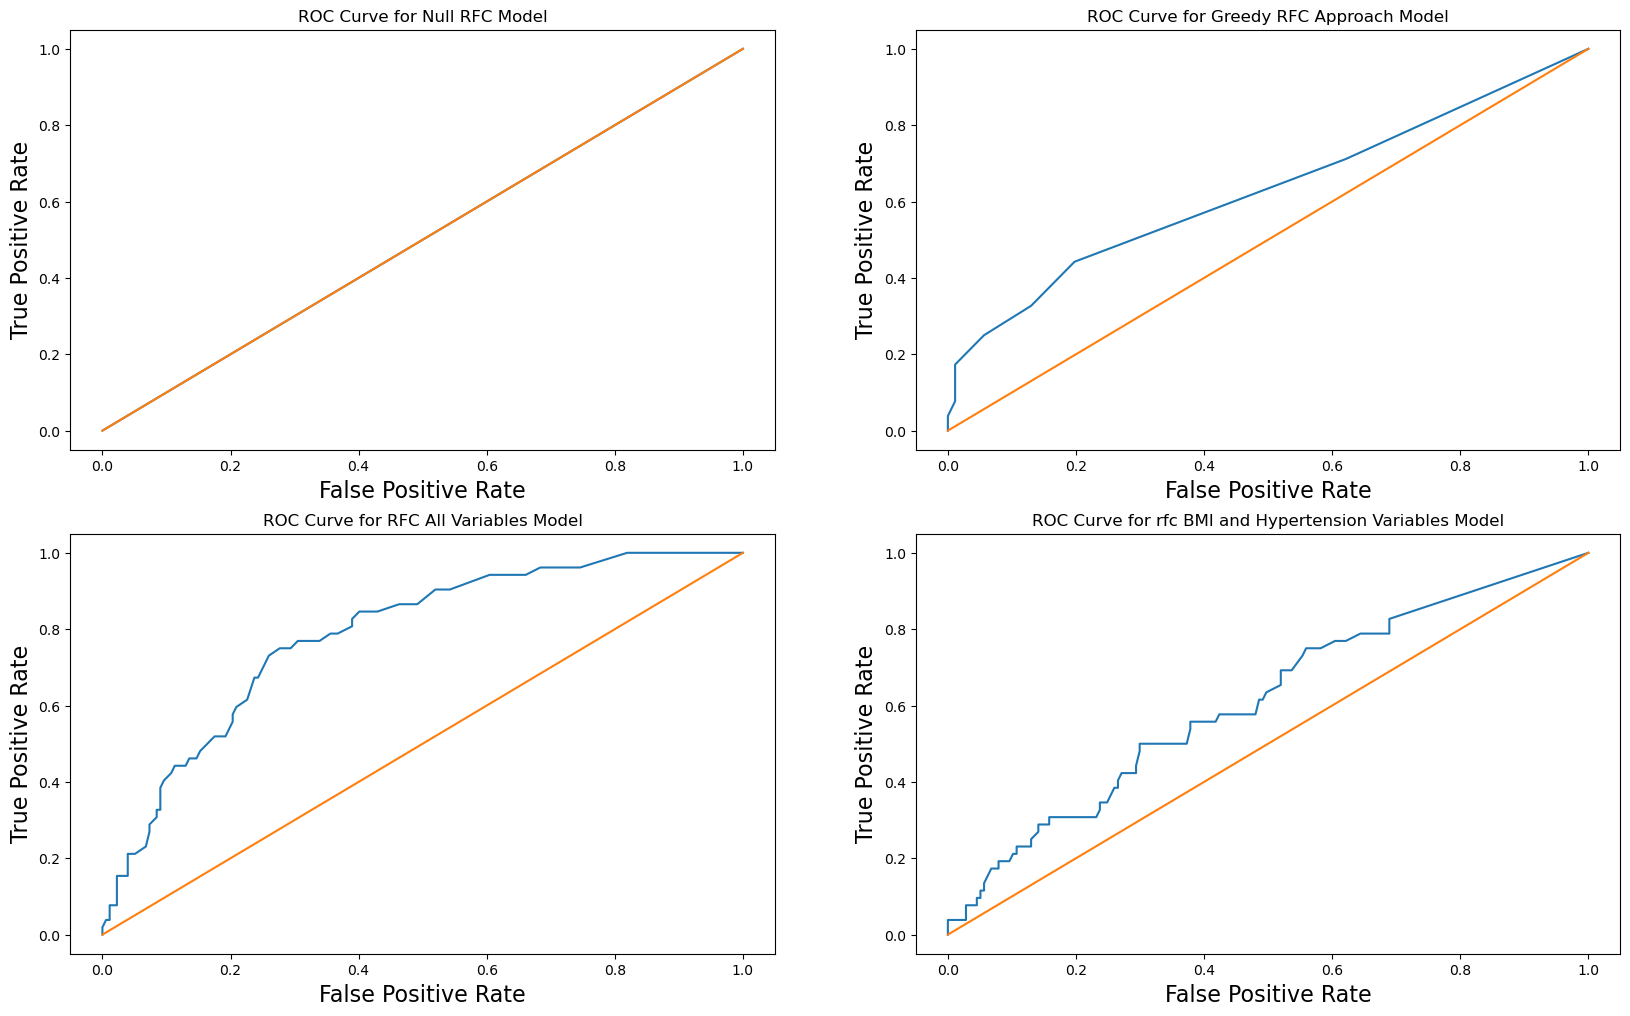

In [43]:
rfc_fig, rfc_ax = plt.subplots(2,2, figsize=[20, 12])

zeros_train = np.zeros(X_train.shape)
zeros_test = np.zeros(X_test.shape)

null_rfc = RFClassifier()
null_rfc.fit(zeros_train, y_train)

pred_null_rfc_labels = null_rfc.predict(zeros_test)
pred_null_rfc_prob = null_rfc.predict_proba(zeros_test)

null_rfc_accuracy = accuracy_score(y_test, pred_null_rfc_labels)

# turn multiclass problem into binary problem
pred_null_rfc_prob_1 = 1.0 - pred_null_rfc_prob[:, 0]
y_test_1 = [0 if y == 0 else 1 for y in y_test]

fpr, tpr, _ = roc_curve(y_test_1, pred_null_rfc_prob_1)

rfc_ax[0,0].plot(fpr, tpr)
rfc_ax[0,0].plot([0.0, 1.0], [0.0, 1.0])
rfc_ax[0,0].set_xlabel("False Positive Rate", fontsize=16)
rfc_ax[0,0].set_ylabel("True Positive Rate", fontsize=16)
rfc_ax[0,0].set_title('ROC Curve for Null RFC Model')
#plt.plot()

# RMSE
null_rfc_mse = mean_squared_error(y_test_1, pred_null_rfc_prob_1)
null_rfc_rmse = np.sqrt(null_rfc_mse)

#F2-Score, recall
null_rfc_f2 = f2(y_test_1, pred_null_rfc_labels, beta=2.0)
null_rfc_recall = recall_score(y_test_1, pred_null_rfc_labels)

if rfc_verbose:
    print("Accuracy:", null_rfc_accuracy)
    print("Null RFC Model MSE:", null_rfc_mse)
    print("Null RFC Model RMSE:", null_rfc_rmse)
    print("Null RFC Model F2 Score:", null_rfc_f2)
    print("Null RFC Model Recall Score:", null_rfc_recall)
    
#################

pred_null_rfc_labels = null_rfc.predict(zeros_test)
pred_prob = null_rfc.predict_proba(zeros_test)

null_rfc_accuracy = accuracy_score(y_test, pred_null_rfc_labels)
null_rfc_loss = log_loss(y_test, pred_prob)

#################

if rfc_verbose:
    print("Null RFC Model Accuracy:", null_accuracy)

column_accuracies_rfc = []

for col_name in df_train.columns:
    X_train, X_test = create_feature_matrices(df_train, df_test, [col_name], dummy_columns)
    
    simple_rfc = RFClassifier()
    simple_rfc.fit(X_train, y_train)
    pred_labels = simple_rfc.predict(X_test)
    pred_probs = simple_rfc.predict_proba(X_test)
    simple_accuracy = accuracy_score(y_test, pred_labels)
    simple_loss = log_loss(y_test, pred_probs)
    simple_f2 = f2(y_test, pred_labels, beta=2.0)
    simple_recall = recall_score(y_test, pred_labels)
    if rfc_verbose:
        print()
        print(col_name + " Accuracy:", simple_accuracy)
        print(col_name + " Loss:", simple_loss)
        print("F2 Score:", simple_f2)
        print("Recall Score:", simple_recall)
    column_accuracies_rfc.append((simple_accuracy, col_name))
    
column_accuracies_rfc.sort(key=lambda p: p[0], reverse=True)
sorted_columns_rfc = [col_name for _, col_name in column_accuracies]

if rfc_verbose:
    print()
    print("Sorted columns:" + str(sorted_columns_rfc))
    
################

base_rfc_model_columns = []
base_rfc_loss = null_rfc_loss
base_rfc_accuracy = null_rfc_accuracy
base_rfc_f2 = null_rfc_f2
base_rfc_recall = null_rfc_recall

if rfc_verbose:
    print("Base rfc Model Accuracy:", base_rfc_accuracy)
    print("Base rfc Model Loss:", base_rfc_loss)
    print("Base rfc Model F-beta Score:", base_rfc_f2)
    print("Base rfc Model Recall:", base_rfc_recall)
    print()

for col_name in sorted_columns_rfc:
    # track all column names
    trial_columns = base_rfc_model_columns[:]
    trial_columns.append(col_name)

    X_train, X_test = create_feature_matrices(df_train, df_test, trial_columns, dummy_columns)
    
    trial_rfc = RFClassifier()
    trial_rfc.fit(X_train, y_train)
    pred_labels = trial_rfc.predict(X_test)
    pred_prob = trial_rfc.predict_proba(X_test)
    trial_accuracy = accuracy_score(y_test, pred_labels)
    trial_loss = log_loss(y_test, pred_prob)
    trial_f2 = f2(y_test, pred_labels, beta=2.0)
    trial_recall = recall_score(y_test, pred_labels)
    if rfc_verbose:
        print()
        print(str(trial_columns) + " Model Accuracy:", trial_accuracy)
        print(str(trial_columns) + " Model Loss:", trial_loss)
        print(str(trial_columns) + " Model F2:", trial_f2)
        print(str(trial_columns) + " Model Recall:", trial_recall)
    

    if trial_accuracy > base_rfc_accuracy:
        if rfc_verbose:
            print("Updating base model with column \'" + str(col_name) + "\'")
        base_rfc_loss = trial_loss
        base_rfc_model_columns = trial_columns
        base_rfc_accuracy = trial_accuracy
        base_rfc_f2 = trial_f2
        base_rfc_recall = trial_recall
    if rfc_verbose:
        print()
        print("Base Model Accuracy:", base_rfc_accuracy)
        print("Base Model Loss:", base_rfc_loss)
        print("Base Model F2 Score:", base_rfc_f2)
        print("Base Model Recall:", base_rfc_recall)
        print()
    
print("Our chosen columns are: " + str(base_rfc_model_columns))


#################

greedy_rfc_X_train, greedy_rfc_X_test = create_feature_matrices(df_train, df_test, base_rfc_model_columns, dummy_columns)
    
greedy_rfc = RFClassifier()
greedy_rfc.fit(greedy_rfc_X_train, y_train)

#################

pred_greedy_rfc_labels = greedy_rfc.predict(greedy_rfc_X_test)
pred_greedy_rfc_prob = greedy_rfc.predict_proba(greedy_rfc_X_test)

greedy_rfc_accuracy = accuracy_score(y_test, pred_greedy_rfc_labels)

################

# turn multiclass problem into binary problem
pred_greedy_rfc_prob_1 = 1.0 - pred_greedy_rfc_prob[:, 0]
y_test_1 = [0 if y == 0 else 1 for y in y_test]

fpr, tpr, _ = roc_curve(y_test_1, pred_greedy_rfc_prob_1)

rfc_ax[0,1].plot(fpr, tpr)
rfc_ax[0,1].plot([0.0, 1.0], [0.0, 1.0])
rfc_ax[0,1].set_xlabel("False Positive Rate", fontsize=16)
rfc_ax[0,1].set_ylabel("True Positive Rate", fontsize=16)
rfc_ax[0,1].set_title('ROC Curve for Greedy RFC Approach Model')
#plt.plot()

# RMSE
greedy_rfc_mse = mean_squared_error(y_test_1, pred_greedy_rfc_prob_1)
greedy_rfc_rmse = np.sqrt(greedy_rfc_mse)

# F2, recall
greedy_rfc_f2 = f2(y_test_1, pred_greedy_rfc_labels, beta=2.0)
greedy_rfc_recall = recall_score(y_test_1, pred_greedy_rfc_labels)

if rfc_verbose:
    print("Accuracy:", greedy_rfc_accuracy)
    print("Greedy RFC Approach Model MSE:", greedy_rfc_mse)
    print("Greedy RFC Approach RMSE:", greedy_rfc_rmse)
    print("Greedy RFC Model F2 Score:", greedy_rfc_f2)
    print("Greedy RFC Model Recall Score:", greedy_rfc_recall)
    
###############

all_rfc_X_train, all_rfc_X_test = create_feature_matrices(df_train, df_test, df_train.columns, dummy_columns)
    
all_rfc = RFClassifier()
all_rfc.fit(all_rfc_X_train, y_train)

###############

pred_all_rfc_labels = all_rfc.predict(all_rfc_X_test)
pred_all_rfc_prob = all_rfc.predict_proba(all_rfc_X_test)

all_rfc_accuracy = accuracy_score(y_test, pred_all_rfc_labels)

# turn multiclass problem into binary problem
pred_all_rfc_prob_1 = 1.0 - pred_all_rfc_prob[:, 0]
y_test_1 = [0 if y == 0 else 1 for y in y_test]

fpr, tpr, _ = roc_curve(y_test_1, pred_all_rfc_prob_1)

rfc_ax[1,0].plot(fpr, tpr)
rfc_ax[1,0].plot([0.0, 1.0], [0.0, 1.0])
rfc_ax[1,0].set_xlabel("False Positive Rate", fontsize=16)
rfc_ax[1,0].set_ylabel("True Positive Rate", fontsize=16)
rfc_ax[1,0].set_title('ROC Curve for RFC All Variables Model')
#plt.plot()

# RMSE
all_rfc_mse = mean_squared_error(y_test_1, pred_all_rfc_prob_1)
all_rfc_rmse = np.sqrt(all_rfc_mse)

# F2, recall
all_rfc_f2 = f2(y_test_1, pred_all_rfc_labels, beta=2.0)
all_rfc_recall = recall_score(y_test_1, pred_all_rfc_labels)

if rfc_verbose:
    print("Accuracy:", all_rfc_accuracy)
    print("RFC All Variables Model MSE:", all_rfc_mse)
    print("RFC All Variables Model RMSE:", all_rfc_rmse)
    print("RFC All Variables Model F2 Score:", all_rfc_f2)
    print("RFC All Variables Model Recall Score:", all_rfc_recall)
    
#########
    
bmi_hyp_rfc_X_train, bmi_hyp_rfc_X_test = create_feature_matrices(df_train, df_test, df_train[['bmi', 'hypertension']], dummy_columns)
  
    
bmi_hyp_rfc = RFClassifier()
bmi_hyp_rfc.fit(bmi_hyp_rfc_X_train, y_train)

pred_bmi_hyp_rfc_labels = bmi_hyp_rfc.predict(bmi_hyp_rfc_X_test)
pred_bmi_hyp_rfc_prob = bmi_hyp_rfc.predict_proba(bmi_hyp_rfc_X_test)

bmi_hyp_rfc_accuracy = accuracy_score(y_test, pred_bmi_hyp_rfc_labels)

# turn multiclass problem into binary problem
pred_bmi_hyp_rfc_prob_1 = 1.0 - pred_bmi_hyp_rfc_prob[:, 0]
y_test_1 = [0 if y == 0 else 1 for y in y_test]

fpr, tpr, _ = roc_curve(y_test_1, pred_bmi_hyp_rfc_prob_1)

rfc_ax[1,1].plot(fpr, tpr)
rfc_ax[1,1].plot([0.0, 1.0], [0.0, 1.0])
rfc_ax[1,1].set_xlabel("False Positive Rate", fontsize=16)
rfc_ax[1,1].set_ylabel("True Positive Rate", fontsize=16)
rfc_ax[1,1].set_title('ROC Curve for rfc BMI and Hypertension Variables Model')

# RMSE
bmi_hyp_rfc_mse = mean_squared_error(y_test_1, pred_bmi_hyp_rfc_prob_1)
bmi_hyp_rfc_rmse = np.sqrt(bmi_hyp_rfc_mse)

# F2, recall
bmi_hyp_rfc_f2 = f2(y_test_1, pred_bmi_hyp_rfc_labels, beta=2.0)
bmi_hyp_rfc_recall = recall_score(y_test_1, pred_bmi_hyp_rfc_labels)

if rfc_verbose:
    print("Accuracy:", bmi_hyp_rfc_accuracy)
    print("RFC BMI and Hypertension Variables Model MSE:", bmi_hyp_rfc_mse)
    print("RFC BMI and Hypertension Variables Model RMSE:", bmi_hyp_rfc_rmse)
    print("RFC BMI and Hypertension Variables Model F2 Score:", bmi_hyp_rfc_f2)
    print("RFC BMI and Hypertension Variables Model Recall Score:", bmi_hyp_rfc_recall)
    
plt.show()

## SVM method (undersampling)

In [44]:
svm_verbose = True

Accuracy: 0.7729257641921398
Null SVM Model MSE: 0.17551608913991112
Null SVM Model RMSE: 0.41894640366031444
Null SVM Model F2 Score: 0.0
Null SVM Model Recall Score: 0.0
Null SVM Model Accuracy: 0.7729257641921398

gender Accuracy: 0.7729257641921398
gender Loss: 0.5357298069478071
F2 Score: 0.0
Recall Score: 0.0

age Accuracy: 0.7816593886462883
age Loss: 0.4721108042294009
F2 Score: 0.4233870967741936
Recall Score: 0.40384615384615385

hypertension Accuracy: 0.7860262008733624
hypertension Loss: 0.5118150993423198
F2 Score: 0.28138528138528135
Recall Score: 0.25

heart_disease Accuracy: 0.7467248908296943
heart_disease Loss: 0.5461604958647385
F2 Score: 0.0900900900900901
Recall Score: 0.07692307692307693

ever_married Accuracy: 0.7729257641921398
ever_married Loss: 0.5357298069641574
F2 Score: 0.0
Recall Score: 0.0

work_type Accuracy: 0.7729257641921398
work_type Loss: 0.535729806957519
F2 Score: 0.0
Recall Score: 0.0

Residence_type Accuracy: 0.7729257641921398
Residence_type Lo


['hypertension', 'Residence_type', 'gender_Other'] Model Accuracy: 0.7947598253275109
['hypertension', 'Residence_type', 'gender_Other'] Model Loss: 0.5233258652287168
['hypertension', 'Residence_type', 'gender_Other'] Model F2: 0.16129032258064513
['hypertension', 'Residence_type', 'gender_Other'] Model Recall: 0.1346153846153846

Base Model Accuracy: 0.7947598253275109
Base Model Loss: 0.5172253824434475
Base Model F2 Score: 0.16129032258064513
Base Model Recall: 0.1346153846153846


['hypertension', 'Residence_type', 'hypertension_False'] Model Accuracy: 0.7947598253275109
['hypertension', 'Residence_type', 'hypertension_False'] Model Loss: 0.5120973755214723
['hypertension', 'Residence_type', 'hypertension_False'] Model F2: 0.16129032258064513
['hypertension', 'Residence_type', 'hypertension_False'] Model Recall: 0.1346153846153846

Base Model Accuracy: 0.7947598253275109
Base Model Loss: 0.5172253824434475
Base Model F2 Score: 0.16129032258064513
Base Model Recall: 0.134615384615

Accuracy: 0.7947598253275109
SVM BMI and Hypertension Variables Model MSE: 0.1624288816180789
SVM BMI and Hypertension Variables Model RMSE: 0.4030246662650797
SVM BMI and Hypertension Variables Model F2 Score: 0.18264840182648404
SVM BMI and Hypertension Variables Model Recall Score: 0.15384615384615385


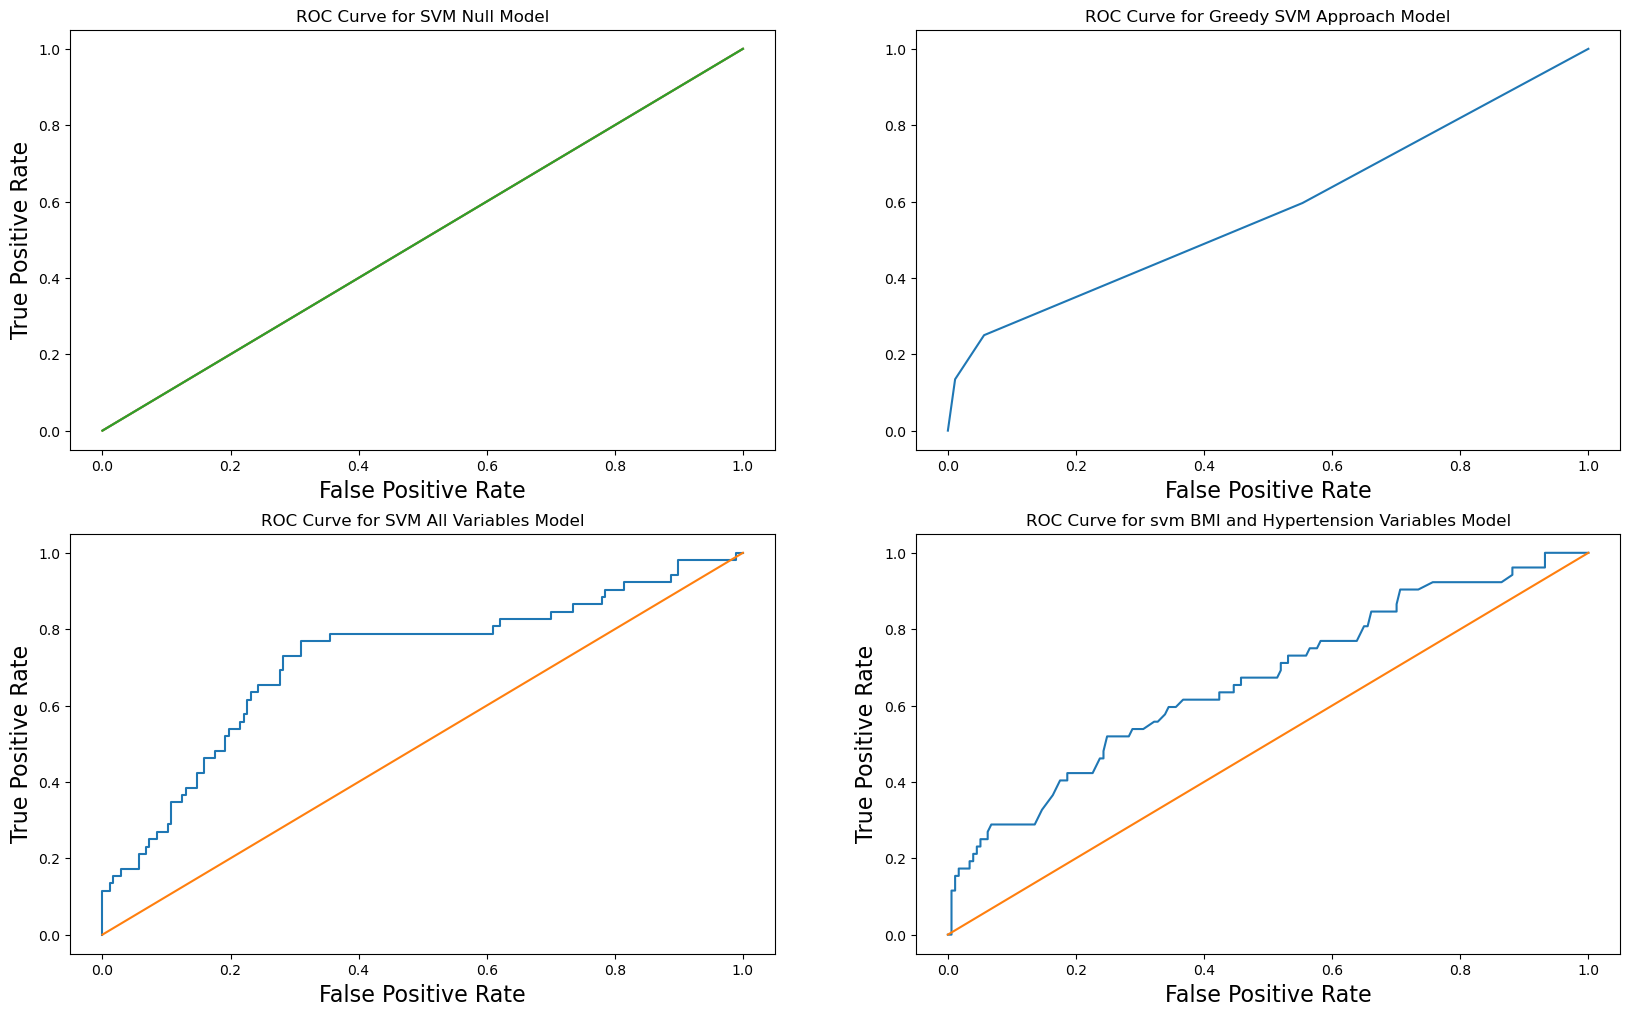

In [45]:
svm_fig, svm_ax = plt.subplots(2,2, figsize=[20, 12])

zeros_train = np.zeros(X_train.shape)
zeros_test = np.zeros(X_test.shape)

null_svm = SVMClassifier(probability=True)
null_svm.fit(zeros_train, y_train)

pred_null_svm_labels = null_svm.predict(zeros_test)
pred_null_svm_prob = null_svm.predict_proba(zeros_test)

null_svm_accuracy = accuracy_score(y_test, pred_null_svm_labels)

# turn multiclass problem into binary problem
pred_null_svm_prob_1 = 1.0 - pred_null_svm_prob[:, 0]
y_test_1 = [0 if y == 0 else 1 for y in y_test]

fpr, tpr, _ = roc_curve(y_test_1, pred_null_svm_prob_1)

svm_ax[0,0].plot(fpr, tpr)
svm_ax[0,0].plot([0.0, 1.0], [0.0, 1.0])
svm_ax[0,0].set_xlabel("False Positive Rate", fontsize=16)
svm_ax[0,0].set_ylabel("True Positive Rate", fontsize=16)
svm_ax[0,0].set_title('ROC Curve for SVM Null Model')
plt.plot()

# RMSE
null_svm_mse = mean_squared_error(y_test_1, pred_null_svm_prob_1)
null_svm_rmse = np.sqrt(null_svm_mse)

#F2-Score, recall
null_svm_f2 = f2(y_test_1, pred_null_svm_labels, beta=2.0)
null_svm_recall = recall_score(y_test_1, pred_null_svm_labels)

if svm_verbose:
    print("Accuracy:", null_svm_accuracy)
    print("Null SVM Model MSE:", null_svm_mse)
    print("Null SVM Model RMSE:", null_svm_rmse)
    print("Null SVM Model F2 Score:", null_svm_f2)
    print("Null SVM Model Recall Score:", null_svm_recall)
    
###################

pred_null_svm_labels = null_svm.predict(zeros_test)
pred_prob = null_svm.predict_proba(zeros_test)

null_svm_accuracy = accuracy_score(y_test, pred_null_svm_labels)
null_svm_loss = log_loss(y_test, pred_prob)

###################

if svm_verbose:
    print("Null SVM Model Accuracy:", null_accuracy)

column_accuracies_svm = []

for col_name in df_train.columns:
    X_train, X_test = create_feature_matrices(df_train, df_test, [col_name], dummy_columns)
    
    simple_svm = SVMClassifier(probability=True)
    simple_svm.fit(X_train, y_train)
    pred_labels = simple_svm.predict(X_test)
    pred_probs = simple_svm.predict_proba(X_test)
    simple_accuracy = accuracy_score(y_test, pred_labels)
    simple_loss = log_loss(y_test, pred_probs)
    simple_f2 = f2(y_test, pred_labels, beta=2.0)
    simple_recall = recall_score(y_test, pred_labels)
    if svm_verbose:
        print()
        print(col_name + " Accuracy:", simple_accuracy)
        print(col_name + " Loss:", simple_loss)
        print("F2 Score:", simple_f2)
        print("Recall Score:", simple_recall)
    column_accuracies_svm.append((simple_accuracy, col_name))
    
column_accuracies_svm.sort(key=lambda p: p[0], reverse=True)
sorted_columns_svm = [col_name for _, col_name in column_accuracies]

if svm_verbose:
    print()
    print("Sorted columns:" + str(sorted_columns_svm))
    
###################

base_svm_model_columns = []
base_svm_loss = null_svm_loss
base_svm_accuracy = null_svm_accuracy
base_svm_f2 = null_svm_f2
base_svm_recall = null_svm_recall

if svm_verbose:
    print("Base SVM Model Accuracy:", base_svm_accuracy)
    print("Base SVM Model Loss:", base_svm_loss)
    print("Base SVM Model F-beta Score:", base_svm_f2)
    print("Base SVM Model Recall:", base_svm_recall)
    print()

for col_name in sorted_columns_svm:
    # track all column names
    trial_columns = base_svm_model_columns[:]
    trial_columns.append(col_name)

    X_train, X_test = create_feature_matrices(df_train, df_test, trial_columns, dummy_columns)
    
    trial_svm = SVMClassifier(probability=True)
    trial_svm.fit(X_train, y_train)
    pred_labels = trial_svm.predict(X_test)
    pred_prob = trial_svm.predict_proba(X_test)
    trial_accuracy = accuracy_score(y_test, pred_labels)
    trial_loss = log_loss(y_test, pred_prob)
    trial_f2 = f2(y_test, pred_labels, beta=2.0)
    trial_recall = recall_score(y_test, pred_labels)
    if svm_verbose:
        print()
        print(str(trial_columns) + " Model Accuracy:", trial_accuracy)
        print(str(trial_columns) + " Model Loss:", trial_loss)
        print(str(trial_columns) + " Model F2:", trial_f2)
        print(str(trial_columns) + " Model Recall:", trial_recall)
    

    if trial_accuracy > base_svm_accuracy:
        if svm_verbose:
            print("Updating base model with column \'" + str(col_name) + "\'")
        base_svm_loss = trial_loss
        base_svm_model_columns = trial_columns
        base_svm_accuracy = trial_accuracy
        base_svm_f2 = trial_f2
        base_svm_recall = trial_recall
    if svm_verbose:
        print()
        print("Base Model Accuracy:", base_svm_accuracy)
        print("Base Model Loss:", base_svm_loss)
        print("Base Model F2 Score:", base_svm_f2)
        print("Base Model Recall:", base_svm_recall)
        print()
    
print("Our chosen columns are: " + str(base_svm_model_columns))

###############

greedy_svm_X_train, greedy_svm_X_test = create_feature_matrices(df_train, df_test, base_svm_model_columns, dummy_columns)
    
greedy_svm = SVMClassifier(probability=True)
greedy_svm.fit(greedy_svm_X_train, y_train)

###############

pred_greedy_svm_labels = greedy_svm.predict(greedy_svm_X_test)
pred_greedy_svm_prob = greedy_svm.predict_proba(greedy_svm_X_test)

greedy_svm_accuracy = accuracy_score(y_test, pred_greedy_svm_labels)

# turn multiclass problem into binary problem
pred_greedy_svm_prob_1 = 1.0 - pred_greedy_svm_prob[:, 0]
y_test_1 = [0 if y == 0 else 1 for y in y_test]

fpr, tpr, _ = roc_curve(y_test_1, pred_greedy_svm_prob_1)

svm_ax[0,1].plot(fpr, tpr)
svm_ax[0,0].plot([0.0, 1.0], [0.0, 1.0])
svm_ax[0,1].set_xlabel("False Positive Rate", fontsize=16)
svm_ax[0,0].set_ylabel("True Positive Rate", fontsize=16)
svm_ax[0,1].set_title('ROC Curve for Greedy SVM Approach Model')
#plt.plot()

# RMSE
greedy_svm_mse = mean_squared_error(y_test_1, pred_greedy_svm_prob_1)
greedy_svm_rmse = np.sqrt(greedy_svm_mse)

# F2, recall 
greedy_svm_f2 = f2(y_test_1, pred_greedy_svm_labels, beta=2.0)
greedy_svm_recall = recall_score(y_test_1, pred_greedy_svm_labels)

if svm_verbose:
    print("Accuracy:", greedy_svm_accuracy)
    print("Greedy SVM Approach Model MSE:", greedy_svm_mse)
    print("Greedy SVM Approach RMSE:", greedy_svm_rmse)
    print("Greedy SVM Model F2 Score:", greedy_svm_f2)
    print("Greedy SVM Model Recall Score:", greedy_svm_recall)
    
##################

all_svm_X_train, all_svm_X_test = create_feature_matrices(df_train, df_test, df_train.columns, dummy_columns)
    
all_svm = SVMClassifier(probability=True)
all_svm.fit(all_svm_X_train, y_train)

##############

pred_all_svm_labels = all_svm.predict(all_svm_X_test)
pred_all_svm_prob = all_svm.predict_proba(all_svm_X_test)

all_svm_accuracy = accuracy_score(y_test, pred_all_svm_labels)

# turn multiclass problem into binary problem
pred_all_svm_prob_1 = 1.0 - pred_all_svm_prob[:, 0]
y_test_1 = [0 if y == 0 else 1 for y in y_test]

fpr, tpr, _ = roc_curve(y_test_1, pred_all_svm_prob_1)

svm_ax[1,0].plot(fpr, tpr)
svm_ax[1,0].plot([0.0, 1.0], [0.0, 1.0])
svm_ax[1,0].set_xlabel("False Positive Rate", fontsize=16)
svm_ax[1,0].set_ylabel("True Positive Rate", fontsize=16)
svm_ax[1,0].set_title('ROC Curve for SVM All Variables Model')
#plt.plot()

# RMSE
all_svm_mse = mean_squared_error(y_test_1, pred_all_svm_prob_1)
all_svm_rmse = np.sqrt(all_svm_mse)

# F2, recall
all_svm_f2 = f2(y_test_1, pred_all_svm_labels, beta=2.0)
all_svm_recall = recall_score(y_test_1, pred_all_svm_labels)

if svm_verbose:
    print("Accuracy:", all_svm_accuracy)
    print("All Variables SVM Model MSE:", all_svm_mse)
    print("All Variables SVM Model RMSE:", all_svm_rmse)
    print("All Variables SVM Model F2 Score:", all_svm_f2)
    print("All Variables SVM Model Recall Score:", all_svm_recall)
    
#########
    
bmi_hyp_svm_X_train, bmi_hyp_svm_X_test = create_feature_matrices(df_train, df_test, df_train[['bmi', 'hypertension']], dummy_columns)
  
    
bmi_hyp_svm = SVMClassifier(probability=True)
bmi_hyp_svm.fit(bmi_hyp_svm_X_train, y_train)

pred_bmi_hyp_svm_labels = bmi_hyp_svm.predict(bmi_hyp_svm_X_test)
pred_bmi_hyp_svm_prob = bmi_hyp_svm.predict_proba(bmi_hyp_svm_X_test)

bmi_hyp_svm_accuracy = accuracy_score(y_test, pred_bmi_hyp_svm_labels)

# turn multiclass problem into binary problem
pred_bmi_hyp_svm_prob_1 = 1.0 - pred_bmi_hyp_svm_prob[:, 0]
y_test_1 = [0 if y == 0 else 1 for y in y_test]

fpr, tpr, _ = roc_curve(y_test_1, pred_bmi_hyp_svm_prob_1)

svm_ax[1,1].plot(fpr, tpr)
svm_ax[1,1].plot([0.0, 1.0], [0.0, 1.0])
svm_ax[1,1].set_xlabel("False Positive Rate", fontsize=16)
svm_ax[1,1].set_ylabel("True Positive Rate", fontsize=16)
svm_ax[1,1].set_title('ROC Curve for svm BMI and Hypertension Variables Model')

# RMSE
bmi_hyp_svm_mse = mean_squared_error(y_test_1, pred_bmi_hyp_svm_prob_1)
bmi_hyp_svm_rmse = np.sqrt(bmi_hyp_svm_mse)

# F2, recall
bmi_hyp_svm_f2 = f2(y_test_1, pred_bmi_hyp_svm_labels, beta=2.0)
bmi_hyp_svm_recall = recall_score(y_test_1, pred_bmi_hyp_svm_labels)

if svm_verbose:
    print("Accuracy:", bmi_hyp_svm_accuracy)
    print("SVM BMI and Hypertension Variables Model MSE:", bmi_hyp_svm_mse)
    print("SVM BMI and Hypertension Variables Model RMSE:", bmi_hyp_svm_rmse)
    print("SVM BMI and Hypertension Variables Model F2 Score:", bmi_hyp_svm_f2)
    print("SVM BMI and Hypertension Variables Model Recall Score:", bmi_hyp_svm_recall)

plt.show()

In [46]:
styles = [dict(selector="caption",
                       props=[("text-align", "center"),
                              ("font-size", "150%"),
                              ("color", 'black')])]

def highest(scores, types):
    temp = np.array(scores)
    idx = np.argmax(temp)
    return (types[idx], scores[idx])
    
def lowest(scores, types):
    temp = np.array(scores)
    idx = np.argmin(temp)
    return (types[idx], scores[idx])

In [47]:
individual_columns = ["Null", "Greedy", "All", "BMI-Hyp", "Best"]


lr_stats_dict = {
    "Accuracy": [null_accuracy, greedy_accuracy, all_accuracy, bmi_hyp_accuracy, highest([null_accuracy, greedy_accuracy, all_accuracy, bmi_hyp_accuracy], individual_columns)[0]],
    "MSE": [null_mse, greedy_mse, all_mse, bmi_hyp_mse, lowest([null_mse, greedy_mse, all_mse, bmi_hyp_mse], individual_columns)[0]],
    "RMSE": [null_rmse, greedy_rmse, all_rmse, bmi_hyp_rmse, lowest([null_rmse, greedy_rmse, all_rmse, bmi_hyp_rmse], individual_columns)[0]],
    "F2-Score": [null_f2, greedy_f2, all_f2, bmi_hyp_f2, highest([null_f2, greedy_f2, all_f2, bmi_hyp_f2], individual_columns)[0]],
    "Recall": [null_recall, greedy_recall, all_recall, bmi_hyp_recall, highest([null_recall, greedy_recall, all_recall, bmi_hyp_recall], individual_columns)[0]]
}
lr_stats_df = pd.DataFrame.from_dict(lr_stats_dict, orient="index", columns=individual_columns)

knn_stats_dict = {
    "Accuracy": [null_knn_accuracy, greedy_knn_accuracy, all_knn_accuracy, bmi_hyp_knn_accuracy, highest([null_knn_accuracy, greedy_knn_accuracy, all_knn_accuracy, bmi_hyp_knn_accuracy], individual_columns)[0]],
    "MSE": [null_knn_mse, greedy_knn_mse, all_knn_mse, bmi_hyp_knn_mse, lowest([null_knn_mse, greedy_knn_mse, all_knn_mse, bmi_hyp_knn_mse], individual_columns)[0]],
    "RMSE": [null_knn_rmse, greedy_knn_rmse, all_knn_rmse, bmi_hyp_knn_rmse, lowest([null_knn_rmse, greedy_knn_rmse, all_knn_rmse, bmi_hyp_knn_rmse], individual_columns)[0]],
    "F2-Score": [null_knn_f2, greedy_knn_f2, all_knn_f2, bmi_hyp_knn_f2, highest([null_knn_f2, greedy_knn_f2, all_knn_f2, bmi_hyp_knn_f2], individual_columns)[0]],
    "Recall": [null_knn_recall, greedy_knn_recall, all_knn_recall, bmi_hyp_knn_recall, highest([null_knn_recall, greedy_knn_recall, all_knn_recall, bmi_hyp_knn_recall], individual_columns)[0]]
}
knn_stats_df = pd.DataFrame.from_dict(knn_stats_dict, orient="index", columns=individual_columns)

rfc_stats_dict = {
    "Accuracy": [null_rfc_accuracy, greedy_rfc_accuracy, all_rfc_accuracy, bmi_hyp_rfc_accuracy, highest([null_rfc_accuracy, greedy_rfc_accuracy, all_rfc_accuracy, bmi_hyp_rfc_accuracy], individual_columns)[0]],
    "MSE": [null_rfc_mse, greedy_rfc_mse, all_rfc_mse, bmi_hyp_rfc_mse, lowest([null_rfc_mse, greedy_rfc_mse, all_rfc_mse, bmi_hyp_rfc_mse], individual_columns)[0]],
    "RMSE": [null_rfc_rmse, greedy_rfc_rmse, all_rfc_rmse, bmi_hyp_rfc_rmse, lowest([null_rfc_rmse, greedy_rfc_rmse, all_rfc_rmse, bmi_hyp_rfc_rmse], individual_columns)[0]],
    "F2-Score": [null_rfc_f2, greedy_rfc_f2, all_rfc_f2, bmi_hyp_rfc_f2, highest([null_rfc_f2, greedy_rfc_f2, all_rfc_f2, bmi_hyp_rfc_f2], individual_columns)[0]],
    "Recall": [null_rfc_recall, greedy_rfc_recall, all_rfc_recall, bmi_hyp_rfc_recall, highest([null_rfc_recall, greedy_rfc_recall, all_rfc_recall, bmi_hyp_rfc_recall], individual_columns)[0]]
}
rfc_stats_df = pd.DataFrame.from_dict(rfc_stats_dict, orient="index", columns=individual_columns)

svm_stats_dict = {
    "Accuracy": [null_svm_accuracy, greedy_svm_accuracy, all_svm_accuracy, bmi_hyp_svm_accuracy, highest([null_svm_accuracy, greedy_svm_accuracy, all_svm_accuracy, bmi_hyp_svm_accuracy], individual_columns)[0]],
    "MSE": [null_svm_mse, greedy_svm_mse, all_svm_mse, bmi_hyp_svm_mse, lowest([null_svm_mse, greedy_svm_mse, all_svm_mse, bmi_hyp_svm_mse], individual_columns)[0]],
    "RMSE": [null_svm_rmse, greedy_svm_rmse, all_svm_rmse, bmi_hyp_svm_rmse, lowest([null_svm_rmse, greedy_svm_rmse, all_svm_rmse, bmi_hyp_svm_rmse], individual_columns)[0]],
    "F2-Score": [null_svm_f2, greedy_svm_f2, all_svm_f2, bmi_hyp_svm_f2, highest([null_svm_f2, greedy_svm_f2, all_svm_f2, bmi_hyp_svm_f2], individual_columns)[0]],
    "Recall": [null_svm_recall, greedy_svm_recall, all_svm_recall, bmi_hyp_svm_recall, highest([null_svm_recall, greedy_svm_recall, all_svm_recall, bmi_hyp_svm_recall], individual_columns)[0]]
}
svm_stats_df = pd.DataFrame.from_dict(svm_stats_dict, orient="index", columns=individual_columns)


lr_best_acc = highest([null_accuracy, greedy_accuracy, all_accuracy, bmi_hyp_accuracy], individual_columns)
lr_best_mse = lowest([null_mse, greedy_mse, all_mse, bmi_hyp_mse], individual_columns)
lr_best_rmse = lowest([null_rmse, greedy_rmse, all_rmse, bmi_hyp_rmse], individual_columns)
lr_best_f2 = highest([null_f2, greedy_f2, all_f2, bmi_hyp_f2], individual_columns)
lr_best_rec = highest([null_recall, greedy_recall, all_recall, bmi_hyp_recall], individual_columns)
                     
knn_best_acc = highest([null_knn_accuracy, greedy_knn_accuracy, all_knn_accuracy, bmi_hyp_knn_accuracy], individual_columns)
knn_best_mse = lowest([null_knn_mse, greedy_knn_mse, all_knn_mse, bmi_hyp_knn_mse], individual_columns)
knn_best_rmse = lowest([null_knn_rmse, greedy_knn_rmse, all_knn_rmse, bmi_hyp_knn_rmse], individual_columns)
knn_best_f2 = highest([null_knn_f2, greedy_knn_f2, all_knn_f2, bmi_hyp_knn_f2], individual_columns)
knn_best_rec = highest([null_knn_recall, greedy_knn_recall, all_knn_recall, bmi_hyp_knn_recall], individual_columns)

rfc_best_acc = highest([null_rfc_accuracy, greedy_rfc_accuracy, all_rfc_accuracy, bmi_hyp_rfc_accuracy], individual_columns)
rfc_best_mse = lowest([null_svm_mse, greedy_svm_mse, all_svm_mse, bmi_hyp_rfc_mse], individual_columns)
rfc_best_rmse = lowest([null_rfc_rmse, greedy_rfc_rmse, all_rfc_rmse, bmi_hyp_rfc_rmse], individual_columns)
rfc_best_f2 = highest([null_rfc_f2, greedy_rfc_f2, all_rfc_f2, bmi_hyp_rfc_f2], individual_columns)
rfc_best_rec = highest([null_rfc_recall, greedy_rfc_recall, all_rfc_recall, bmi_hyp_rfc_recall], individual_columns)

svm_best_acc = highest([null_svm_accuracy, greedy_svm_accuracy, all_svm_accuracy, bmi_hyp_svm_accuracy], individual_columns)
svm_best_mse = lowest([null_svm_mse, greedy_svm_mse, all_svm_mse, bmi_hyp_svm_mse], individual_columns)
svm_best_rmse = lowest([null_svm_rmse, greedy_svm_rmse, all_svm_rmse, bmi_hyp_svm_rmse], individual_columns)
svm_best_f2 = highest([null_svm_f2, greedy_svm_f2, all_svm_f2, bmi_hyp_svm_f2], individual_columns)
svm_best_rec = highest([null_svm_recall, greedy_svm_recall, all_svm_recall, bmi_hyp_svm_recall], individual_columns)


comparison_cols = ["Best Approach (Acc)", "Best Accuracy", "Best Approach (MSE)", "Best MSE", "Best Approach (RMSE)", "Best RMSE", "Best Approach (F2)", "Best F2", "Best Approach (Rec)", "Best Recall"]

comparison_stats_dict ={
    "Linear Regression": [lr_best_acc[0], lr_best_acc[1], lr_best_mse[0], lr_best_mse[1], lr_best_rmse[0], lr_best_rmse[1], lr_best_f2[0], lr_best_f2[1], lr_best_rec[0], lr_best_rec[1]],
    "KNN": [knn_best_acc[0], knn_best_acc[1], knn_best_mse[0], knn_best_mse[1], knn_best_rmse[0], knn_best_rmse[1], knn_best_f2[0], knn_best_f2[1], knn_best_rec[0], knn_best_rec[1]],
    "Random Forests": [rfc_best_acc[0], rfc_best_acc[1], rfc_best_mse[0], rfc_best_mse[1], rfc_best_rmse[0], rfc_best_rmse[1], rfc_best_f2[0], rfc_best_f2[1], rfc_best_rec[0], rfc_best_rec[1]],
    "SVMs": [svm_best_acc[0], svm_best_acc[1], svm_best_mse[0], svm_best_mse[1], svm_best_rmse[0], svm_best_rmse[1], svm_best_f2[0], svm_best_f2[1], svm_best_rec[0], svm_best_rec[1]]
}
comparison_stats_df = pd.DataFrame.from_dict(comparison_stats_dict, orient="index", columns=comparison_cols)

In [48]:
lr_stats_df.style.set_caption("Linear Regression Scores").set_table_styles(styles)

,Null,Greedy,All,BMI-Hyp,Best
Accuracy,0.772926,0.772926,0.720524,0.772926,Null
MSE,0.175864,0.162533,0.203951,0.174409,Greedy
RMSE,0.419362,0.403154,0.451609,0.417623,Greedy
F2-Score,0.000000,0.000000,0.521583,0.114679,All
Recall,0.000000,0.000000,0.557692,0.096154,All


In [49]:
knn_stats_df.style.set_caption("KNN Scores").set_table_styles(styles)

,Null,Greedy,All,BMI-Hyp,Best
Accuracy,0.772926,0.803493,0.768559,0.742358,Greedy
MSE,0.227074,0.168035,0.178341,0.187773,Greedy
RMSE,0.476523,0.409921,0.422304,0.433328,Greedy
F2-Score,0.000000,0.205479,0.177778,0.212766,BMI-Hyp
Recall,0.000000,0.173077,0.153846,0.192308,BMI-Hyp


In [50]:
rfc_stats_df.style.set_caption("Random Forests Scores").set_table_styles(styles)

,Null,Greedy,All,BMI-Hyp,Best
Accuracy,0.772926,0.803493,0.781659,0.698690,Greedy
MSE,0.175512,0.159816,0.146781,0.217100,All
RMSE,0.418942,0.399770,0.383120,0.465940,All
F2-Score,0.000000,0.205479,0.317797,0.311284,All
Recall,0.000000,0.173077,0.288462,0.307692,BMI-Hyp


In [51]:
svm_stats_df.style.set_caption("SVMs Scores").set_table_styles(styles)

,Null,Greedy,All,BMI-Hyp,Best
Accuracy,0.772926,0.794760,0.768559,0.794760,Greedy
MSE,0.175516,0.168009,0.158142,0.162429,All
RMSE,0.418946,0.409889,0.397670,0.403025,All
F2-Score,0.000000,0.161290,0.198238,0.182648,All
Recall,0.000000,0.134615,0.173077,0.153846,All


In [52]:
comparison_stats_df.style.set_caption("Scores Comparison").set_table_styles(styles)

,Best Approach (Acc),Best Accuracy,Best Approach (MSE),Best MSE,Best Approach (RMSE),Best RMSE,Best Approach (F2),Best F2,Best Approach (Rec),Best Recall
Linear Regression,Null,0.772926,Greedy,0.162533,Greedy,0.403154,All,0.521583,All,0.557692
KNN,Greedy,0.803493,Greedy,0.168035,Greedy,0.409921,BMI-Hyp,0.212766,BMI-Hyp,0.192308
Random Forests,Greedy,0.803493,All,0.158142,All,0.383120,All,0.317797,BMI-Hyp,0.307692
SVMs,Greedy,0.794760,All,0.158142,All,0.397670,All,0.198238,All,0.173077


## Oversampling method
We will now use the oversampling method which entails creating fake data of patients who have a stroke.

The next cells saves a copy of the original dataframe and does some testing with removing a fraction amount of rows of patients that did not have a stroke. This is one way that we will approach creating models due to the imbalanced dataset based on strokes.

In [53]:
df_2 = df.copy()
print(df_2.head())

   index     id  gender   age hypertension heart_disease ever_married  \
0      0   9046    Male  67.0        False          True         True   
1      2  31112    Male  80.0        False          True         True   
2      3  60182  Female  49.0        False         False         True   
3      4   1665  Female  79.0         True         False         True   
4      5  56669    Male  81.0        False         False         True   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1        Private          Rural             105.92  32.5     never smoked   
2        Private          Urban             171.23  34.4           smokes   
3  Self-employed          Rural             174.12  24.0     never smoked   
4        Private          Urban             186.21  29.0  formerly smoked   

  stroke  
0   True  
1   True  
2   True  
3   True  
4   True  


In [54]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter


X = df_2.drop(columns=['stroke', 'id', 'index'])

gender_map = {'Male': 0, 'Female': 1}
X['hypertension'] = X['hypertension'].astype(int)
X['heart_disease'] = X['heart_disease'].astype(int)
X['ever_married'] = X['ever_married'].astype(int)
# hypertension_map = {'False': 0, 'True': 1}
# heart_disease_map = {'False': 0, 'True': 1}
# ever_married_map = {'False': 0, 'True': 1}
work_type_map = {'Govt_job': 0, 'Never_worked': 1, 'Private': 2, 'Self-employed': 3, 'children': 4}
residence_type_map = {'Rural': 0, 'Urban': 1}
smoking_status_map = {'Unknown': 0, 'formerly smoked': 1, 'never smoked': 2, 'smokes': 3}


cols_to_convert = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'] # Replace with the actual names of the string columns

X[cols_to_convert[0]] = X[cols_to_convert[0]].map(gender_map)
# X[cols_to_convert[1]] = X[cols_to_convert[1]].map(hypertension_map)
# X[cols_to_convert[2]] = X[cols_to_convert[2]].map(heart_disease_map)
# X[cols_to_convert[3]] = X[cols_to_convert[3]].map(ever_married_map)
X[cols_to_convert[4]] = X[cols_to_convert[4]].map(work_type_map)
X[cols_to_convert[5]] = X[cols_to_convert[5]].map(residence_type_map)
X[cols_to_convert[6]] = X[cols_to_convert[6]].map(smoking_status_map)

print(f"Training target statistics: {X.shape}")
y = df_2['stroke'].astype(int)
print(f"Training target statistics: {y.shape}")
over_sampler = RandomOverSampler(random_state=42)
X_res, y_res = over_sampler.fit_resample(X, y)
print(f"Training target statistics: {Counter(y_res)}")

print(f"Testing target statistics: {Counter(y)}")
X=X_res
y=y_res
print(f"Training target statistics: {X.shape}")


Training target statistics: (4909, 10)
Training target statistics: (4909,)
Training target statistics: Counter({1: 4700, 0: 4700})
Testing target statistics: Counter({0: 4700, 1: 209})
Training target statistics: (9400, 10)


In [55]:
print(X)
print(y)
y_df = pd.DataFrame({'stroke': y})
new_df = pd.concat([X,y_df], axis=1)
print(new_df.head())

      gender   age  hypertension  heart_disease  ever_married work_type  \
0        0.0  67.0             0              1             1         2   
1        0.0  80.0             0              1             1         2   
2        1.0  49.0             0              0             1         2   
3        1.0  79.0             1              0             1         3   
4        0.0  81.0             0              0             1         2   
...      ...   ...           ...            ...           ...       ...   
9395     1.0  55.0             1              1             1         2   
9396     1.0  51.0             1              0             1         2   
9397     0.0  80.0             0              0             1         2   
9398     1.0  68.0             1              0             0         3   
9399     1.0  45.0             0              0             1         2   

     Residence_type  avg_glucose_level   bmi smoking_status  
0                 1             228.6

In [56]:
print(new_df)
gender_map = {0: 'Male', 1: 'Female'}
new_df['hypertension'] = new_df['hypertension'].astype('category')
new_df['heart_disease'] = new_df['heart_disease'].astype('category')
new_df['ever_married'] = new_df['ever_married'].astype('category')
hypertension_map = {0: 'False', 1: 'True'}
heart_disease_map = {0: 'False', 1: 'True'}
ever_married_map = {0: 'False', 1: 'True'}
work_type_map = {0: 'Govt_job', 1: 'Never_worked', 2: 'Private', 3: 'Self-employed', 4: 'children'}
residence_type_map = {0: 'Rural', 1: 'Urban'}
smoking_status_map = {0: 'Unknown', 1: 'formerly smoked', 2: 'never smoked', 3: 'smokes'}


cols_to_convert = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'] # Replace with the actual names of the string columns

new_df[cols_to_convert[0]] = new_df[cols_to_convert[0]].map(gender_map)
new_df[cols_to_convert[1]] = new_df[cols_to_convert[1]].map(hypertension_map)
new_df[cols_to_convert[2]] = new_df[cols_to_convert[2]].map(heart_disease_map)
new_df[cols_to_convert[3]] = new_df[cols_to_convert[3]].map(ever_married_map)
new_df[cols_to_convert[4]] = new_df[cols_to_convert[4]].map(work_type_map)
new_df[cols_to_convert[5]] = new_df[cols_to_convert[5]].map(residence_type_map)
new_df[cols_to_convert[6]] = new_df[cols_to_convert[6]].map(smoking_status_map)
print(new_df)

      gender   age  hypertension  heart_disease  ever_married work_type  \
0        0.0  67.0             0              1             1         2   
1        0.0  80.0             0              1             1         2   
2        1.0  49.0             0              0             1         2   
3        1.0  79.0             1              0             1         3   
4        0.0  81.0             0              0             1         2   
...      ...   ...           ...            ...           ...       ...   
9395     1.0  55.0             1              1             1         2   
9396     1.0  51.0             1              0             1         2   
9397     0.0  80.0             0              0             1         2   
9398     1.0  68.0             1              0             0         3   
9399     1.0  45.0             0              0             1         2   

     Residence_type  avg_glucose_level   bmi smoking_status  stroke  
0                 1          

## Feature Extraction
Dummy variables will be created for each categorical variable

In [57]:
continuous_cols = ['age', 'avg_glucose_level', 'bmi']
categorical_cols = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
all_cols = continuous_cols + categorical_cols

dummy_columns = {}
for col_name in categorical_cols:
    dummies = pd.get_dummies(new_df[col_name], prefix=col_name)
    dummy_columns[col_name] = dummies.columns.values
    new_df = new_df.merge(dummies, left_index=True, right_index=True)

## Experiment Setup
The data will be split into training and testing. Also, the stroke column will be transfomred into a 0 or 1.

In [58]:
df_train, df_test = train_test_split(new_df, stratify=new_df["stroke"])

encoder = LabelEncoder()
y_train = encoder.fit_transform(df_train["stroke"].astype("str"))
y_test = encoder.transform(df_test["stroke"].astype("str"))

## Scaling the Data
The data for the features will now be scaled. We will also remove stroke from the training and testing sets.

In [59]:
df_train = df_train.drop(columns=['stroke'])
df_test = df_test.drop(columns=['stroke'])
X_train = df_train.values
X_test = df_test.values

## Simple Logisitc Regression

Null Model

Testing target statistics: Counter({1: 2350})
Testing target statistics: Counter({1: 1175, 0: 1175})
Accuracy: 0.5
Null Model MSE: 0.25084896199140777
Null Model RMSE: 0.5008482424761095


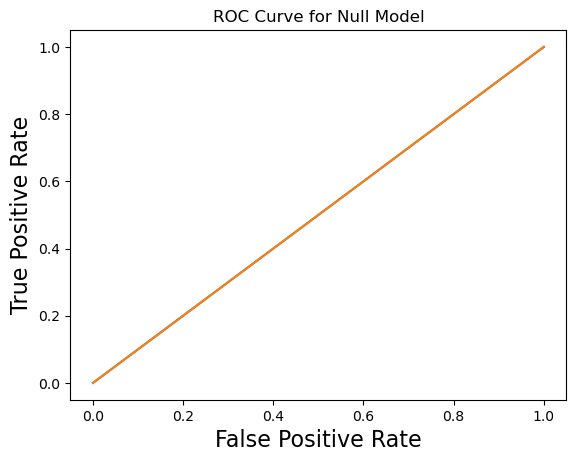

In [60]:
zeros_train = np.zeros(X_train.shape)
zeros_test = np.zeros(X_test.shape)

null_lr = SGDClassifier(max_iter=10000, loss="log")
null_lr.fit(zeros_train, y_train)

pred_null_labels = null_lr.predict(zeros_test)
pred_null_prob = null_lr.predict_proba(zeros_test)

print(f"Testing target statistics: {Counter(pred_null_labels)}")
print(f"Testing target statistics: {Counter(y_test)}")



null_accuracy = accuracy_score(y_test, pred_null_labels)

print("Accuracy:", null_accuracy)

# turn multiclass problem into binary problem
pred_null_prob_1 = 1.0 - pred_null_prob[:, 0]
y_test_1 = [0 if y == 0 else 1 for y in y_test]

fpr, tpr, _ = roc_curve(y_test_1, pred_null_prob_1)

plt.plot(fpr, tpr)
plt.plot([0.0, 1.0], [0.0, 1.0])
plt.xlabel("False Positive Rate", fontsize=16)
plt.ylabel("True Positive Rate", fontsize=16)
plt.title('ROC Curve for Null Model')
plt.plot()

# RMSE
null_mse = mean_squared_error(y_test_1, pred_null_prob_1)
null_rmse = np.sqrt(null_mse)
print("Null Model MSE:", null_mse)
print("Null Model RMSE:", null_rmse)

Greedy Approach

In [61]:
pred_null_labels = null_lr.predict(zeros_test)
pred_prob = null_lr.predict_proba(zeros_test)

null_accuracy = accuracy_score(y_test, pred_null_labels)
null_loss = log_loss(y_test, pred_prob)

In [62]:
print("Null Model Accuracy:", null_accuracy)

column_accuracies = []

for col_name in df_train.columns:
    print(col_name, df_train[col_name].dtypes)
    X_train, X_test = create_feature_matrices(df_train, df_test, [col_name], dummy_columns)
    
    simple_lr = SGDClassifier(max_iter=10000, loss="log")
    simple_lr.fit(X_train, y_train)
    pred_labels = simple_lr.predict(X_test)
    pred_probs = simple_lr.predict_proba(X_test)
    simple_accuracy = accuracy_score(y_test, pred_labels)
    simple_loss = log_loss(y_test, pred_probs)
    print()
    print(col_name + " Accuracy:", simple_accuracy)
    print(col_name + " Loss:", simple_loss)
    column_accuracies.append((simple_accuracy, col_name))
    
column_accuracies.sort(key=lambda p: p[0], reverse=True)
sorted_columns = [col_name for _, col_name in column_accuracies]
print()
print("Sorted columns:" + str(sorted_columns))

Null Model Accuracy: 0.5
gender object

gender Accuracy: 0.4906382978723404
gender Loss: 0.6936934764264596
age float64

age Accuracy: 0.734468085106383
age Loss: 0.48739564060145457
hypertension category

hypertension Accuracy: 0.5
hypertension Loss: 0.676587817551704
heart_disease category

heart_disease Accuracy: 0.5753191489361702
heart_disease Loss: 0.6733249155421398
ever_married category

ever_married Accuracy: 0.6263829787234042
ever_married Loss: 0.6461498947215067
work_type category

work_type Accuracy: 0.548936170212766
work_type Loss: 0.650880005339288
Residence_type category

Residence_type Accuracy: 0.5025531914893617
Residence_type Loss: 0.7020878868848245
avg_glucose_level float64

avg_glucose_level Accuracy: 0.6221276595744681
avg_glucose_level Loss: 0.6448370958286873
bmi float64

bmi Accuracy: 0.5114893617021277
bmi Loss: 0.6948812944615516
smoking_status category

smoking_status Accuracy: 0.5965957446808511
smoking_status Loss: 0.6793066448769399
gender_Female uint8

In [63]:
base_model_columns = []
base_loss = null_loss
base_accuracy = null_accuracy

print("Base Model Accuracy:", base_accuracy)
print("Base Model Loss:", base_loss)
print()

for col_name in sorted_columns:
    # track all column names
    trial_columns = base_model_columns[:]
    trial_columns.append(col_name)

    X_train, X_test = create_feature_matrices(df_train, df_test, trial_columns, dummy_columns)
    
    trial_lr = SGDClassifier(max_iter=50000, loss="log", penalty="l2")
    trial_lr.fit(X_train, y_train)
    pred_labels = trial_lr.predict(X_test)
    pred_prob = trial_lr.predict_proba(X_test)
    trial_accuracy = accuracy_score(y_test, pred_labels)
    trial_loss = log_loss(y_test, pred_prob)
    print()
    print(str(trial_columns) + " Model Accuracy:", trial_accuracy)
    print(str(trial_columns) + " Model Loss:", trial_loss)

    if trial_accuracy > base_accuracy:
        print("Updating base model")
        base_loss = trial_loss
        base_model_columns = trial_columns
        base_accuracy = trial_accuracy
    print()
    print("Base Model Loss:", base_loss)
    print("Base Model Accuracy:", base_accuracy)
    print()
    
print("Our chosen columns are: " + str(base_model_columns))

Base Model Accuracy: 0.5
Base Model Loss: 0.6948479940319775


['age'] Model Accuracy: 0.7502127659574468
['age'] Model Loss: 0.48338142762090297
Updating base model

Base Model Loss: 0.48338142762090297
Base Model Accuracy: 0.7502127659574468


['age', 'ever_married'] Model Accuracy: 0.7706382978723404
['age', 'ever_married'] Model Loss: 0.4931023940562503
Updating base model

Base Model Loss: 0.4931023940562503
Base Model Accuracy: 0.7706382978723404


['age', 'ever_married', 'ever_married_False'] Model Accuracy: 0.765531914893617
['age', 'ever_married', 'ever_married_False'] Model Loss: 0.48429771089871115

Base Model Loss: 0.4931023940562503
Base Model Accuracy: 0.7706382978723404


['age', 'ever_married', 'ever_married_True'] Model Accuracy: 0.7646808510638298
['age', 'ever_married', 'ever_married_True'] Model Loss: 0.4871069793290211

Base Model Loss: 0.4931023940562503
Base Model Accuracy: 0.7706382978723404


['age', 'ever_married', 'avg_glucose_level'] Model Accuracy: 0.760425


['age', 'ever_married', 'hypertension_True', 'smoking_status', 'heart_disease_False', 'work_type_children', 'work_type_Private'] Model Accuracy: 0.7774468085106383
['age', 'ever_married', 'hypertension_True', 'smoking_status', 'heart_disease_False', 'work_type_children', 'work_type_Private'] Model Loss: 0.47590125656293253

Base Model Loss: 0.48744972593984404
Base Model Accuracy: 0.7880851063829787


['age', 'ever_married', 'hypertension_True', 'smoking_status', 'heart_disease_False', 'work_type_children', 'smoking_status_never smoked'] Model Accuracy: 0.7774468085106383
['age', 'ever_married', 'hypertension_True', 'smoking_status', 'heart_disease_False', 'work_type_children', 'smoking_status_never smoked'] Model Loss: 0.47549934202157057

Base Model Loss: 0.48744972593984404
Base Model Accuracy: 0.7880851063829787


['age', 'ever_married', 'hypertension_True', 'smoking_status', 'heart_disease_False', 'work_type_children', 'smoking_status_smokes'] Model Accuracy: 0.7702127659574468
[

In [64]:
greedy_X_train, greedy_X_test = create_feature_matrices(df_train, df_test, base_model_columns, dummy_columns)
    
greedy_lr = SGDClassifier(max_iter=10000, loss="log")
greedy_lr.fit(greedy_X_train, y_train)

SGDClassifier(loss='log', max_iter=10000)

Accuracy: 0.765531914893617
Greedy Approach Model MSE: 0.15483099711375042
Greedy Approach RMSE: 0.39348570128246135


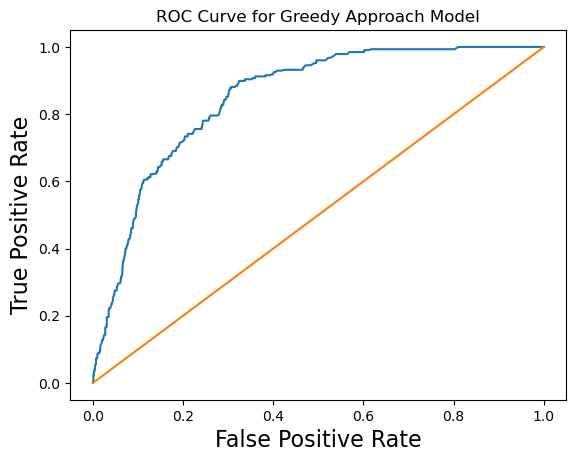

In [65]:
pred_greedy_labels = greedy_lr.predict(greedy_X_test)
pred_greedy_prob = greedy_lr.predict_proba(greedy_X_test)

greedy_accuracy = accuracy_score(y_test, pred_greedy_labels)

print("Accuracy:", greedy_accuracy)

# turn multiclass problem into binary problem
pred_greedy_prob_1 = 1.0 - pred_greedy_prob[:, 0]
y_test_1 = [0 if y == 0 else 1 for y in y_test]

fpr, tpr, _ = roc_curve(y_test_1, pred_greedy_prob_1)

plt.plot(fpr, tpr)
plt.plot([0.0, 1.0], [0.0, 1.0])
plt.xlabel("False Positive Rate", fontsize=16)
plt.ylabel("True Positive Rate", fontsize=16)
plt.title('ROC Curve for Greedy Approach Model')
plt.plot()

# RMSE
greedy_mse = mean_squared_error(y_test_1, pred_greedy_prob_1)
greedy_rmse = np.sqrt(greedy_mse)
print("Greedy Approach Model MSE:", greedy_mse)
print("Greedy Approach RMSE:", greedy_rmse)

All Variables Model

In [66]:
all_X_train, all_X_test = create_feature_matrices(df_train, df_test, df_train.columns, dummy_columns)
    
all_lr = SGDClassifier(max_iter=10000, loss="log")
all_lr.fit(all_X_train, y_train)

SGDClassifier(loss='log', max_iter=10000)

Accuracy: 0.7727659574468085
All Variables Model MSE: 0.15573326683587776
All Variables Model RMSE: 0.39463054473251025


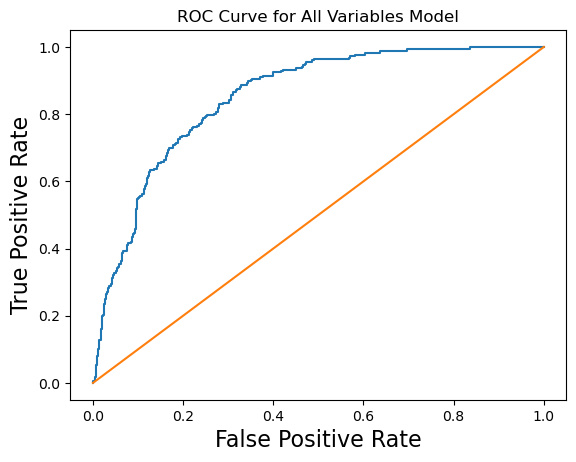

In [67]:
pred_all_labels = all_lr.predict(all_X_test)
pred_all_prob = all_lr.predict_proba(all_X_test)

all_accuracy = accuracy_score(y_test, pred_all_labels)

print("Accuracy:", all_accuracy)

# turn multiclass problem into binary problem
pred_all_prob_1 = 1.0 - pred_all_prob[:, 0]
y_test_1 = [0 if y == 0 else 1 for y in y_test]

fpr, tpr, _ = roc_curve(y_test_1, pred_all_prob_1)

plt.plot(fpr, tpr)
plt.plot([0.0, 1.0], [0.0, 1.0])
plt.xlabel("False Positive Rate", fontsize=16)
plt.ylabel("True Positive Rate", fontsize=16)
plt.title('ROC Curve for All Variables Model')
plt.plot()

# RMSE
all_mse = mean_squared_error(y_test_1, pred_all_prob_1)
all_rmse = np.sqrt(all_mse)
print("All Variables Model MSE:", all_mse)
print("All Variables Model RMSE:", all_rmse)

BMI and Hypertension Model

In [68]:
bmi_hyp_X_train, bmi_hyp_X_test = create_feature_matrices(df_train, df_test, df_train[['bmi', 'hypertension']], dummy_columns)
    
bmi_hyp_lr = SGDClassifier(max_iter=10000, loss="log")
bmi_hyp_lr.fit(bmi_hyp_X_train, y_train)

SGDClassifier(loss='log', max_iter=10000)

Accuracy: 0.6029787234042553
BMI and Hypertension Variables Model MSE: 0.2351648956921281
BMI and Hypertension Variables Model RMSE: 0.4849380328373184


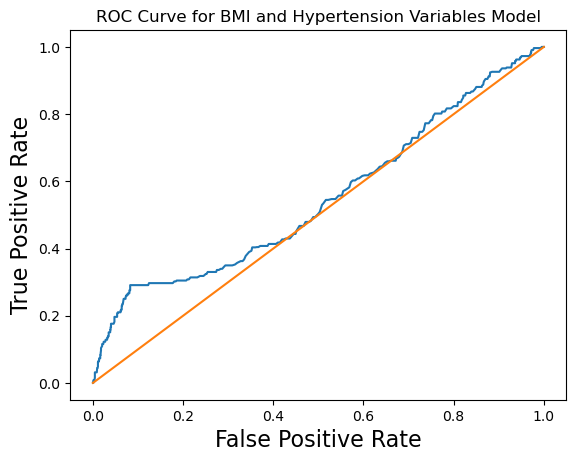

In [69]:
pred_bmi_hyp_labels = bmi_hyp_lr.predict(bmi_hyp_X_test)
pred_bmi_hyp_prob = bmi_hyp_lr.predict_proba(bmi_hyp_X_test)

bmi_hyp_accuracy = accuracy_score(y_test, pred_bmi_hyp_labels)

print("Accuracy:", bmi_hyp_accuracy)

# turn multiclass problem into binary problem
pred_bmi_hyp_prob_1 = 1.0 - pred_bmi_hyp_prob[:, 0]
y_test_1 = [0 if y == 0 else 1 for y in y_test]

fpr, tpr, _ = roc_curve(y_test_1, pred_bmi_hyp_prob_1)

plt.plot(fpr, tpr)
plt.plot([0.0, 1.0], [0.0, 1.0])
plt.xlabel("False Positive Rate", fontsize=16)
plt.ylabel("True Positive Rate", fontsize=16)
plt.title('ROC Curve for BMI and Hypertension Variables Model')
plt.plot()

# RMSE
bmi_hyp_mse = mean_squared_error(y_test_1, pred_bmi_hyp_prob_1)
bmi_hyp_rmse = np.sqrt(bmi_hyp_mse)
print("BMI and Hypertension Variables Model MSE:", bmi_hyp_mse)
print("BMI and Hypertension Variables Model RMSE:", bmi_hyp_rmse)

## KNN Model (oversampling)

In [70]:
knn_verbose = True

Accuracy: 0.5
Null KNN Model MSE: 0.26
Null KNN Model RMSE: 0.5099019513592785
Null KNN Model F2 Score: 0.8333333333333334
Null KNN Model Recall Score: 1.0
Null KNN Model Accuracy: 0.5

gender Accuracy: 0.5
gender Loss: 0.7135581778200728
F2 Score: 0.8333333333333334
Recall Score: 1.0

age Accuracy: 0.7161702127659575
age Loss: 2.0223134498750586
F2 Score: 0.7914900554287577
Recall Score: 0.8263829787234043

hypertension Accuracy: 0.5
hypertension Loss: 0.9286620300539484
F2 Score: 0.8333333333333334
Recall Score: 1.0

heart_disease Accuracy: 0.5
heart_disease Loss: 0.7013798178719808
F2 Score: 0.8333333333333334
Recall Score: 1.0

ever_married Accuracy: 0.6263829787234042
ever_married Loss: 11.276290260707905
F2 Score: 0.8104374520337683
Recall Score: 0.8987234042553192

work_type Accuracy: 0.571063829787234
work_type Loss: 9.925072498589286
F2 Score: 0.7695831424644984
Recall Score: 0.857872340425532

Residence_type Accuracy: 0.49744680851063827
Residence_type Loss: 0.811604311185058


['age', 'ever_married', 'ever_married_False', 'avg_glucose_level', 'hypertension_True', 'smoking_status', 'smoking_status_Unknown', 'heart_disease', 'heart_disease_True'] Model Accuracy: 0.9395744680851064
['age', 'ever_married', 'ever_married_False', 'avg_glucose_level', 'hypertension_True', 'smoking_status', 'smoking_status_Unknown', 'heart_disease', 'heart_disease_True'] Model Loss: 0.9385132420302698
['age', 'ever_married', 'ever_married_False', 'avg_glucose_level', 'hypertension_True', 'smoking_status', 'smoking_status_Unknown', 'heart_disease', 'heart_disease_True'] Model F2: 0.9764001994349343
['age', 'ever_married', 'ever_married_False', 'avg_glucose_level', 'hypertension_True', 'smoking_status', 'smoking_status_Unknown', 'heart_disease', 'heart_disease_True'] Model Recall: 1.0

Base Model Accuracy: 0.9395744680851064
Base Model Loss: 0.9380784968185542
Base Model F2 Score: 0.9764001994349343
Base Model Recall: 1.0


['age', 'ever_married', 'ever_married_False', 'avg_glucose_l


['age', 'ever_married', 'ever_married_False', 'avg_glucose_level', 'hypertension_True', 'smoking_status', 'smoking_status_Unknown', 'heart_disease', 'work_type_children', 'hypertension'] Model Accuracy: 0.94
['age', 'ever_married', 'ever_married_False', 'avg_glucose_level', 'hypertension_True', 'smoking_status', 'smoking_status_Unknown', 'heart_disease', 'work_type_children', 'hypertension'] Model Loss: 0.9380009131773651
['age', 'ever_married', 'ever_married_False', 'avg_glucose_level', 'hypertension_True', 'smoking_status', 'smoking_status_Unknown', 'heart_disease', 'work_type_children', 'hypertension'] Model F2: 0.9765625000000001
['age', 'ever_married', 'ever_married_False', 'avg_glucose_level', 'hypertension_True', 'smoking_status', 'smoking_status_Unknown', 'heart_disease', 'work_type_children', 'hypertension'] Model Recall: 1.0

Base Model Accuracy: 0.94
Base Model Loss: 0.9379059584746783
Base Model F2 Score: 0.9765625000000001
Base Model Recall: 1.0


['age', 'ever_married', 

Accuracy: 0.9323404255319149
All Variables KNN Model MSE: 0.049378723404255316
All Variables KNN Model RMSE: 0.22221323858909783
All Variables KNN Model F2 Score: 0.9736493205170701
All Variables KNN Model Recall Score: 1.0
Accuracy: 0.7761702127659574
KNN BMI and Hypertension Variables Model MSE: 0.15382127659574468
KNN BMI and Hypertension Variables Model RMSE: 0.3922005565979537
KNN BMI and Hypertension Variables Model F2 Score: 0.8218724109362054
KNN BMI and Hypertension Variables Model Recall Score: 0.8442553191489361


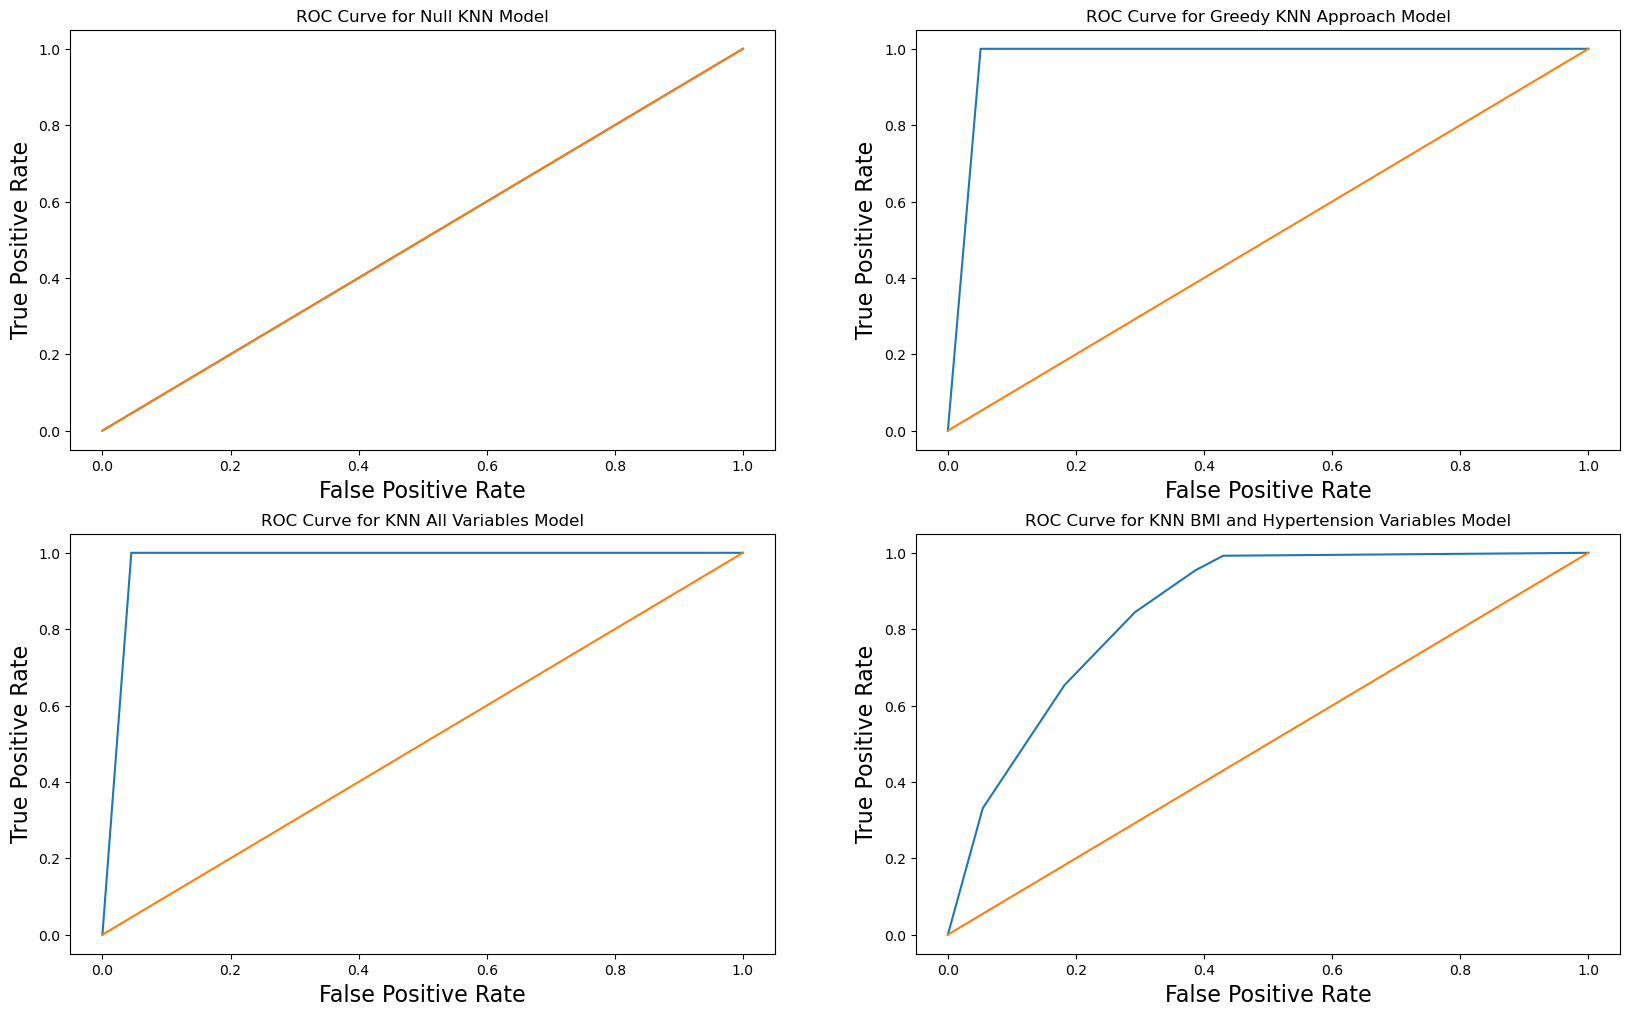

In [71]:
knn_fig, knn_ax = plt.subplots(2,2, figsize=[20, 12])

zeros_train = np.zeros(X_train.shape)
zeros_test = np.zeros(X_test.shape)

null_knn = KNClassifier()
null_knn.fit(zeros_train, y_train)

pred_null_knn_labels = null_knn.predict(zeros_test)
pred_null_knn_prob = null_knn.predict_proba(zeros_test)

null_knn_accuracy = accuracy_score(y_test, pred_null_knn_labels)

# turn multiclass problem into binary problem
pred_null_knn_prob_1 = 1.0 - pred_null_knn_prob[:, 0]
y_test_1 = [0 if y == 0 else 1 for y in y_test]

fpr, tpr, _ = roc_curve(y_test_1, pred_null_knn_prob_1)

knn_ax[0,0].plot(fpr, tpr)
knn_ax[0,0].plot([0.0, 1.0], [0.0, 1.0])
knn_ax[0,0].set_xlabel("False Positive Rate", fontsize=16)
knn_ax[0,0].set_ylabel("True Positive Rate", fontsize=16)
knn_ax[0,0].set_title('ROC Curve for Null KNN Model')
#knn_ax[0].plot()

# RMSE
null_knn_mse = mean_squared_error(y_test_1, pred_null_knn_prob_1)
null_knn_rmse = np.sqrt(null_knn_mse)

#F2-Score, recall
null_knn_f2 = f2(y_test_1, pred_null_knn_labels, beta=2.0)
null_knn_recall = recall_score(y_test_1, pred_null_knn_labels)

if knn_verbose:
    print("Accuracy:", null_knn_accuracy)
    print("Null KNN Model MSE:", null_knn_mse)
    print("Null KNN Model RMSE:", null_knn_rmse)
    print("Null KNN Model F2 Score:", null_knn_f2)
    print("Null KNN Model Recall Score:", null_knn_recall)

##########

pred_null_knn_labels = null_knn.predict(zeros_test)
pred_prob = null_knn.predict_proba(zeros_test)

null_knn_accuracy = accuracy_score(y_test, pred_null_knn_labels)
null_knn_loss = log_loss(y_test, pred_prob)

##########

if knn_verbose:
    print("Null KNN Model Accuracy:", null_accuracy)

column_accuracies_knn = []

for col_name in df_train.columns:
    X_train, X_test = create_feature_matrices(df_train, df_test, [col_name], dummy_columns)
    
    simple_knn = KNClassifier()
    simple_knn.fit(X_train, y_train)
    pred_labels = simple_knn.predict(X_test)
    pred_probs = simple_knn.predict_proba(X_test)
    simple_accuracy = accuracy_score(y_test, pred_labels)
    simple_loss = log_loss(y_test, pred_probs)
    simple_f2 = f2(y_test, pred_labels, beta=2.0)
    simple_recall = recall_score(y_test, pred_labels)
    if knn_verbose:
        print()
        print(col_name + " Accuracy:", simple_accuracy)
        print(col_name + " Loss:", simple_loss)
        print("F2 Score:", simple_f2)
        print("Recall Score:", simple_recall)
    column_accuracies_knn.append((simple_accuracy, col_name))
    
column_accuracies_knn.sort(key=lambda p: p[0], reverse=True)
sorted_columns_knn = [col_name for _, col_name in column_accuracies]

if knn_verbose:
    print()
    print("Sorted columns:" + str(sorted_columns_knn))
    
###############

base_knn_model_columns = []
base_knn_loss = null_knn_loss
base_knn_accuracy = null_knn_accuracy
base_knn_f2 = null_knn_f2
base_knn_recall = null_knn_recall

if knn_verbose:
    print("Base KNN Model Accuracy:", base_knn_accuracy)
    print("Base KNN Model Loss:", base_knn_loss)
    print("Base KNN Model F-beta Score:", base_knn_f2)
    print("Base KNN Model Recall:", base_knn_recall)
    print()

for col_name in sorted_columns_knn:
    # track all column names
    trial_columns = base_knn_model_columns[:]
    trial_columns.append(col_name)

    X_train, X_test = create_feature_matrices(df_train, df_test, trial_columns, dummy_columns)
    
    trial_knn = KNClassifier()
    trial_knn.fit(X_train, y_train)
    pred_labels = trial_knn.predict(X_test)
    pred_prob = trial_knn.predict_proba(X_test)
    trial_accuracy = accuracy_score(y_test, pred_labels)
    trial_loss = log_loss(y_test, pred_prob)
    trial_f2 = f2(y_test, pred_labels, beta=2.0)
    trial_recall = recall_score(y_test, pred_labels)
    if knn_verbose:
        print()
        print(str(trial_columns) + " Model Accuracy:", trial_accuracy)
        print(str(trial_columns) + " Model Loss:", trial_loss)
        print(str(trial_columns) + " Model F2:", trial_f2)
        print(str(trial_columns) + " Model Recall:", trial_recall)
    

    if trial_accuracy > base_knn_accuracy:
        if knn_verbose:
            print("Updating base model with column \'" + str(col_name) + "\'")
        base_knn_loss = trial_loss
        base_knn_model_columns = trial_columns
        base_knn_accuracy = trial_accuracy
        base_knn_f2 = trial_f2
        base_knn_recall = trial_recall
    if knn_verbose:
        print()
        print("Base Model Accuracy:", base_knn_accuracy)
        print("Base Model Loss:", base_knn_loss)
        print("Base Model F2 Score:", base_knn_f2)
        print("Base Model Recall:", base_knn_recall)
        print()
    
print("Our chosen columns are: " + str(base_knn_model_columns))


############

greedy_knn_X_train, greedy_knn_X_test = create_feature_matrices(df_train, df_test, base_knn_model_columns, dummy_columns)
    
greedy_knn = KNClassifier()
greedy_knn.fit(greedy_knn_X_train, y_train)

#############

pred_greedy_knn_labels = greedy_knn.predict(greedy_knn_X_test)
pred_greedy_knn_prob = greedy_knn.predict_proba(greedy_knn_X_test)

greedy_knn_accuracy = accuracy_score(y_test, pred_greedy_knn_labels)

# turn multiclass problem into binary problem
pred_greedy_knn_prob_1 = 1.0 - pred_greedy_knn_prob[:, 0]
y_test_1 = [0 if y == 0 else 1 for y in y_test]

fpr, tpr, _ = roc_curve(y_test_1, pred_greedy_knn_prob_1)

knn_ax[0,1].plot(fpr, tpr)
knn_ax[0,1].plot([0.0, 1.0], [0.0, 1.0])
knn_ax[0,1].set_xlabel("False Positive Rate", fontsize=16)
knn_ax[0,1].set_ylabel("True Positive Rate", fontsize=16)
knn_ax[0,1].set_title('ROC Curve for Greedy KNN Approach Model')
# plt.plot()

# RMSE
greedy_knn_mse = mean_squared_error(y_test_1, pred_greedy_knn_prob_1)
greedy_knn_rmse = np.sqrt(greedy_knn_mse)

# F2, recall
greedy_knn_f2 = f2(y_test_1, pred_greedy_knn_labels, beta=2.0)
greedy_knn_recall = recall_score(y_test_1, pred_greedy_knn_labels)

if knn_verbose:
    print("Accuracy:", greedy_knn_accuracy)
    print("Greedy KNN Approach Model MSE:", greedy_knn_mse)
    print("Greedy KNN Approach RMSE:", greedy_knn_rmse)
    print("Greedy KNN Model F2 Score:", greedy_knn_f2)
    print("Greedy KNN Model Recall Score:", greedy_knn_recall)

#####################

all_knn_X_train, all_knn_X_test = create_feature_matrices(df_train, df_test, df_train.columns, dummy_columns)
    
all_knn = KNClassifier()
all_knn.fit(all_knn_X_train, y_train)

#####################

pred_all_knn_labels = all_knn.predict(all_knn_X_test)
pred_all_knn_prob = all_knn.predict_proba(all_knn_X_test)

all_knn_accuracy = accuracy_score(y_test, pred_all_knn_labels)

# turn multiclass problem into binary problem
pred_all_knn_prob_1 = 1.0 - pred_all_knn_prob[:, 0]
y_test_1 = [0 if y == 0 else 1 for y in y_test]

fpr, tpr, _ = roc_curve(y_test_1, pred_all_knn_prob_1)

knn_ax[1,0].plot(fpr, tpr)
knn_ax[1,0].plot([0.0, 1.0], [0.0, 1.0])
knn_ax[1,0].set_xlabel("False Positive Rate", fontsize=16)
knn_ax[1,0].set_ylabel("True Positive Rate", fontsize=16)
knn_ax[1,0].set_title('ROC Curve for KNN All Variables Model')
# plt.plot()

# RMSE
all_knn_mse = mean_squared_error(y_test_1, pred_all_knn_prob_1)
all_knn_rmse = np.sqrt(all_knn_mse)

# F2, recall
all_knn_f2 = f2(y_test_1, pred_all_knn_labels, beta=2.0)
all_knn_recall = recall_score(y_test_1, pred_all_knn_labels)

if knn_verbose:
    print("Accuracy:", all_knn_accuracy)
    print("All Variables KNN Model MSE:", all_knn_mse)
    print("All Variables KNN Model RMSE:", all_knn_rmse)
    print("All Variables KNN Model F2 Score:", all_knn_f2)
    print("All Variables KNN Model Recall Score:", all_knn_recall)
    
#########
    
bmi_hyp_knn_X_train, bmi_hyp_knn_X_test = create_feature_matrices(df_train, df_test, df_train[['bmi', 'hypertension']], dummy_columns)
  
    
bmi_hyp_knn = KNClassifier()
bmi_hyp_knn.fit(bmi_hyp_knn_X_train, y_train)

pred_bmi_hyp_knn_labels = bmi_hyp_knn.predict(bmi_hyp_knn_X_test)
pred_bmi_hyp_knn_prob = bmi_hyp_knn.predict_proba(bmi_hyp_knn_X_test)

bmi_hyp_knn_accuracy = accuracy_score(y_test, pred_bmi_hyp_knn_labels)

# turn multiclass problem into binary problem
pred_bmi_hyp_knn_prob_1 = 1.0 - pred_bmi_hyp_knn_prob[:, 0]
y_test_1 = [0 if y == 0 else 1 for y in y_test]

fpr, tpr, _ = roc_curve(y_test_1, pred_bmi_hyp_knn_prob_1)

knn_ax[1,1].plot(fpr, tpr)
knn_ax[1,1].plot([0.0, 1.0], [0.0, 1.0])
knn_ax[1,1].set_xlabel("False Positive Rate", fontsize=16)
knn_ax[1,1].set_ylabel("True Positive Rate", fontsize=16)
knn_ax[1,1].set_title('ROC Curve for KNN BMI and Hypertension Variables Model')
plt.plot()

# RMSE
bmi_hyp_knn_mse = mean_squared_error(y_test_1, pred_bmi_hyp_knn_prob_1)
bmi_hyp_knn_rmse = np.sqrt(bmi_hyp_knn_mse)

# F2, recall
bmi_hyp_knn_f2 = f2(y_test_1, pred_bmi_hyp_knn_labels, beta=2.0)
bmi_hyp_knn_recall = recall_score(y_test_1, pred_bmi_hyp_knn_labels)

if knn_verbose:
    print("Accuracy:", bmi_hyp_knn_accuracy)
    print("KNN BMI and Hypertension Variables Model MSE:", bmi_hyp_knn_mse)
    print("KNN BMI and Hypertension Variables Model RMSE:", bmi_hyp_knn_rmse)
    print("KNN BMI and Hypertension Variables Model F2 Score:", bmi_hyp_knn_f2)
    print("KNN BMI and Hypertension Variables Model Recall Score:", bmi_hyp_knn_recall)
    
plt.show()

## Random Forests Model (oversampling)

In [72]:
rfc_verbose = True

Accuracy: 0.5
Null RFC Model MSE: 0.2500000021910367
Null RFC Model RMSE: 0.5000000021910367
Null RFC Model F2 Score: 0.0
Null RFC Model Recall Score: 0.0
Null RFC Model Accuracy: 0.5

gender Accuracy: 0.5093617021276595
gender Loss: 0.6931644495035019
F2 Score: 0.4388438491364118
Recall Score: 0.4238297872340426

age Accuracy: 0.7753191489361703
age Loss: 0.44212734936647363
F2 Score: 0.8446332298644013
Recall Score: 0.88

hypertension Accuracy: 0.6029787234042553
hypertension Loss: 0.6568184967197943
F2 Score: 0.3325554259043174
Recall Score: 0.29106382978723405

heart_disease Accuracy: 0.5753191489361702
heart_disease Loss: 0.6649683340346518
F2 Score: 0.23260477240826152
Recall Score: 0.1974468085106383

ever_married Accuracy: 0.6263829787234042
ever_married Loss: 0.6456131646988108
F2 Score: 0.8104374520337683
Recall Score: 0.8987234042553192

work_type Accuracy: 0.571063829787234
work_type Loss: 0.6477210579737958
F2 Score: 0.8497160332022716
Recall Score: 0.9931914893617021

Res


['age', 'ever_married', 'avg_glucose_level', 'smoking_status_Unknown'] Model Accuracy: 0.9791489361702128
['age', 'ever_married', 'avg_glucose_level', 'smoking_status_Unknown'] Model Loss: 0.08542541522110599
['age', 'ever_married', 'avg_glucose_level', 'smoking_status_Unknown'] Model F2: 0.9917285617825793
['age', 'ever_married', 'avg_glucose_level', 'smoking_status_Unknown'] Model Recall: 1.0

Base Model Accuracy: 0.9804255319148936
Base Model Loss: 0.07102964184932593
Base Model F2 Score: 0.9922310420537073
Base Model Recall: 1.0


['age', 'ever_married', 'avg_glucose_level', 'heart_disease'] Model Accuracy: 0.9804255319148936
['age', 'ever_married', 'avg_glucose_level', 'heart_disease'] Model Loss: 0.0673744020094441
['age', 'ever_married', 'avg_glucose_level', 'heart_disease'] Model F2: 0.9922310420537073
['age', 'ever_married', 'avg_glucose_level', 'heart_disease'] Model Recall: 1.0

Base Model Accuracy: 0.9804255319148936
Base Model Loss: 0.07102964184932593
Base Model F2 Score


['age', 'ever_married', 'avg_glucose_level', 'work_type', 'bmi', 'gender_Female', 'Residence_type', 'hypertension_False'] Model Accuracy: 0.9897872340425532
['age', 'ever_married', 'avg_glucose_level', 'work_type', 'bmi', 'gender_Female', 'Residence_type', 'hypertension_False'] Model Loss: 0.04654144273275165
['age', 'ever_married', 'avg_glucose_level', 'work_type', 'bmi', 'gender_Female', 'Residence_type', 'hypertension_False'] Model F2: 0.995931513815901
['age', 'ever_married', 'avg_glucose_level', 'work_type', 'bmi', 'gender_Female', 'Residence_type', 'hypertension_False'] Model Recall: 1.0

Base Model Accuracy: 0.9906382978723405
Base Model Loss: 0.0435036362295831
Base Model F2 Score: 0.9962692894692214
Base Model Recall: 1.0


['age', 'ever_married', 'avg_glucose_level', 'work_type', 'bmi', 'gender_Female', 'Residence_type', 'work_type_Govt_job'] Model Accuracy: 0.9902127659574468
['age', 'ever_married', 'avg_glucose_level', 'work_type', 'bmi', 'gender_Female', 'Residence_type',

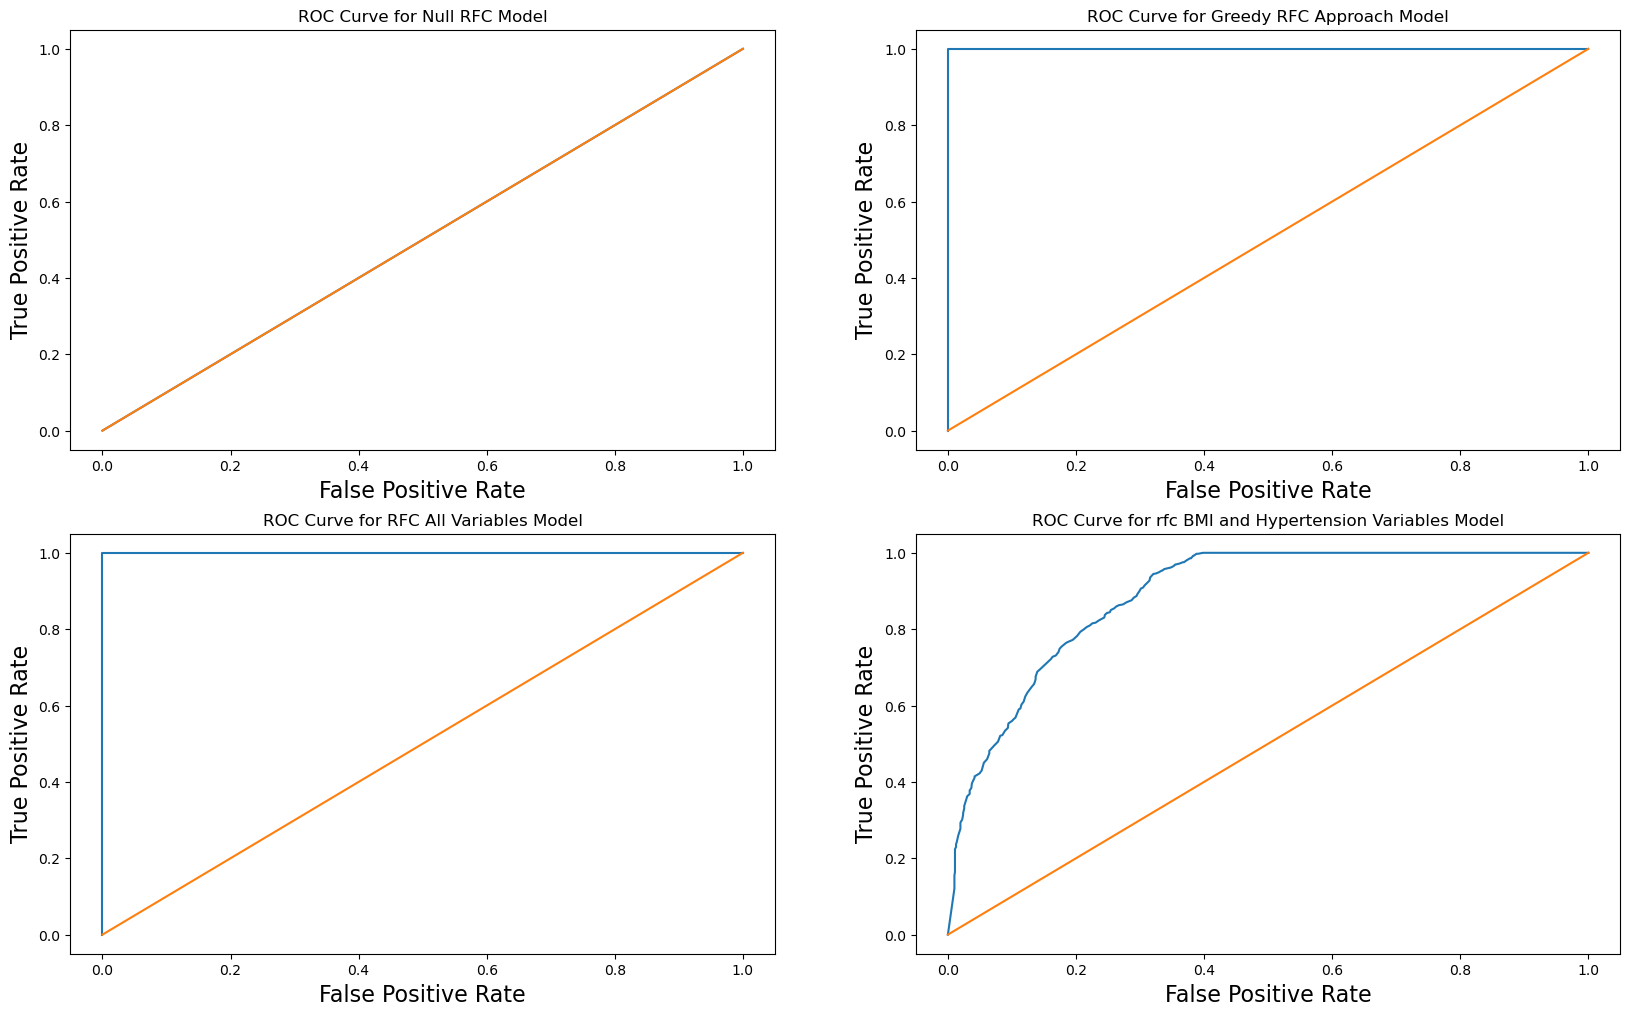

In [73]:
rfc_fig, rfc_ax = plt.subplots(2,2, figsize=[20, 12])

zeros_train = np.zeros(X_train.shape)
zeros_test = np.zeros(X_test.shape)

null_rfc = RFClassifier()
null_rfc.fit(zeros_train, y_train)

pred_null_rfc_labels = null_rfc.predict(zeros_test)
pred_null_rfc_prob = null_rfc.predict_proba(zeros_test)

null_rfc_accuracy = accuracy_score(y_test, pred_null_rfc_labels)

# turn multiclass problem into binary problem
pred_null_rfc_prob_1 = 1.0 - pred_null_rfc_prob[:, 0]
y_test_1 = [0 if y == 0 else 1 for y in y_test]

fpr, tpr, _ = roc_curve(y_test_1, pred_null_rfc_prob_1)

rfc_ax[0,0].plot(fpr, tpr)
rfc_ax[0,0].plot([0.0, 1.0], [0.0, 1.0])
rfc_ax[0,0].set_xlabel("False Positive Rate", fontsize=16)
rfc_ax[0,0].set_ylabel("True Positive Rate", fontsize=16)
rfc_ax[0,0].set_title('ROC Curve for Null RFC Model')
#plt.plot()

# RMSE
null_rfc_mse = mean_squared_error(y_test_1, pred_null_rfc_prob_1)
null_rfc_rmse = np.sqrt(null_rfc_mse)

#F2-Score, recall
null_rfc_f2 = f2(y_test_1, pred_null_rfc_labels, beta=2.0)
null_rfc_recall = recall_score(y_test_1, pred_null_rfc_labels)

if rfc_verbose:
    print("Accuracy:", null_rfc_accuracy)
    print("Null RFC Model MSE:", null_rfc_mse)
    print("Null RFC Model RMSE:", null_rfc_rmse)
    print("Null RFC Model F2 Score:", null_rfc_f2)
    print("Null RFC Model Recall Score:", null_rfc_recall)
    
#################

pred_null_rfc_labels = null_rfc.predict(zeros_test)
pred_prob = null_rfc.predict_proba(zeros_test)

null_rfc_accuracy = accuracy_score(y_test, pred_null_rfc_labels)
null_rfc_loss = log_loss(y_test, pred_prob)

#################

if rfc_verbose:
    print("Null RFC Model Accuracy:", null_accuracy)

column_accuracies_rfc = []

for col_name in df_train.columns:
    X_train, X_test = create_feature_matrices(df_train, df_test, [col_name], dummy_columns)
    
    simple_rfc = RFClassifier()
    simple_rfc.fit(X_train, y_train)
    pred_labels = simple_rfc.predict(X_test)
    pred_probs = simple_rfc.predict_proba(X_test)
    simple_accuracy = accuracy_score(y_test, pred_labels)
    simple_loss = log_loss(y_test, pred_probs)
    simple_f2 = f2(y_test, pred_labels, beta=2.0)
    simple_recall = recall_score(y_test, pred_labels)
    if rfc_verbose:
        print()
        print(col_name + " Accuracy:", simple_accuracy)
        print(col_name + " Loss:", simple_loss)
        print("F2 Score:", simple_f2)
        print("Recall Score:", simple_recall)
    column_accuracies_rfc.append((simple_accuracy, col_name))
    
column_accuracies_rfc.sort(key=lambda p: p[0], reverse=True)
sorted_columns_rfc = [col_name for _, col_name in column_accuracies]

if rfc_verbose:
    print()
    print("Sorted columns:" + str(sorted_columns_rfc))
    
################

base_rfc_model_columns = []
base_rfc_loss = null_rfc_loss
base_rfc_accuracy = null_rfc_accuracy
base_rfc_f2 = null_rfc_f2
base_rfc_recall = null_rfc_recall

if rfc_verbose:
    print("Base rfc Model Accuracy:", base_rfc_accuracy)
    print("Base rfc Model Loss:", base_rfc_loss)
    print("Base rfc Model F-beta Score:", base_rfc_f2)
    print("Base rfc Model Recall:", base_rfc_recall)
    print()

for col_name in sorted_columns_rfc:
    # track all column names
    trial_columns = base_rfc_model_columns[:]
    trial_columns.append(col_name)

    X_train, X_test = create_feature_matrices(df_train, df_test, trial_columns, dummy_columns)
    
    trial_rfc = RFClassifier()
    trial_rfc.fit(X_train, y_train)
    pred_labels = trial_rfc.predict(X_test)
    pred_prob = trial_rfc.predict_proba(X_test)
    trial_accuracy = accuracy_score(y_test, pred_labels)
    trial_loss = log_loss(y_test, pred_prob)
    trial_f2 = f2(y_test, pred_labels, beta=2.0)
    trial_recall = recall_score(y_test, pred_labels)
    if rfc_verbose:
        print()
        print(str(trial_columns) + " Model Accuracy:", trial_accuracy)
        print(str(trial_columns) + " Model Loss:", trial_loss)
        print(str(trial_columns) + " Model F2:", trial_f2)
        print(str(trial_columns) + " Model Recall:", trial_recall)
    

    if trial_accuracy > base_rfc_accuracy:
        if rfc_verbose:
            print("Updating base model with column \'" + str(col_name) + "\'")
        base_rfc_loss = trial_loss
        base_rfc_model_columns = trial_columns
        base_rfc_accuracy = trial_accuracy
        base_rfc_f2 = trial_f2
        base_rfc_recall = trial_recall
    if rfc_verbose:
        print()
        print("Base Model Accuracy:", base_rfc_accuracy)
        print("Base Model Loss:", base_rfc_loss)
        print("Base Model F2 Score:", base_rfc_f2)
        print("Base Model Recall:", base_rfc_recall)
        print()
    
print("Our chosen columns are: " + str(base_rfc_model_columns))


#################

greedy_rfc_X_train, greedy_rfc_X_test = create_feature_matrices(df_train, df_test, base_rfc_model_columns, dummy_columns)
    
greedy_rfc = RFClassifier()
greedy_rfc.fit(greedy_rfc_X_train, y_train)

#################

pred_greedy_rfc_labels = greedy_rfc.predict(greedy_rfc_X_test)
pred_greedy_rfc_prob = greedy_rfc.predict_proba(greedy_rfc_X_test)

greedy_rfc_accuracy = accuracy_score(y_test, pred_greedy_rfc_labels)

################

# turn multiclass problem into binary problem
pred_greedy_rfc_prob_1 = 1.0 - pred_greedy_rfc_prob[:, 0]
y_test_1 = [0 if y == 0 else 1 for y in y_test]

fpr, tpr, _ = roc_curve(y_test_1, pred_greedy_rfc_prob_1)

rfc_ax[0,1].plot(fpr, tpr)
rfc_ax[0,1].plot([0.0, 1.0], [0.0, 1.0])
rfc_ax[0,1].set_xlabel("False Positive Rate", fontsize=16)
rfc_ax[0,1].set_ylabel("True Positive Rate", fontsize=16)
rfc_ax[0,1].set_title('ROC Curve for Greedy RFC Approach Model')
#plt.plot()

# RMSE
greedy_rfc_mse = mean_squared_error(y_test_1, pred_greedy_rfc_prob_1)
greedy_rfc_rmse = np.sqrt(greedy_rfc_mse)

# F2, recall
greedy_rfc_f2 = f2(y_test_1, pred_greedy_rfc_labels, beta=2.0)
greedy_rfc_recall = recall_score(y_test_1, pred_greedy_rfc_labels)

if rfc_verbose:
    print("Accuracy:", greedy_rfc_accuracy)
    print("Greedy RFC Approach Model MSE:", greedy_rfc_mse)
    print("Greedy RFC Approach RMSE:", greedy_rfc_rmse)
    print("Greedy RFC Model F2 Score:", greedy_rfc_f2)
    print("Greedy RFC Model Recall Score:", greedy_rfc_recall)
    
###############

all_rfc_X_train, all_rfc_X_test = create_feature_matrices(df_train, df_test, df_train.columns, dummy_columns)
    
all_rfc = RFClassifier()
all_rfc.fit(all_rfc_X_train, y_train)

###############

pred_all_rfc_labels = all_rfc.predict(all_rfc_X_test)
pred_all_rfc_prob = all_rfc.predict_proba(all_rfc_X_test)

all_rfc_accuracy = accuracy_score(y_test, pred_all_rfc_labels)

# turn multiclass problem into binary problem
pred_all_rfc_prob_1 = 1.0 - pred_all_rfc_prob[:, 0]
y_test_1 = [0 if y == 0 else 1 for y in y_test]

fpr, tpr, _ = roc_curve(y_test_1, pred_all_rfc_prob_1)

rfc_ax[1,0].plot(fpr, tpr)
rfc_ax[1,0].plot([0.0, 1.0], [0.0, 1.0])
rfc_ax[1,0].set_xlabel("False Positive Rate", fontsize=16)
rfc_ax[1,0].set_ylabel("True Positive Rate", fontsize=16)
rfc_ax[1,0].set_title('ROC Curve for RFC All Variables Model')
#plt.plot()

# RMSE
all_rfc_mse = mean_squared_error(y_test_1, pred_all_rfc_prob_1)
all_rfc_rmse = np.sqrt(all_rfc_mse)

# F2, recall
all_rfc_f2 = f2(y_test_1, pred_all_rfc_labels, beta=2.0)
all_rfc_recall = recall_score(y_test_1, pred_all_rfc_labels)

if rfc_verbose:
    print("Accuracy:", all_rfc_accuracy)
    print("RFC All Variables Model MSE:", all_rfc_mse)
    print("RFC All Variables Model RMSE:", all_rfc_rmse)
    print("RFC All Variables Model F2 Score:", all_rfc_f2)
    print("RFC All Variables Model Recall Score:", all_rfc_recall)
    
#########
    
bmi_hyp_rfc_X_train, bmi_hyp_rfc_X_test = create_feature_matrices(df_train, df_test, df_train[['bmi', 'hypertension']], dummy_columns)
  
    
bmi_hyp_rfc = RFClassifier()
bmi_hyp_rfc.fit(bmi_hyp_rfc_X_train, y_train)

pred_bmi_hyp_rfc_labels = bmi_hyp_rfc.predict(bmi_hyp_rfc_X_test)
pred_bmi_hyp_rfc_prob = bmi_hyp_rfc.predict_proba(bmi_hyp_rfc_X_test)

bmi_hyp_rfc_accuracy = accuracy_score(y_test, pred_bmi_hyp_rfc_labels)

# turn multiclass problem into binary problem
pred_bmi_hyp_rfc_prob_1 = 1.0 - pred_bmi_hyp_rfc_prob[:, 0]
y_test_1 = [0 if y == 0 else 1 for y in y_test]

fpr, tpr, _ = roc_curve(y_test_1, pred_bmi_hyp_rfc_prob_1)

rfc_ax[1,1].plot(fpr, tpr)
rfc_ax[1,1].plot([0.0, 1.0], [0.0, 1.0])
rfc_ax[1,1].set_xlabel("False Positive Rate", fontsize=16)
rfc_ax[1,1].set_ylabel("True Positive Rate", fontsize=16)
rfc_ax[1,1].set_title('ROC Curve for rfc BMI and Hypertension Variables Model')

# RMSE
bmi_hyp_rfc_mse = mean_squared_error(y_test_1, pred_bmi_hyp_rfc_prob_1)
bmi_hyp_rfc_rmse = np.sqrt(bmi_hyp_rfc_mse)

# F2, recall
bmi_hyp_rfc_f2 = f2(y_test_1, pred_bmi_hyp_rfc_labels, beta=2.0)
bmi_hyp_rfc_recall = recall_score(y_test_1, pred_bmi_hyp_rfc_labels)

if rfc_verbose:
    print("Accuracy:", bmi_hyp_rfc_accuracy)
    print("RFC BMI and Hypertension Variables Model MSE:", bmi_hyp_rfc_mse)
    print("RFC BMI and Hypertension Variables Model RMSE:", bmi_hyp_rfc_rmse)
    print("RFC BMI and Hypertension Variables Model F2 Score:", bmi_hyp_rfc_f2)
    print("RFC BMI and Hypertension Variables Model Recall Score:", bmi_hyp_rfc_recall)
    
plt.show()

## SVM method (oversampling)
_WARNING_: Running SVMs with oversampling takes a while. In fact, it is borderline un-runnable if probability is set to True in the SVMClassifier declaration, especially in the creation of the greedy model. You have been warned.

In [74]:
svm_verbose = True

Accuracy: 0.5
Null SVM Model MSE: 0.25
Null SVM Model RMSE: 0.5
Null SVM Model F2 Score: 0.8333333333333334
Null SVM Model Recall Score: 1.0
Null SVM Model Accuracy: 0.5

gender Accuracy: 0.5093617021276595
F2 Score: 0.4388438491364118
Recall Score: 0.4238297872340426

age Accuracy: 0.7697872340425532
F2 Score: 0.8476918075422627
Recall Score: 0.8876595744680851

hypertension Accuracy: 0.6029787234042553
F2 Score: 0.3325554259043174
Recall Score: 0.29106382978723405

heart_disease Accuracy: 0.5753191489361702
F2 Score: 0.23260477240826152
Recall Score: 0.1974468085106383

ever_married Accuracy: 0.6263829787234042
F2 Score: 0.8104374520337683
Recall Score: 0.8987234042553192

work_type Accuracy: 0.571063829787234
F2 Score: 0.8497160332022716
Recall Score: 0.9931914893617021

Residence_type Accuracy: 0.5025531914893617
F2 Score: 0.5244107744107743
Recall Score: 0.5302127659574468

avg_glucose_level Accuracy: 0.6357446808510638
F2 Score: 0.4284093058445243
Recall Score: 0.3855319148936170


['age', 'hypertension_True', 'smoking_status', 'smoking_status_formerly smoked'] Model Accuracy: 0.7804255319148936
['age', 'hypertension_True', 'smoking_status', 'smoking_status_formerly smoked'] Model F2: 0.8424938474159147
['age', 'hypertension_True', 'smoking_status', 'smoking_status_formerly smoked'] Model Recall: 0.8740425531914894

Base Model Accuracy: 0.7940425531914893
Base Model F2 Score: 0.8663406682966587
Base Model Recall: 0.9046808510638298


['age', 'hypertension_True', 'smoking_status', 'work_type'] Model Accuracy: 0.7927659574468086
['age', 'hypertension_True', 'smoking_status', 'work_type'] Model F2: 0.845976253298153
['age', 'hypertension_True', 'smoking_status', 'work_type'] Model Recall: 0.8731914893617021

Base Model Accuracy: 0.7940425531914893
Base Model F2 Score: 0.8663406682966587
Base Model Recall: 0.9046808510638298


['age', 'hypertension_True', 'smoking_status', 'work_type_Self-employed'] Model Accuracy: 0.791063829787234
['age', 'hypertension_True', 'smo

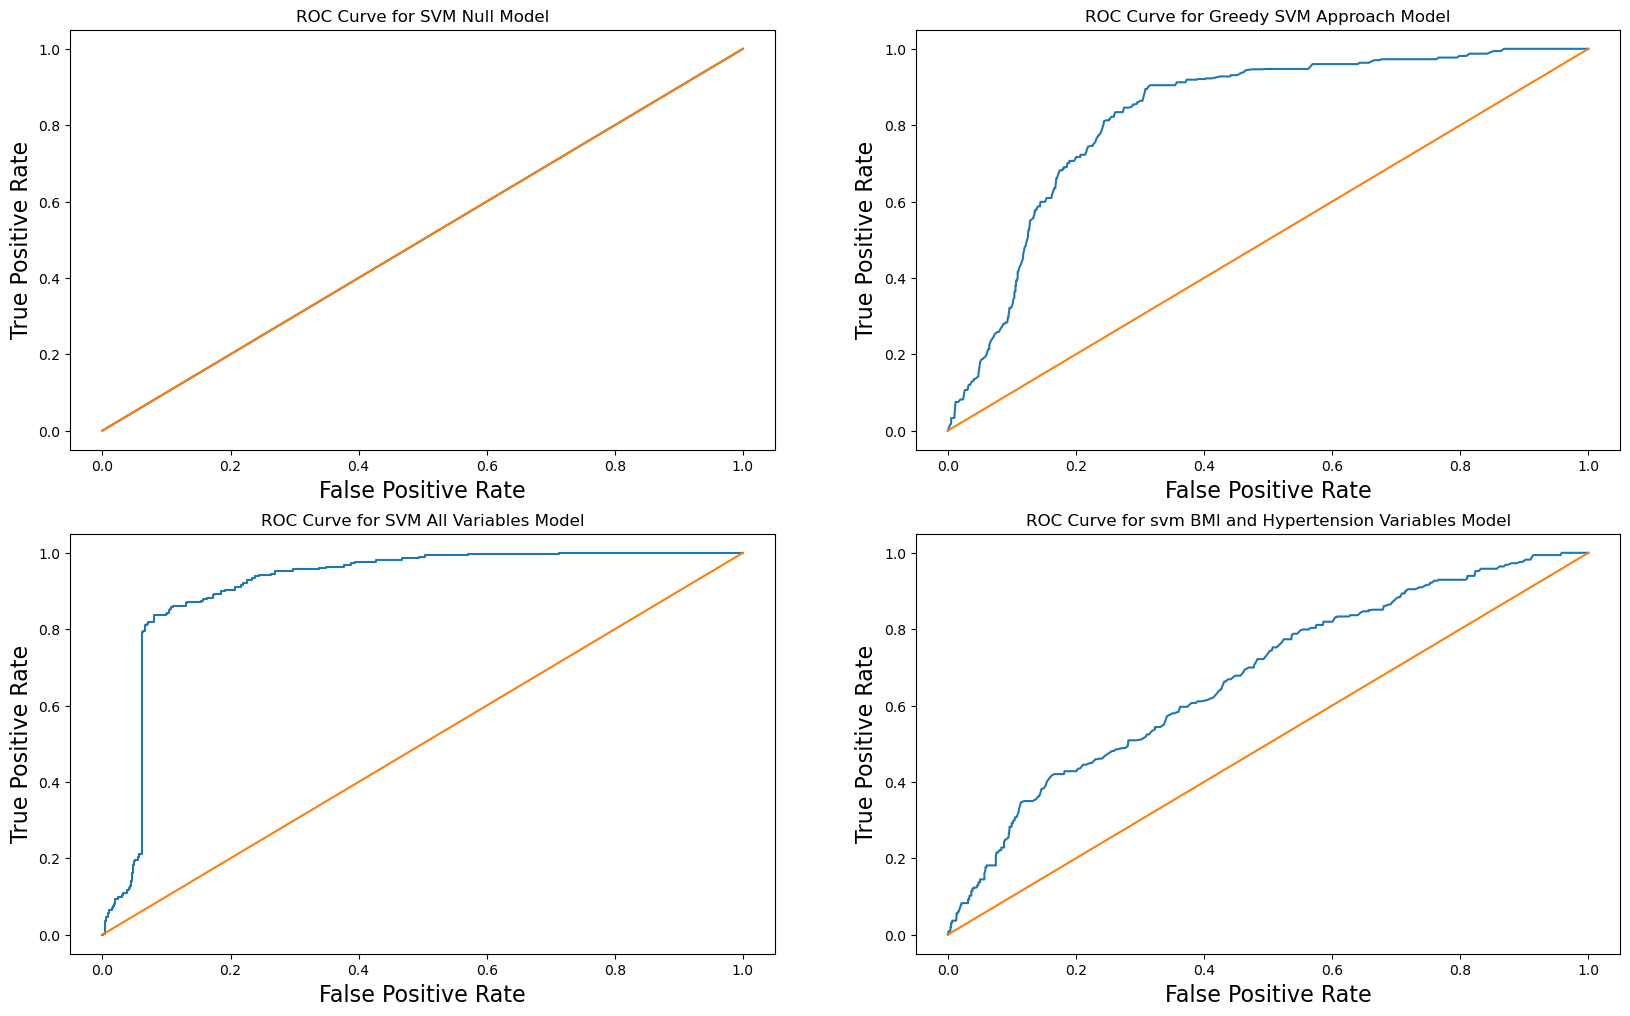

In [75]:
svm_fig, svm_ax = plt.subplots(2,2, figsize=[20, 12])

zeros_train = np.zeros(X_train.shape)
zeros_test = np.zeros(X_test.shape)

null_svm = SVMClassifier(probability=True)
null_svm.fit(zeros_train, y_train)

pred_null_svm_labels = null_svm.predict(zeros_test)
pred_null_svm_prob = null_svm.predict_proba(zeros_test)

null_svm_accuracy = accuracy_score(y_test, pred_null_svm_labels)

# turn multiclass problem into binary problem
pred_null_svm_prob_1 = 1.0 - pred_null_svm_prob[:, 0]
y_test_1 = [0 if y == 0 else 1 for y in y_test]

fpr, tpr, _ = roc_curve(y_test_1, pred_null_svm_prob_1)

svm_ax[0,0].plot(fpr, tpr)
svm_ax[0,0].plot([0.0, 1.0], [0.0, 1.0])
svm_ax[0,0].set_xlabel("False Positive Rate", fontsize=16)
svm_ax[0,0].set_ylabel("True Positive Rate", fontsize=16)
svm_ax[0,0].set_title('ROC Curve for SVM Null Model')
plt.plot()

# RMSE
null_svm_mse = mean_squared_error(y_test_1, pred_null_svm_prob_1)
null_svm_rmse = np.sqrt(null_svm_mse)

#F2-Score, recall
null_svm_f2 = f2(y_test_1, pred_null_svm_labels, beta=2.0)
null_svm_recall = recall_score(y_test_1, pred_null_svm_labels)

if svm_verbose:
    print("Accuracy:", null_svm_accuracy)
    print("Null SVM Model MSE:", null_svm_mse)
    print("Null SVM Model RMSE:", null_svm_rmse)
    print("Null SVM Model F2 Score:", null_svm_f2)
    print("Null SVM Model Recall Score:", null_svm_recall)
    
###################

pred_null_svm_labels = null_svm.predict(zeros_test)
pred_prob = null_svm.predict_proba(zeros_test)

null_svm_accuracy = accuracy_score(y_test, pred_null_svm_labels)
# null_svm_loss = log_loss(y_test, pred_prob)

###################

if svm_verbose:
    print("Null SVM Model Accuracy:", null_accuracy)

column_accuracies_svm = []

for col_name in df_train.columns:
    X_train, X_test = create_feature_matrices(df_train, df_test, [col_name], dummy_columns)
    
    simple_svm = SVMClassifier()
    simple_svm.fit(X_train, y_train)
    pred_labels = simple_svm.predict(X_test)
    #pred_probs = simple_svm.predict_proba(X_test)
    simple_accuracy = accuracy_score(y_test, pred_labels)
    # simple_loss = log_loss(y_test, pred_probs)
    simple_f2 = f2(y_test, pred_labels, beta=2.0)
    simple_recall = recall_score(y_test, pred_labels)
    if svm_verbose:
        print()
        print(col_name + " Accuracy:", simple_accuracy)
        # print(col_name + " Loss:", simple_loss)
        print("F2 Score:", simple_f2)
        print("Recall Score:", simple_recall)
    column_accuracies_svm.append((simple_accuracy, col_name))
    
column_accuracies_svm.sort(key=lambda p: p[0], reverse=True)
sorted_columns_svm = [col_name for _, col_name in column_accuracies]

if svm_verbose:
    print()
    print("Sorted columns:" + str(sorted_columns_svm))
    
###################

base_svm_model_columns = []
# base_svm_loss = null_svm_loss
base_svm_accuracy = null_svm_accuracy
base_svm_f2 = null_svm_f2
base_svm_recall = null_svm_recall

if svm_verbose:
    print("Base SVM Model Accuracy:", base_svm_accuracy)
    # print("Base SVM Model Loss:", base_svm_loss)
    print("Base SVM Model F-beta Score:", base_svm_f2)
    print("Base SVM Model Recall:", base_svm_recall)
    print()

for col_name in sorted_columns_svm:
    # track all column names
    trial_columns = base_svm_model_columns[:]
    trial_columns.append(col_name)

    X_train, X_test = create_feature_matrices(df_train, df_test, trial_columns, dummy_columns)
    
    trial_svm = SVMClassifier()
    trial_svm.fit(X_train, y_train)
    pred_labels = trial_svm.predict(X_test)
    #pred_prob = trial_svm.predict_proba(X_test)
    trial_accuracy = accuracy_score(y_test, pred_labels)
    # trial_loss = log_loss(y_test, pred_prob)
    trial_f2 = f2(y_test, pred_labels, beta=2.0)
    trial_recall = recall_score(y_test, pred_labels)
    if svm_verbose:
        print()
        print(str(trial_columns) + " Model Accuracy:", trial_accuracy)
        # print(str(trial_columns) + " Model Loss:", trial_loss)
        print(str(trial_columns) + " Model F2:", trial_f2)
        print(str(trial_columns) + " Model Recall:", trial_recall)
    

    if trial_accuracy > base_svm_accuracy:
        if svm_verbose:
            print("Updating base model with column \'" + str(col_name) + "\'")
        # base_svm_loss = trial_loss
        base_svm_model_columns = trial_columns
        base_svm_accuracy = trial_accuracy
        base_svm_f2 = trial_f2
        base_svm_recall = trial_recall
    if svm_verbose:
        print()
        print("Base Model Accuracy:", base_svm_accuracy)
        # print("Base Model Loss:", base_svm_loss)
        print("Base Model F2 Score:", base_svm_f2)
        print("Base Model Recall:", base_svm_recall)
        print()
    
print("Our chosen columns are: " + str(base_svm_model_columns))

###############

greedy_svm_X_train, greedy_svm_X_test = create_feature_matrices(df_train, df_test, base_svm_model_columns, dummy_columns)
    
greedy_svm = SVMClassifier(probability=True)
greedy_svm.fit(greedy_svm_X_train, y_train)

###############

pred_greedy_svm_labels = greedy_svm.predict(greedy_svm_X_test)
pred_greedy_svm_prob = greedy_svm.predict_proba(greedy_svm_X_test)

greedy_svm_accuracy = accuracy_score(y_test, pred_greedy_svm_labels)

# turn multiclass problem into binary problem
pred_greedy_svm_prob_1 = 1.0 - pred_greedy_svm_prob[:, 0]
y_test_1 = [0 if y == 0 else 1 for y in y_test]

fpr, tpr, _ = roc_curve(y_test_1, pred_greedy_svm_prob_1)

svm_ax[0,1].plot(fpr, tpr)
svm_ax[0,1].plot([0.0, 1.0], [0.0, 1.0])
svm_ax[0,1].set_xlabel("False Positive Rate", fontsize=16)
svm_ax[0,1].set_ylabel("True Positive Rate", fontsize=16)
svm_ax[0,1].set_title('ROC Curve for Greedy SVM Approach Model')
#plt.plot()

# RMSE
greedy_svm_mse = mean_squared_error(y_test_1, pred_greedy_svm_prob_1)
greedy_svm_rmse = np.sqrt(greedy_svm_mse)

# F2, recall 
greedy_svm_f2 = f2(y_test_1, pred_greedy_svm_labels, beta=2.0)
greedy_svm_recall = recall_score(y_test_1, pred_greedy_svm_labels)

if svm_verbose:
    print("Accuracy:", greedy_svm_accuracy)
    print("Greedy SVM Approach Model MSE:", greedy_svm_mse)
    print("Greedy SVM Approach RMSE:", greedy_svm_rmse)
    print("Greedy SVM Model F2 Score:", greedy_svm_f2)
    print("Greedy SVM Model Recall Score:", greedy_svm_recall)
    
##################

all_svm_X_train, all_svm_X_test = create_feature_matrices(df_train, df_test, df_train.columns, dummy_columns)
    
all_svm = SVMClassifier(probability=True)
all_svm.fit(all_svm_X_train, y_train)

##############

pred_all_svm_labels = all_svm.predict(all_svm_X_test)
pred_all_svm_prob = all_svm.predict_proba(all_svm_X_test)

all_svm_accuracy = accuracy_score(y_test, pred_all_svm_labels)

# turn multiclass problem into binary problem
pred_all_svm_prob_1 = 1.0 - pred_all_svm_prob[:, 0]
y_test_1 = [0 if y == 0 else 1 for y in y_test]

fpr, tpr, _ = roc_curve(y_test_1, pred_all_svm_prob_1)

svm_ax[1,0].plot(fpr, tpr)
svm_ax[1,0].plot([0.0, 1.0], [0.0, 1.0])
svm_ax[1,0].set_xlabel("False Positive Rate", fontsize=16)
svm_ax[1,0].set_ylabel("True Positive Rate", fontsize=16)
svm_ax[1,0].set_title('ROC Curve for SVM All Variables Model')
#plt.plot()

# RMSE
all_svm_mse = mean_squared_error(y_test_1, pred_all_svm_prob_1)
all_svm_rmse = np.sqrt(all_svm_mse)

# F2, recall
all_svm_f2 = f2(y_test_1, pred_all_svm_labels, beta=2.0)
all_svm_recall = recall_score(y_test_1, pred_all_svm_labels)

if svm_verbose:
    print("Accuracy:", all_svm_accuracy)
    print("All Variables SVM Model MSE:", all_svm_mse)
    print("All Variables SVM Model RMSE:", all_svm_rmse)
    print("All Variables SVM Model F2 Score:", all_svm_f2)
    print("All Variables SVM Model Recall Score:", all_svm_recall)
    
#########
    
bmi_hyp_svm_X_train, bmi_hyp_svm_X_test = create_feature_matrices(df_train, df_test, df_train[['bmi', 'hypertension']], dummy_columns)
  
    
bmi_hyp_svm = SVMClassifier(probability=True)
bmi_hyp_svm.fit(bmi_hyp_svm_X_train, y_train)

pred_bmi_hyp_svm_labels = bmi_hyp_svm.predict(bmi_hyp_svm_X_test)
pred_bmi_hyp_svm_prob = bmi_hyp_svm.predict_proba(bmi_hyp_svm_X_test)

bmi_hyp_svm_accuracy = accuracy_score(y_test, pred_bmi_hyp_svm_labels)

# turn multiclass problem into binary problem
pred_bmi_hyp_svm_prob_1 = 1.0 - pred_bmi_hyp_svm_prob[:, 0]
y_test_1 = [0 if y == 0 else 1 for y in y_test]

fpr, tpr, _ = roc_curve(y_test_1, pred_bmi_hyp_svm_prob_1)

svm_ax[1,1].plot(fpr, tpr)
svm_ax[1,1].plot([0.0, 1.0], [0.0, 1.0])
svm_ax[1,1].set_xlabel("False Positive Rate", fontsize=16)
svm_ax[1,1].set_ylabel("True Positive Rate", fontsize=16)
svm_ax[1,1].set_title('ROC Curve for svm BMI and Hypertension Variables Model')

# RMSE
bmi_hyp_svm_mse = mean_squared_error(y_test_1, pred_bmi_hyp_svm_prob_1)
bmi_hyp_svm_rmse = np.sqrt(bmi_hyp_svm_mse)

# F2, recall
bmi_hyp_svm_f2 = f2(y_test_1, pred_bmi_hyp_svm_labels, beta=2.0)
bmi_hyp_svm_recall = recall_score(y_test_1, pred_bmi_hyp_svm_labels)

if svm_verbose:
    print("Accuracy:", bmi_hyp_svm_accuracy)
    print("SVM BMI and Hypertension Variables Model MSE:", bmi_hyp_svm_mse)
    print("SVM BMI and Hypertension Variables Model RMSE:", bmi_hyp_svm_rmse)
    print("SVM BMI and Hypertension Variables Model F2 Score:", bmi_hyp_svm_f2)
    print("SVM BMI and Hypertension Variables Model Recall Score:", bmi_hyp_svm_recall)

plt.show()

In [76]:
styles = [dict(selector="caption",
                       props=[("text-align", "center"),
                              ("font-size", "150%"),
                              ("color", 'black')])]

def highest(scores, types):
    temp = np.array(scores)
    idx = np.argmax(temp)
    return (types[idx], scores[idx])
    
def lowest(scores, types):
    temp = np.array(scores)
    idx = np.argmin(temp)
    return (types[idx], scores[idx])

In [77]:
individual_columns = ["Null", "Greedy", "All", "BMI-Hyp", "Best"]


lr_stats_dict = {
    "Accuracy": [null_accuracy, greedy_accuracy, all_accuracy, bmi_hyp_accuracy, highest([null_accuracy, greedy_accuracy, all_accuracy, bmi_hyp_accuracy], individual_columns)[0]],
    "MSE": [null_mse, greedy_mse, all_mse, bmi_hyp_mse, lowest([null_mse, greedy_mse, all_mse, bmi_hyp_mse], individual_columns)[0]],
    "RMSE": [null_rmse, greedy_rmse, all_rmse, bmi_hyp_rmse, lowest([null_rmse, greedy_rmse, all_rmse, bmi_hyp_rmse], individual_columns)[0]],
    "F2-Score": [null_f2, greedy_f2, all_f2, bmi_hyp_f2, highest([null_f2, greedy_f2, all_f2, bmi_hyp_f2], individual_columns)[0]],
    "Recall": [null_recall, greedy_recall, all_recall, bmi_hyp_recall, highest([null_recall, greedy_recall, all_recall, bmi_hyp_recall], individual_columns)[0]]
}
lr_stats_df = pd.DataFrame.from_dict(lr_stats_dict, orient="index", columns=individual_columns)

knn_stats_dict = {
    "Accuracy": [null_knn_accuracy, greedy_knn_accuracy, all_knn_accuracy, bmi_hyp_knn_accuracy, highest([null_knn_accuracy, greedy_knn_accuracy, all_knn_accuracy, bmi_hyp_knn_accuracy], individual_columns)[0]],
    "MSE": [null_knn_mse, greedy_knn_mse, all_knn_mse, bmi_hyp_knn_mse, lowest([null_knn_mse, greedy_knn_mse, all_knn_mse, bmi_hyp_knn_mse], individual_columns)[0]],
    "RMSE": [null_knn_rmse, greedy_knn_rmse, all_knn_rmse, bmi_hyp_knn_rmse, lowest([null_knn_rmse, greedy_knn_rmse, all_knn_rmse, bmi_hyp_knn_rmse], individual_columns)[0]],
    "F2-Score": [null_knn_f2, greedy_knn_f2, all_knn_f2, bmi_hyp_knn_f2, highest([null_knn_f2, greedy_knn_f2, all_knn_f2, bmi_hyp_knn_f2], individual_columns)[0]],
    "Recall": [null_knn_recall, greedy_knn_recall, all_knn_recall, bmi_hyp_knn_recall, highest([null_knn_recall, greedy_knn_recall, all_knn_recall, bmi_hyp_knn_recall], individual_columns)[0]]
}
knn_stats_df = pd.DataFrame.from_dict(knn_stats_dict, orient="index", columns=individual_columns)

rfc_stats_dict = {
    "Accuracy": [null_rfc_accuracy, greedy_rfc_accuracy, all_rfc_accuracy, bmi_hyp_rfc_accuracy, highest([null_rfc_accuracy, greedy_rfc_accuracy, all_rfc_accuracy, bmi_hyp_rfc_accuracy], individual_columns)[0]],
    "MSE": [null_rfc_mse, greedy_rfc_mse, all_rfc_mse, bmi_hyp_rfc_mse, lowest([null_rfc_mse, greedy_rfc_mse, all_rfc_mse, bmi_hyp_rfc_mse], individual_columns)[0]],
    "RMSE": [null_rfc_rmse, greedy_rfc_rmse, all_rfc_rmse, bmi_hyp_rfc_rmse, lowest([null_rfc_rmse, greedy_rfc_rmse, all_rfc_rmse, bmi_hyp_rfc_rmse], individual_columns)[0]],
    "F2-Score": [null_rfc_f2, greedy_rfc_f2, all_rfc_f2, bmi_hyp_rfc_f2, highest([null_rfc_f2, greedy_rfc_f2, all_rfc_f2, bmi_hyp_rfc_f2], individual_columns)[0]],
    "Recall": [null_rfc_recall, greedy_rfc_recall, all_rfc_recall, bmi_hyp_rfc_recall, highest([null_rfc_recall, greedy_rfc_recall, all_rfc_recall, bmi_hyp_rfc_recall], individual_columns)[0]]
}
rfc_stats_df = pd.DataFrame.from_dict(rfc_stats_dict, orient="index", columns=individual_columns)

svm_stats_dict = {
    "Accuracy": [null_svm_accuracy, greedy_svm_accuracy, all_svm_accuracy, bmi_hyp_svm_accuracy, highest([null_svm_accuracy, greedy_svm_accuracy, all_svm_accuracy, bmi_hyp_svm_accuracy], individual_columns)[0]],
    "MSE": [null_svm_mse, greedy_svm_mse, all_svm_mse, bmi_hyp_svm_mse, lowest([null_svm_mse, greedy_svm_mse, all_svm_mse, bmi_hyp_svm_mse], individual_columns)[0]],
    "RMSE": [null_svm_rmse, greedy_svm_rmse, all_svm_rmse, bmi_hyp_svm_rmse, lowest([null_svm_rmse, greedy_svm_rmse, all_svm_rmse, bmi_hyp_svm_rmse], individual_columns)[0]],
    "F2-Score": [null_svm_f2, greedy_svm_f2, all_svm_f2, bmi_hyp_svm_f2, highest([null_svm_f2, greedy_svm_f2, all_svm_f2, bmi_hyp_svm_f2], individual_columns)[0]],
    "Recall": [null_svm_recall, greedy_svm_recall, all_svm_recall, bmi_hyp_svm_recall, highest([null_svm_recall, greedy_svm_recall, all_svm_recall, bmi_hyp_svm_recall], individual_columns)[0]]
}
svm_stats_df = pd.DataFrame.from_dict(svm_stats_dict, orient="index", columns=individual_columns)


lr_best_acc = highest([null_accuracy, greedy_accuracy, all_accuracy, bmi_hyp_accuracy], individual_columns)
lr_best_mse = lowest([null_mse, greedy_mse, all_mse, bmi_hyp_mse], individual_columns)
lr_best_rmse = lowest([null_rmse, greedy_rmse, all_rmse, bmi_hyp_rmse], individual_columns)
lr_best_f2 = highest([null_f2, greedy_f2, all_f2, bmi_hyp_f2], individual_columns)
lr_best_rec = highest([null_recall, greedy_recall, all_recall, bmi_hyp_recall], individual_columns)
                     
knn_best_acc = highest([null_knn_accuracy, greedy_knn_accuracy, all_knn_accuracy, bmi_hyp_knn_accuracy], individual_columns)
knn_best_mse = lowest([null_knn_mse, greedy_knn_mse, all_knn_mse, bmi_hyp_knn_mse], individual_columns)
knn_best_rmse = lowest([null_knn_rmse, greedy_knn_rmse, all_knn_rmse, bmi_hyp_knn_rmse], individual_columns)
knn_best_f2 = highest([null_knn_f2, greedy_knn_f2, all_knn_f2, bmi_hyp_knn_f2], individual_columns)
knn_best_rec = highest([null_knn_recall, greedy_knn_recall, all_knn_recall, bmi_hyp_knn_recall], individual_columns)

rfc_best_acc = highest([null_rfc_accuracy, greedy_rfc_accuracy, all_rfc_accuracy, bmi_hyp_rfc_accuracy], individual_columns)
rfc_best_mse = lowest([null_svm_mse, greedy_svm_mse, all_svm_mse, bmi_hyp_rfc_mse], individual_columns)
rfc_best_rmse = lowest([null_rfc_rmse, greedy_rfc_rmse, all_rfc_rmse, bmi_hyp_rfc_rmse], individual_columns)
rfc_best_f2 = highest([null_rfc_f2, greedy_rfc_f2, all_rfc_f2, bmi_hyp_rfc_f2], individual_columns)
rfc_best_rec = highest([null_rfc_recall, greedy_rfc_recall, all_rfc_recall, bmi_hyp_rfc_recall], individual_columns)

svm_best_acc = highest([null_svm_accuracy, greedy_svm_accuracy, all_svm_accuracy, bmi_hyp_svm_accuracy], individual_columns)
svm_best_mse = lowest([null_svm_mse, greedy_svm_mse, all_svm_mse, bmi_hyp_svm_mse], individual_columns)
svm_best_rmse = lowest([null_svm_rmse, greedy_svm_rmse, all_svm_rmse, bmi_hyp_svm_rmse], individual_columns)
svm_best_f2 = highest([null_svm_f2, greedy_svm_f2, all_svm_f2, bmi_hyp_svm_f2], individual_columns)
svm_best_rec = highest([null_svm_recall, greedy_svm_recall, all_svm_recall, bmi_hyp_svm_recall], individual_columns)


comparison_cols = ["Best Approach (Acc)", "Best Accuracy", "Best Approach (MSE)", "Best MSE", "Best Approach (RMSE)", "Best RMSE", "Best Approach (F2)", "Best F2", "Best Approach (Rec)", "Best Recall"]

comparison_stats_dict ={
    "Linear Regression": [lr_best_acc[0], lr_best_acc[1], lr_best_mse[0], lr_best_mse[1], lr_best_rmse[0], lr_best_rmse[1], lr_best_f2[0], lr_best_f2[1], lr_best_rec[0], lr_best_rec[1]],
    "KNN": [knn_best_acc[0], knn_best_acc[1], knn_best_mse[0], knn_best_mse[1], knn_best_rmse[0], knn_best_rmse[1], knn_best_f2[0], knn_best_f2[1], knn_best_rec[0], knn_best_rec[1]],
    "Random Forests": [rfc_best_acc[0], rfc_best_acc[1], rfc_best_mse[0], rfc_best_mse[1], rfc_best_rmse[0], rfc_best_rmse[1], rfc_best_f2[0], rfc_best_f2[1], rfc_best_rec[0], rfc_best_rec[1]],
    "SVMs": [svm_best_acc[0], svm_best_acc[1], svm_best_mse[0], svm_best_mse[1], svm_best_rmse[0], svm_best_rmse[1], svm_best_f2[0], svm_best_f2[1], svm_best_rec[0], svm_best_rec[1]]
}
comparison_stats_df = pd.DataFrame.from_dict(comparison_stats_dict, orient="index", columns=comparison_cols)

In [78]:
lr_stats_df.style.set_caption("Linear Regression Scores").set_table_styles(styles)

,Null,Greedy,All,BMI-Hyp,Best
Accuracy,0.500000,0.765532,0.772766,0.602979,All
MSE,0.250849,0.154831,0.155733,0.235165,Greedy
RMSE,0.500848,0.393486,0.394631,0.484938,Greedy
F2-Score,0.000000,0.000000,0.521583,0.114679,All
Recall,0.000000,0.000000,0.557692,0.096154,All


In [79]:
knn_stats_df.style.set_caption("KNN Scores").set_table_styles(styles)

,Null,Greedy,All,BMI-Hyp,Best
Accuracy,0.500000,0.940000,0.932340,0.776170,Greedy
MSE,0.260000,0.046434,0.049379,0.153821,Greedy
RMSE,0.509902,0.215486,0.222213,0.392201,Greedy
F2-Score,0.833333,0.976563,0.973649,0.821872,Greedy
Recall,1.000000,1.000000,1.000000,0.844255,Null


In [80]:
rfc_stats_df.style.set_caption("Random Forests Scores").set_table_styles(styles)

,Null,Greedy,All,BMI-Hyp,Best
Accuracy,0.500000,0.991915,0.987660,0.803830,Greedy
MSE,0.250000,0.010199,0.012319,0.126139,Greedy
RMSE,0.500000,0.100991,0.110992,0.355161,Greedy
F2-Score,0.000000,0.996776,0.995088,0.875978,Greedy
Recall,0.000000,1.000000,1.000000,0.914894,Greedy


In [81]:
svm_stats_df.style.set_caption("SVMs Scores").set_table_styles(styles)

,Null,Greedy,All,BMI-Hyp,Best
Accuracy,0.500000,0.794468,0.850638,0.603404,All
MSE,0.250000,0.158096,0.108289,0.231156,All
RMSE,0.500000,0.397613,0.329073,0.480787,All
F2-Score,0.833333,0.866482,0.896226,0.616867,All
Recall,1.000000,0.904681,0.921702,0.621277,Null


In [82]:
comparison_stats_df.style.set_caption("Scores Comparison").set_table_styles(styles)

,Best Approach (Acc),Best Accuracy,Best Approach (MSE),Best MSE,Best Approach (RMSE),Best RMSE,Best Approach (F2),Best F2,Best Approach (Rec),Best Recall
Linear Regression,All,0.772766,Greedy,0.154831,Greedy,0.393486,All,0.521583,All,0.557692
KNN,Greedy,0.940000,Greedy,0.046434,Greedy,0.215486,Greedy,0.976563,Null,1.000000
Random Forests,Greedy,0.991915,All,0.108289,Greedy,0.100991,Greedy,0.996776,Greedy,1.000000
SVMs,All,0.850638,All,0.108289,All,0.329073,All,0.896226,Null,1.000000


# Results/Analysis
One of the first results that we saw was that there was not a statistically significant relationship between BMI and Stroke. However, there was a statistically significant relationship between Hypertension and Stroke. From this, we saw already before our model’s creation that part of our hypothesis could be false.

Looking at the results from under sampling, Greedy KNN and Greedy RF tied for the best accuracy. Also, we saw that the overall distribution of accuracy scores is roughly 70%-80%.

Looking at the results from oversampling, Random Forests and KNN performed much better. There was very high accuracy and perfect recall and for most approaches.

Overall, we observed that our model containing just BMI and Hypertension did not perform well compared to the other models/approaches that we took.

# Discussion
Our hypothesis was disproven as other models with other features predicted better in most metrics in most models compared to our BMI and Hypertension Model​. We would want to create new hypothesis which looks at the successful models and those features involved in that model​. From that, we can formulate a hypothesis for new features that will be more likely a factor for an individual to have a stroke.

Going further we also saw that there are several health factors to consider when predicting if someone will have a stroke (or different illness, disease, etc.)​. Just because an individual has certain conditions that would be classified as them more likely to have a stroke, they may still not encounter one​.

Future Studies:​
- Gather more data of patients who had a stroke​
- Explore other health/body/personal features of a person such as average sleep per night